In [6]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
## auto encoder 간단 설계
# encoder representations size
encoding_dim = 32 # 32floats

# this is out input placeholder
input_img = Input(shape=(784,))

# encoder is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l2(10e-5))(input_img)

# decoder is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# encoder
encoder = Model(input_img,encoded)

# decoder model
# create a placeholder for an encoded (32-dimesional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# 학습 설정
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')


In [2]:

# mnist digit 데이터 업로드
from keras.datasets import mnist
import numpy as np

(x_train,_),(x_test,_) = mnist.load_data()

# 0-1 사이 값으로 정규화
x_train= x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# print(x_train.shape[1:]) # 이미지 한장의 사이즈 28,28
# print(np.prod(x_train.shape[1:])) # 이미지 한 장의 픽셀을 28*28 에서 784 로 변경

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
# print(x_train.shape) # (60000,28,28) > (60000,784)로 변경됨


In [7]:

# 오토인코더 학습
autoencoder.fit(x_train,x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

# encode and decode some digits
# note that we take them from the test set

decoded_imgs = autoencoder.predict(x_test)



Train on 60000 samples, validate on 10000 samples
Epoch 1/100


  256/60000 [..............................] - ETA: 1:10 - loss: 0.7796

 1024/60000 [..............................] - ETA: 20s - loss: 0.7402 

 1792/60000 [..............................] - ETA: 13s - loss: 0.7248

 2560/60000 [>.............................] - ETA: 10s - loss: 0.7169

 3328/60000 [>.............................] - ETA: 8s - loss: 0.7120 

 4096/60000 [=>............................] - ETA: 7s - loss: 0.7086

 4864/60000 [=>............................] - ETA: 7s - loss: 0.7060

 5632/60000 [=>............................] - ETA: 6s - loss: 0.7040

 6400/60000 [==>...........................] - ETA: 6s - loss: 0.7023

 7168/60000 [==>...........................] - ETA: 6s - loss: 0.7010

 7936/60000 [==>...........................] - ETA: 5s - loss: 0.6998

 8704/60000 [===>..........................] - ETA: 5s - loss: 0.6987

 9728/60000 [===>..........................] - ETA: 5s - loss: 0.6975

10496/60000 [====>.........................] - ETA: 4s - loss: 0.6967

11264/60000 [====>.........................] - ETA: 4s - loss: 0.6959

12288/60000 [=====>........................] - ETA: 4s - loss: 0.6950

13312/60000 [=====>........................] - ETA: 4s - loss: 0.6942

14336/60000 [======>.......................] - ETA: 4s - loss: 0.6934

15360/60000 [======>.......................] - ETA: 3s - loss: 0.6926

16128/60000 [=======>......................] - ETA: 3s - loss: 0.6921

16896/60000 [=======>......................] - ETA: 3s - loss: 0.6916

17664/60000 [=======>......................] - ETA: 3s - loss: 0.6911

18432/60000 [========>.....................] - ETA: 3s - loss: 0.6906

19456/60000 [========>.....................] - ETA: 3s - loss: 0.6900

20224/60000 [=========>....................] - ETA: 3s - loss: 0.6896

21248/60000 [=========>....................] - ETA: 3s - loss: 0.6890

22272/60000 [==========>...................] - ETA: 3s - loss: 0.6884

23040/60000 [==========>...................] - ETA: 3s - loss: 0.6880

23808/60000 [==========>...................] - ETA: 2s - loss: 0.6876

24832/60000 [===========>..................] - ETA: 2s - loss: 0.6871

25856/60000 [===========>..................] - ETA: 2s - loss: 0.6866

26624/60000 [============>.................] - ETA: 2s - loss: 0.6862

27392/60000 [============>.................] - ETA: 2s - loss: 0.6858

28416/60000 [=============>................] - ETA: 2s - loss: 0.6853

29440/60000 [=============>................] - ETA: 2s - loss: 0.6849

30464/60000 [==============>...............] - ETA: 2s - loss: 0.6844

31488/60000 [==============>...............] - ETA: 2s - loss: 0.6839

32512/60000 [===============>..............] - ETA: 2s - loss: 0.6834

33536/60000 [===============>..............] - ETA: 1s - loss: 0.6830

34560/60000 [================>.............] - ETA: 1s - loss: 0.6825

35584/60000 [================>.............] - ETA: 1s - loss: 0.6821

36608/60000 [=================>............] - ETA: 1s - loss: 0.6816

37632/60000 [=================>............] - ETA: 1s - loss: 0.6812

38656/60000 [==================>...........] - ETA: 1s - loss: 0.6807

39680/60000 [==================>...........] - ETA: 1s - loss: 0.6803

40704/60000 [===================>..........] - ETA: 1s - loss: 0.6798

41728/60000 [===================>..........] - ETA: 1s - loss: 0.6794



42752/60000 [====================>.........] - ETA: 1s - loss: 0.6790

43776/60000 [====================>.........] - ETA: 1s - loss: 0.6786

44800/60000 [=====================>........] - ETA: 1s - loss: 0.6781

45824/60000 [=====================>........] - ETA: 1s - loss: 0.6777

46848/60000 [======================>.......] - ETA: 0s - loss: 0.6773

47872/60000 [======================>.......] - ETA: 0s - loss: 0.6769

48896/60000 [=======================>......] - ETA: 0s - loss: 0.6764

49920/60000 [=======================>......] - ETA: 0s - loss: 0.6760

50944/60000 [========================>.....] - ETA: 0s - loss: 0.6756

51968/60000 [========================>.....] - ETA: 0s - loss: 0.6752

52992/60000 [=========================>....] - ETA: 0s - loss: 0.6748

54016/60000 [==========================>...] - ETA: 0s - loss: 0.6744

55040/60000 [==========================>...] - ETA: 0s - loss: 0.6740

56064/60000 [===========================>..] - ETA: 0s - loss: 0.6736

57088/60000 [===========================>..] - ETA: 0s - loss: 0.6732

58112/60000 [============================>.] - ETA: 0s - loss: 0.6728

59136/60000 [============================>.] - ETA: 0s - loss: 0.6724

60000/60000 [==============================] - 4s 70us/step - loss: 0.6720 - val_loss: 0.6485


Epoch 2/100
  256/60000 [..............................] - ETA: 4s - loss: 0.6483

 1024/60000 [..............................] - ETA: 4s - loss: 0.6482

 2048/60000 [>.............................] - ETA: 3s - loss: 0.6478

 3072/60000 [>.............................] - ETA: 3s - loss: 0.6474

 4096/60000 [=>............................] - ETA: 3s - loss: 0.6471

 5120/60000 [=>............................] - ETA: 3s - loss: 0.6468

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.6464

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.6460

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.6456

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.6452

10496/60000 [====>.........................] - ETA: 2s - loss: 0.6449

11520/60000 [====>.........................] - ETA: 2s - loss: 0.6445

12544/60000 [=====>........................] - ETA: 2s - loss: 0.6442

13568/60000 [=====>........................] - ETA: 2s - loss: 0.6438

14592/60000 [======>.......................] - ETA: 2s - loss: 0.6434

15616/60000 [======>.......................] - ETA: 2s - loss: 0.6431

16640/60000 [=======>......................] - ETA: 2s - loss: 0.6427

17664/60000 [=======>......................] - ETA: 2s - loss: 0.6424

18944/60000 [========>.....................] - ETA: 2s - loss: 0.6420

19968/60000 [========>.....................] - ETA: 2s - loss: 0.6416

20992/60000 [=========>....................] - ETA: 2s - loss: 0.6413

22016/60000 [==========>...................] - ETA: 2s - loss: 0.6409

23040/60000 [==========>...................] - ETA: 1s - loss: 0.6406

24064/60000 [===========>..................] - ETA: 1s - loss: 0.6402

25088/60000 [===========>..................] - ETA: 1s - loss: 0.6399

26112/60000 [============>.................] - ETA: 1s - loss: 0.6395

27136/60000 [============>.................] - ETA: 1s - loss: 0.6392

28160/60000 [=============>................] - ETA: 1s - loss: 0.6388

29184/60000 [=============>................] - ETA: 1s - loss: 0.6385

30208/60000 [==============>...............] - ETA: 1s - loss: 0.6381

31232/60000 [==============>...............] - ETA: 1s - loss: 0.6378

32256/60000 [===============>..............] - ETA: 1s - loss: 0.6374

33280/60000 [===============>..............] - ETA: 1s - loss: 0.6371

34304/60000 [================>.............] - ETA: 1s - loss: 0.6368

35328/60000 [================>.............] - ETA: 1s - loss: 0.6364

36352/60000 [=================>............] - ETA: 1s - loss: 0.6361

37376/60000 [=================>............] - ETA: 1s - loss: 0.6357

38400/60000 [==================>...........] - ETA: 1s - loss: 0.6354

39168/60000 [==================>...........] - ETA: 1s - loss: 0.6351

40192/60000 [===================>..........] - ETA: 1s - loss: 0.6348

41216/60000 [===================>..........] - ETA: 1s - loss: 0.6345

42240/60000 [====================>.........] - ETA: 0s - loss: 0.6341

43264/60000 [====================>.........] - ETA: 0s - loss: 0.6338

44288/60000 [=====================>........] - ETA: 0s - loss: 0.6335

45312/60000 [=====================>........] - ETA: 0s - loss: 0.6331

46336/60000 [======================>.......] - ETA: 0s - loss: 0.6328

47360/60000 [======================>.......] - ETA: 0s - loss: 0.6324

48384/60000 [=======================>......] - ETA: 0s - loss: 0.6321

49408/60000 [=======================>......] - ETA: 0s - loss: 0.6318

50432/60000 [========================>.....] - ETA: 0s - loss: 0.6314

51456/60000 [========================>.....] - ETA: 0s - loss: 0.6311

52480/60000 [=========================>....] - ETA: 0s - loss: 0.6308

53504/60000 [=========================>....] - ETA: 0s - loss: 0.6304

54528/60000 [==========================>...] - ETA: 0s - loss: 0.6301

55552/60000 [==========================>...] - ETA: 0s - loss: 0.6298

56576/60000 [===========================>..] - ETA: 0s - loss: 0.6294

57600/60000 [===========================>..] - ETA: 0s - loss: 0.6291

58624/60000 [============================>.] - ETA: 0s - loss: 0.6288

59648/60000 [============================>.] - ETA: 0s - loss: 0.6285

60000/60000 [==============================] - 3s 56us/step - loss: 0.6284 - val_loss: 0.6090


Epoch 3/100
  256/60000 [..............................] - ETA: 4s - loss: 0.6088

 1280/60000 [..............................] - ETA: 3s - loss: 0.6085

 2304/60000 [>.............................] - ETA: 3s - loss: 0.6084

 3328/60000 [>.............................] - ETA: 3s - loss: 0.6082

 4352/60000 [=>............................] - ETA: 3s - loss: 0.6079

 5632/60000 [=>............................] - ETA: 2s - loss: 0.6074

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.6072

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.6069

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.6065

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.6062

11008/60000 [====>.........................] - ETA: 2s - loss: 0.6058

12288/60000 [=====>........................] - ETA: 2s - loss: 0.6054

13312/60000 [=====>........................] - ETA: 2s - loss: 0.6051

14592/60000 [======>.......................] - ETA: 2s - loss: 0.6047

15616/60000 [======>.......................] - ETA: 2s - loss: 0.6044

16640/60000 [=======>......................] - ETA: 2s - loss: 0.6041

17664/60000 [=======>......................] - ETA: 2s - loss: 0.6038

18944/60000 [========>.....................] - ETA: 2s - loss: 0.6034

19968/60000 [========>.....................] - ETA: 2s - loss: 0.6031

20992/60000 [=========>....................] - ETA: 2s - loss: 0.6028

22016/60000 [==========>...................] - ETA: 1s - loss: 0.6025

23040/60000 [==========>...................] - ETA: 1s - loss: 0.6022

24064/60000 [===========>..................] - ETA: 1s - loss: 0.6019

25344/60000 [===========>..................] - ETA: 1s - loss: 0.6015

26368/60000 [============>.................] - ETA: 1s - loss: 0.6012

27392/60000 [============>.................] - ETA: 1s - loss: 0.6009

28416/60000 [=============>................] - ETA: 1s - loss: 0.6006

29440/60000 [=============>................] - ETA: 1s - loss: 0.6003

30464/60000 [==============>...............] - ETA: 1s - loss: 0.6000

31488/60000 [==============>...............] - ETA: 1s - loss: 0.5997

32512/60000 [===============>..............] - ETA: 1s - loss: 0.5994

33536/60000 [===============>..............] - ETA: 1s - loss: 0.5991

34560/60000 [================>.............] - ETA: 1s - loss: 0.5988

35584/60000 [================>.............] - ETA: 1s - loss: 0.5985

36864/60000 [=================>............] - ETA: 1s - loss: 0.5981

38144/60000 [==================>...........] - ETA: 1s - loss: 0.5978

39168/60000 [==================>...........] - ETA: 1s - loss: 0.5975

40192/60000 [===================>..........] - ETA: 1s - loss: 0.5972

41216/60000 [===================>..........] - ETA: 0s - loss: 0.5969

42240/60000 [====================>.........] - ETA: 0s - loss: 0.5966

43264/60000 [====================>.........] - ETA: 0s - loss: 0.5963

44288/60000 [=====================>........] - ETA: 0s - loss: 0.5960

45312/60000 [=====================>........] - ETA: 0s - loss: 0.5957

46336/60000 [======================>.......] - ETA: 0s - loss: 0.5954

47360/60000 [======================>.......] - ETA: 0s - loss: 0.5951

48128/60000 [=======================>......] - ETA: 0s - loss: 0.5949

48896/60000 [=======================>......] - ETA: 0s - loss: 0.5947

49920/60000 [=======================>......] - ETA: 0s - loss: 0.5944

50944/60000 [========================>.....] - ETA: 0s - loss: 0.5941

51968/60000 [========================>.....] - ETA: 0s - loss: 0.5938

52992/60000 [=========================>....] - ETA: 0s - loss: 0.5935

54016/60000 [==========================>...] - ETA: 0s - loss: 0.5933

55040/60000 [==========================>...] - ETA: 0s - loss: 0.5930

56064/60000 [===========================>..] - ETA: 0s - loss: 0.5927

57088/60000 [===========================>..] - ETA: 0s - loss: 0.5924

58112/60000 [============================>.] - ETA: 0s - loss: 0.5921

59136/60000 [============================>.] - ETA: 0s - loss: 0.5918

60000/60000 [==============================] - 3s 56us/step - loss: 0.5916 - val_loss: 0.5749


Epoch 4/100
  256/60000 [..............................] - ETA: 4s - loss: 0.5758

 1024/60000 [..............................] - ETA: 4s - loss: 0.5749

 2048/60000 [>.............................] - ETA: 3s - loss: 0.5744

 3072/60000 [>.............................] - ETA: 3s - loss: 0.5741

 3840/60000 [>.............................] - ETA: 3s - loss: 0.5740

 4608/60000 [=>............................] - ETA: 3s - loss: 0.5738



 5632/60000 [=>............................] - ETA: 3s - loss: 0.5736

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.5734

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.5732

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.5729

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.5727

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.5726

10240/60000 [====>.........................] - ETA: 3s - loss: 0.5724

11264/60000 [====>.........................] - ETA: 3s - loss: 0.5720

12288/60000 [=====>........................] - ETA: 3s - loss: 0.5717

13312/60000 [=====>........................] - ETA: 3s - loss: 0.5715

14336/60000 [======>.......................] - ETA: 3s - loss: 0.5712

15360/60000 [======>.......................] - ETA: 2s - loss: 0.5710

16384/60000 [=======>......................] - ETA: 2s - loss: 0.5707

17408/60000 [=======>......................] - ETA: 2s - loss: 0.5704

18432/60000 [========>.....................] - ETA: 2s - loss: 0.5701

19456/60000 [========>.....................] - ETA: 2s - loss: 0.5699

20480/60000 [=========>....................] - ETA: 2s - loss: 0.5696

21504/60000 [=========>....................] - ETA: 2s - loss: 0.5693

22528/60000 [==========>...................] - ETA: 2s - loss: 0.5691

23552/60000 [==========>...................] - ETA: 2s - loss: 0.5688

24576/60000 [===========>..................] - ETA: 2s - loss: 0.5685

25600/60000 [===========>..................] - ETA: 2s - loss: 0.5683

26624/60000 [============>.................] - ETA: 2s - loss: 0.5680

27648/60000 [============>.................] - ETA: 1s - loss: 0.5678

28672/60000 [=============>................] - ETA: 1s - loss: 0.5675

29696/60000 [=============>................] - ETA: 1s - loss: 0.5673



30720/60000 [==============>...............] - ETA: 1s - loss: 0.5670

31744/60000 [==============>...............] - ETA: 1s - loss: 0.5668

32768/60000 [===============>..............] - ETA: 1s - loss: 0.5665

33792/60000 [===============>..............] - ETA: 1s - loss: 0.5662

34816/60000 [================>.............] - ETA: 1s - loss: 0.5660

35840/60000 [================>.............] - ETA: 1s - loss: 0.5657

36864/60000 [=================>............] - ETA: 1s - loss: 0.5654

37888/60000 [=================>............] - ETA: 1s - loss: 0.5652

38912/60000 [==================>...........] - ETA: 1s - loss: 0.5649

39936/60000 [==================>...........] - ETA: 1s - loss: 0.5647

40960/60000 [===================>..........] - ETA: 1s - loss: 0.5644

41728/60000 [===================>..........] - ETA: 1s - loss: 0.5642

42496/60000 [====================>.........] - ETA: 1s - loss: 0.5641

43520/60000 [====================>.........] - ETA: 0s - loss: 0.5638

44288/60000 [=====================>........] - ETA: 0s - loss: 0.5636

45312/60000 [=====================>........] - ETA: 0s - loss: 0.5634

46592/60000 [======================>.......] - ETA: 0s - loss: 0.5631

47616/60000 [======================>.......] - ETA: 0s - loss: 0.5628

48896/60000 [=======================>......] - ETA: 0s - loss: 0.5625

50176/60000 [========================>.....] - ETA: 0s - loss: 0.5622

51200/60000 [========================>.....] - ETA: 0s - loss: 0.5619

52224/60000 [=========================>....] - ETA: 0s - loss: 0.5617

53504/60000 [=========================>....] - ETA: 0s - loss: 0.5614

54784/60000 [==========================>...] - ETA: 0s - loss: 0.5611

55808/60000 [==========================>...] - ETA: 0s - loss: 0.5608

56832/60000 [===========================>..] - ETA: 0s - loss: 0.5606

57856/60000 [===========================>..] - ETA: 0s - loss: 0.5603

58880/60000 [============================>.] - ETA: 0s - loss: 0.5601

59904/60000 [============================>.] - ETA: 0s - loss: 0.5599

60000/60000 [==============================] - 4s 61us/step - loss: 0.5598 - val_loss: 0.5454


Epoch 5/100
  256/60000 [..............................] - ETA: 3s - loss: 0.5463

 1280/60000 [..............................] - ETA: 3s - loss: 0.5458

 2560/60000 [>.............................] - ETA: 2s - loss: 0.5451

 3584/60000 [>.............................] - ETA: 2s - loss: 0.5447

 4608/60000 [=>............................] - ETA: 2s - loss: 0.5444

 5632/60000 [=>............................] - ETA: 2s - loss: 0.5441

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.5437

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.5435

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.5433

10240/60000 [====>.........................] - ETA: 2s - loss: 0.5430

11264/60000 [====>.........................] - ETA: 2s - loss: 0.5428

12288/60000 [=====>........................] - ETA: 2s - loss: 0.5426

13312/60000 [=====>........................] - ETA: 2s - loss: 0.5424

14336/60000 [======>.......................] - ETA: 2s - loss: 0.5422

15360/60000 [======>.......................] - ETA: 2s - loss: 0.5420

16384/60000 [=======>......................] - ETA: 2s - loss: 0.5417

17408/60000 [=======>......................] - ETA: 2s - loss: 0.5415

18432/60000 [========>.....................] - ETA: 2s - loss: 0.5413

19456/60000 [========>.....................] - ETA: 2s - loss: 0.5410

20480/60000 [=========>....................] - ETA: 2s - loss: 0.5408

21504/60000 [=========>....................] - ETA: 2s - loss: 0.5406

22528/60000 [==========>...................] - ETA: 1s - loss: 0.5404

23552/60000 [==========>...................] - ETA: 1s - loss: 0.5401

24576/60000 [===========>..................] - ETA: 1s - loss: 0.5399

25600/60000 [===========>..................] - ETA: 1s - loss: 0.5397



26624/60000 [============>.................] - ETA: 1s - loss: 0.5395

27648/60000 [============>.................] - ETA: 1s - loss: 0.5392

28672/60000 [=============>................] - ETA: 1s - loss: 0.5390

29696/60000 [=============>................] - ETA: 1s - loss: 0.5388

30720/60000 [==============>...............] - ETA: 1s - loss: 0.5386

31744/60000 [==============>...............] - ETA: 1s - loss: 0.5384

32768/60000 [===============>..............] - ETA: 1s - loss: 0.5382

33792/60000 [===============>..............] - ETA: 1s - loss: 0.5379

35072/60000 [================>.............] - ETA: 1s - loss: 0.5377

36096/60000 [=================>............] - ETA: 1s - loss: 0.5374

37376/60000 [=================>............] - ETA: 1s - loss: 0.5372

38400/60000 [==================>...........] - ETA: 1s - loss: 0.5369

39424/60000 [==================>...........] - ETA: 1s - loss: 0.5367

40448/60000 [===================>..........] - ETA: 1s - loss: 0.5365

41472/60000 [===================>..........] - ETA: 0s - loss: 0.5363

42496/60000 [====================>.........] - ETA: 0s - loss: 0.5360

43776/60000 [====================>.........] - ETA: 0s - loss: 0.5358

45056/60000 [=====================>........] - ETA: 0s - loss: 0.5355

46080/60000 [======================>.......] - ETA: 0s - loss: 0.5353

47360/60000 [======================>.......] - ETA: 0s - loss: 0.5350

48640/60000 [=======================>......] - ETA: 0s - loss: 0.5347

49664/60000 [=======================>......] - ETA: 0s - loss: 0.5345

50944/60000 [========================>.....] - ETA: 0s - loss: 0.5342

51968/60000 [========================>.....] - ETA: 0s - loss: 0.5340

52992/60000 [=========================>....] - ETA: 0s - loss: 0.5338

54016/60000 [==========================>...] - ETA: 0s - loss: 0.5336

55296/60000 [==========================>...] - ETA: 0s - loss: 0.5333

56576/60000 [===========================>..] - ETA: 0s - loss: 0.5330

57600/60000 [===========================>..] - ETA: 0s - loss: 0.5328

58624/60000 [============================>.] - ETA: 0s - loss: 0.5326

59648/60000 [============================>.] - ETA: 0s - loss: 0.5324

60000/60000 [==============================] - 3s 55us/step - loss: 0.5323 - val_loss: 0.5198


Epoch 6/100
  256/60000 [..............................] - ETA: 3s - loss: 0.5194

 1280/60000 [..............................] - ETA: 3s - loss: 0.5196

 2304/60000 [>.............................] - ETA: 3s - loss: 0.5192

 3328/60000 [>.............................] - ETA: 3s - loss: 0.5191

 4608/60000 [=>............................] - ETA: 2s - loss: 0.5187

 5632/60000 [=>............................] - ETA: 2s - loss: 0.5184

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.5183

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.5182

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.5180

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.5177

10752/60000 [====>.........................] - ETA: 2s - loss: 0.5176

11776/60000 [====>.........................] - ETA: 2s - loss: 0.5174

13056/60000 [=====>........................] - ETA: 2s - loss: 0.5171

14080/60000 [======>.......................] - ETA: 2s - loss: 0.5170

15104/60000 [======>.......................] - ETA: 2s - loss: 0.5168

16128/60000 [=======>......................] - ETA: 2s - loss: 0.5165

17152/60000 [=======>......................] - ETA: 2s - loss: 0.5163

18176/60000 [========>.....................] - ETA: 2s - loss: 0.5161

19200/60000 [========>.....................] - ETA: 2s - loss: 0.5159

20224/60000 [=========>....................] - ETA: 2s - loss: 0.5158

21248/60000 [=========>....................] - ETA: 2s - loss: 0.5156

22528/60000 [==========>...................] - ETA: 1s - loss: 0.5153

23552/60000 [==========>...................] - ETA: 1s - loss: 0.5151

24576/60000 [===========>..................] - ETA: 1s - loss: 0.5150

25600/60000 [===========>..................] - ETA: 1s - loss: 0.5147

26624/60000 [============>.................] - ETA: 1s - loss: 0.5145

27904/60000 [============>.................] - ETA: 1s - loss: 0.5143

28928/60000 [=============>................] - ETA: 1s - loss: 0.5141

29952/60000 [=============>................] - ETA: 1s - loss: 0.5139

31232/60000 [==============>...............] - ETA: 1s - loss: 0.5137

32512/60000 [===============>..............] - ETA: 1s - loss: 0.5134

33536/60000 [===============>..............] - ETA: 1s - loss: 0.5132

34560/60000 [================>.............] - ETA: 1s - loss: 0.5131

35584/60000 [================>.............] - ETA: 1s - loss: 0.5129

36864/60000 [=================>............] - ETA: 1s - loss: 0.5126

37888/60000 [=================>............] - ETA: 1s - loss: 0.5124

38912/60000 [==================>...........] - ETA: 1s - loss: 0.5122

39936/60000 [==================>...........] - ETA: 1s - loss: 0.5120

40960/60000 [===================>..........] - ETA: 1s - loss: 0.5119

41984/60000 [===================>..........] - ETA: 0s - loss: 0.5117

43264/60000 [====================>.........] - ETA: 0s - loss: 0.5114

44288/60000 [=====================>........] - ETA: 0s - loss: 0.5113

45312/60000 [=====================>........] - ETA: 0s - loss: 0.5111

46592/60000 [======================>.......] - ETA: 0s - loss: 0.5108

47616/60000 [======================>.......] - ETA: 0s - loss: 0.5106

48640/60000 [=======================>......] - ETA: 0s - loss: 0.5104

49920/60000 [=======================>......] - ETA: 0s - loss: 0.5102

50944/60000 [========================>.....] - ETA: 0s - loss: 0.5101

52224/60000 [=========================>....] - ETA: 0s - loss: 0.5098

53504/60000 [=========================>....] - ETA: 0s - loss: 0.5096

54528/60000 [==========================>...] - ETA: 0s - loss: 0.5094

55808/60000 [==========================>...] - ETA: 0s - loss: 0.5091

56832/60000 [===========================>..] - ETA: 0s - loss: 0.5090

58112/60000 [============================>.] - ETA: 0s - loss: 0.5087

59136/60000 [============================>.] - ETA: 0s - loss: 0.5086

60000/60000 [==============================] - 3s 55us/step - loss: 0.5084 - val_loss: 0.4975


Epoch 7/100
  256/60000 [..............................] - ETA: 3s - loss: 0.4968

 1536/60000 [..............................] - ETA: 2s - loss: 0.4975

 2560/60000 [>.............................] - ETA: 2s - loss: 0.4971

 3072/60000 [>.............................] - ETA: 4s - loss: 0.4970

 4096/60000 [=>............................] - ETA: 3s - loss: 0.4968

 5120/60000 [=>............................] - ETA: 3s - loss: 0.4967

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.4965

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.4964

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.4962

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.4961

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.4959

11008/60000 [====>.........................] - ETA: 3s - loss: 0.4958

12032/60000 [=====>........................] - ETA: 2s - loss: 0.4955

13056/60000 [=====>........................] - ETA: 2s - loss: 0.4953

14080/60000 [======>.......................] - ETA: 2s - loss: 0.4951

14848/60000 [======>.......................] - ETA: 2s - loss: 0.4950

15616/60000 [======>.......................] - ETA: 2s - loss: 0.4948

16640/60000 [=======>......................] - ETA: 2s - loss: 0.4946

17664/60000 [=======>......................] - ETA: 2s - loss: 0.4944

18688/60000 [========>.....................] - ETA: 2s - loss: 0.4942

19712/60000 [========>.....................] - ETA: 2s - loss: 0.4940

20736/60000 [=========>....................] - ETA: 2s - loss: 0.4938

21760/60000 [=========>....................] - ETA: 2s - loss: 0.4937

22784/60000 [==========>...................] - ETA: 2s - loss: 0.4935

24064/60000 [===========>..................] - ETA: 2s - loss: 0.4933

25088/60000 [===========>..................] - ETA: 2s - loss: 0.4931

26112/60000 [============>.................] - ETA: 1s - loss: 0.4930

27136/60000 [============>.................] - ETA: 1s - loss: 0.4928

28160/60000 [=============>................] - ETA: 1s - loss: 0.4926

29184/60000 [=============>................] - ETA: 1s - loss: 0.4924

30208/60000 [==============>...............] - ETA: 1s - loss: 0.4923

31488/60000 [==============>...............] - ETA: 1s - loss: 0.4920

32768/60000 [===============>..............] - ETA: 1s - loss: 0.4918

34048/60000 [================>.............] - ETA: 1s - loss: 0.4916

35072/60000 [================>.............] - ETA: 1s - loss: 0.4915

36096/60000 [=================>............] - ETA: 1s - loss: 0.4913

37120/60000 [=================>............] - ETA: 1s - loss: 0.4911

38144/60000 [==================>...........] - ETA: 1s - loss: 0.4910

39424/60000 [==================>...........] - ETA: 1s - loss: 0.4908

39680/60000 [==================>...........] - ETA: 1s - loss: 0.4907

39936/60000 [==================>...........] - ETA: 1s - loss: 0.4907

40704/60000 [===================>..........] - ETA: 1s - loss: 0.4906

41216/60000 [===================>..........] - ETA: 1s - loss: 0.4905

41728/60000 [===================>..........] - ETA: 1s - loss: 0.4904

42240/60000 [====================>.........] - ETA: 1s - loss: 0.4903

43264/60000 [====================>.........] - ETA: 0s - loss: 0.4902

44288/60000 [=====================>........] - ETA: 0s - loss: 0.4900

45312/60000 [=====================>........] - ETA: 0s - loss: 0.4898

46592/60000 [======================>.......] - ETA: 0s - loss: 0.4896

47616/60000 [======================>.......] - ETA: 0s - loss: 0.4894

48640/60000 [=======================>......] - ETA: 0s - loss: 0.4893

49664/60000 [=======================>......] - ETA: 0s - loss: 0.4891

50688/60000 [========================>.....] - ETA: 0s - loss: 0.4890

51712/60000 [========================>.....] - ETA: 0s - loss: 0.4888

52736/60000 [=========================>....] - ETA: 0s - loss: 0.4886

54016/60000 [==========================>...] - ETA: 0s - loss: 0.4885

55040/60000 [==========================>...] - ETA: 0s - loss: 0.4883

56064/60000 [===========================>..] - ETA: 0s - loss: 0.4881

57344/60000 [===========================>..] - ETA: 0s - loss: 0.4879

58624/60000 [============================>.] - ETA: 0s - loss: 0.4877

59648/60000 [============================>.] - ETA: 0s - loss: 0.4876

60000/60000 [==============================] - 4s 61us/step - loss: 0.4875 - val_loss: 0.4780


Epoch 8/100
  256/60000 [..............................] - ETA: 3s - loss: 0.4777

 1536/60000 [..............................] - ETA: 2s - loss: 0.4777

 2816/60000 [>.............................] - ETA: 2s - loss: 0.4774

 3840/60000 [>.............................] - ETA: 2s - loss: 0.4773

 5120/60000 [=>............................] - ETA: 2s - loss: 0.4771

 5632/60000 [=>............................] - ETA: 3s - loss: 0.4771

 5888/60000 [=>............................] - ETA: 3s - loss: 0.4771

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.4771

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.4771

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.4769

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.4767

10752/60000 [====>.........................] - ETA: 2s - loss: 0.4765

11776/60000 [====>.........................] - ETA: 2s - loss: 0.4764

12800/60000 [=====>........................] - ETA: 2s - loss: 0.4762

13824/60000 [=====>........................]

 - ETA: 2s - loss: 0.4761

14848/60000 [======>.......................] - ETA: 2s - loss: 0.4759

15872/60000 [======>.......................] - ETA: 2s - loss: 0.4758

16384/60000 [=======>......................] - ETA: 2s - loss: 0.4757

17152/60000 [=======>......................] - ETA: 2s - loss: 0.4756

17664/60000 [=======>......................] - ETA: 2s - loss: 0.4754

18432/60000 [========>.....................] - ETA: 2s - loss: 0.4753

19456/60000 [========>.....................] - ETA: 2s - loss: 0.4752



19712/60000 [========>.....................] - ETA: 2s - loss: 0.4751

19968/60000 [========>.....................] - ETA: 2s - loss: 0.4750

20736/60000 [=========>....................] - ETA: 2s - loss: 0.4749

21248/60000 [=========>....................] - ETA: 2s - loss: 0.4749

22272/60000 [==========>...................] - ETA: 2s - loss: 0.4747

23040/60000 [==========>...................] - ETA: 2s - loss: 0.4745

23808/60000 [==========>...................] - ETA: 2s - loss: 0.4744

24576/60000 [===========>..................] - ETA: 2s - loss: 0.4743

25088/60000 [===========>..................] - ETA: 2s - loss: 0.4742

25600/60000 [===========>..................] - ETA: 2s - loss: 0.4741

26112/60000 [============>.................] - ETA: 2s - loss: 0.4741

26368/60000 [============>.................] - ETA: 2s - loss: 0.4740

26624/60000 [============>.................]

 - ETA: 2s - loss: 0.4740

27136/60000 [============>.................] - ETA: 2s - loss: 0.4739

27648/60000 [============>.................] - ETA: 2s - loss: 0.4739

28416/60000 [=============>................] - ETA: 2s - loss: 0.4737

29440/60000 [=============>................] - ETA: 2s - loss: 0.4736

30464/60000 [==============>...............] - ETA: 2s - loss: 0.4734

31488/60000 [==============>...............] - ETA: 2s - loss: 0.4733

32512/60000 [===============>..............] - ETA: 2s - loss: 0.4731

33536/60000 [===============>..............] - ETA: 2s - loss: 0.4729

34048/60000 [================>.............] - ETA: 2s - loss: 0.4729

34816/60000 [================>.............] - ETA: 1s - loss: 0.4728

35328/60000 [================>.............] - ETA: 1s - loss: 0.4727

35840/60000 [================>.............] - ETA: 1s - loss: 0.4726

36608/60000 [=================>............] - ETA: 1s - loss: 0.4725

37376/60000 [=================>............] - ETA: 1s - loss: 0.4724

38400/60000 [==================>...........]

 - ETA: 1s - loss: 0.4723

39424/60000 [==================>...........] - ETA: 1s - loss: 0.4721

40448/60000 [===================>..........] - ETA: 1s - loss: 0.4720

41472/60000 [===================>..........] - ETA: 1s - loss: 0.4718

42496/60000 [====================>.........] - ETA: 1s - loss: 0.4717

43520/60000 [====================>.........] - ETA: 1s - loss: 0.4715

44032/60000 [=====================>........] - ETA: 1s - loss: 0.4714

44800/60000 [=====================>........] - ETA: 1s - loss: 0.4713

45824/60000 [=====================>........] - ETA: 1s - loss: 0.4712

46592/60000 [======================>.......] - ETA: 1s - loss: 0.4710

47360/60000 [======================>.......] - ETA: 0s - loss: 0.4709

48128/60000 [=======================>......] - ETA: 0s - loss: 0.4708

48896/60000 [=======================>......] - ETA: 0s - loss: 0.4707

49664/60000 [=======================>......] - ETA: 0s - loss: 0.4706

50432/60000 [========================>.....] - ETA: 0s - loss: 0.4706

51456/60000 [========================>.....] - ETA: 0s - loss: 0.4704

52480/60000 [=========================>....] - ETA: 0s - loss: 0.4703

53504/60000 [=========================>....] - ETA: 0s - loss: 0.4701

54528/60000 [==========================>...] - ETA: 0s - loss: 0.4700

55552/60000 [==========================>...] - ETA: 0s - loss: 0.4698

56576/60000 [===========================>..] - ETA: 0s - loss: 0.4697

57600/60000 [===========================>..] - ETA: 0s - loss: 0.4695

58624/60000 [============================>.] - ETA: 0s - loss: 0.4694

59648/60000 [============================>.] - ETA: 0s - loss: 0.4692

60000/60000 [==============================] - 5s 77us/step - loss: 0.4692 - val_loss: 0.4609


Epoch 9/100
  256/60000 [..............................] - ETA: 3s - loss: 0.4612

 1536/60000 [..............................] - ETA: 2s - loss: 0.4601

 2560/60000 [>.............................] - ETA: 3s - loss: 0.4605

 3584/60000 [>.............................] - ETA: 2s - loss: 0.4603

 4864/60000 [=>............................] - ETA: 2s - loss: 0.4603

 5632/60000 [=>............................] - ETA: 3s - loss: 0.4601



 6400/60000 [==>...........................] - ETA: 3s - loss: 0.4600

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.4599

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.4598

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.4596

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.4594

10240/60000 [====>.........................] - ETA: 3s - loss: 0.4593

11008/60000 [====>.........................] - ETA: 3s - loss: 0.4591

12032/60000 [=====>........................] - ETA: 3s - loss: 0.4589

13056/60000 [=====>........................] - ETA: 3s - loss: 0.4589

14080/60000 [======>.......................] - ETA: 2s - loss: 0.4588

14848/60000 [======>.......................] - ETA: 2s - loss: 0.4587

15360/60000 [======>.......................] - ETA: 3s - loss: 0.4586

16384/60000 [=======>......................] - ETA: 2s - loss: 0.4585

17408/60000 [=======>......................] - ETA: 2s - loss: 0.4584

18432/60000 [========>.....................] - ETA: 2s - loss: 0.4583

19456/60000 [========>.....................] - ETA: 2s - loss: 0.4582

20480/60000 [=========>....................] - ETA: 2s - loss: 0.4580

21504/60000 [=========>....................] - ETA: 2s - loss: 0.4579

22528/60000 [==========>...................] - ETA: 2s - loss: 0.4578

23552/60000 [==========>...................] - ETA: 2s - loss: 0.4576

24576/60000 [===========>..................] - ETA: 2s - loss: 0.4575

25600/60000 [===========>..................] - ETA: 2s - loss: 0.4573

26624/60000 [============>.................] - ETA: 2s - loss: 0.4572

27392/60000 [============>.................] - ETA: 2s - loss: 0.4572

27904/60000 [============>.................] - ETA: 2s - loss: 0.4571

28416/60000 [=============>................] - ETA: 2s - loss: 0.4570

29184/60000 [=============>................] - ETA: 2s - loss: 0.4569

30208/60000 [==============>...............] - ETA: 1s - loss: 0.4568

31232/60000 [==============>...............] - ETA: 1s - loss: 0.4567

32256/60000 [===============>..............] - ETA: 1s - loss: 0.4565

33280/60000 [===============>..............] - ETA: 1s - loss: 0.4564

34304/60000 [================>.............] - ETA: 1s - loss: 0.4563

35584/60000 [================>.............] - ETA: 1s - loss: 0.4561

36608/60000 [=================>............] - ETA: 1s - loss: 0.4560

37632/60000 [=================>............] - ETA: 1s - loss: 0.4559

38656/60000 [==================>...........] - ETA: 1s - loss: 0.4557

39680/60000 [==================>...........] - ETA: 1s - loss: 0.4556

40704/60000 [===================>..........] - ETA: 1s - loss: 0.4555

41728/60000 [===================>..........] - ETA: 1s - loss: 0.4554

42752/60000 [====================>.........] - ETA: 1s - loss: 0.4552

43776/60000 [====================>.........] - ETA: 1s - loss: 0.4551

44800/60000 [=====================>........] - ETA: 0s - loss: 0.4550



45312/60000 [=====================>........] - ETA: 0s - loss: 0.4549

46080/60000 [======================>.......] - ETA: 0s - loss: 0.4548

46848/60000 [======================>.......] - ETA: 0s - loss: 0.4547

47616/60000 [======================>.......] - ETA: 0s - loss: 0.4546

48128/60000 [=======================>......] - ETA: 0s - loss: 0.4546

48640/60000 [=======================>......] - ETA: 0s - loss: 0.4545

49408/60000 [=======================>......] - ETA: 0s - loss: 0.4544

50688/60000 [========================>.....] - ETA: 0s - loss: 0.4542

51968/60000 [========================>.....] - ETA: 0s - loss: 0.4541

52992/60000 [=========================>....] - ETA: 0s - loss: 0.4540

54016/60000 [==========================>...] - ETA: 0s - loss: 0.4538

54784/60000 [==========================>...] - ETA: 0s - loss: 0.4537

55808/60000 [==========================>...] - ETA: 0s - loss: 0.4536

56832/60000 [===========================>..] - ETA: 0s - loss: 0.4535

57856/60000 [===========================>..] - ETA: 0s - loss: 0.4533

58880/60000 [============================>.] - ETA: 0s - loss: 0.4532

59904/60000 [============================>.] - ETA: 0s - loss: 0.4531

60000/60000 [==============================] - 4s 67us/step - loss: 0.4531 - val_loss: 0.4457


Epoch 10/100
  256/60000 [..............................] - ETA: 3s - loss: 0.4468

 1280/60000 [..............................] - ETA: 3s - loss: 0.4452

 2304/60000 [>.............................] - ETA: 3s - loss: 0.4448

 3072/60000 [>.............................] - ETA: 3s - loss: 0.4451

 3584/60000 [>.............................] - ETA: 4s - loss: 0.4451

 4864/60000 [=>............................] - ETA: 3s - loss: 0.4447

 5888/60000 [=>............................] - ETA: 3s - loss: 0.4447

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.4447

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.4445

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.4444

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.4443

10752/60000 [====>.........................] - ETA: 3s - loss: 0.4442

11520/60000 [====>.........................] - ETA: 3s - loss: 0.4441

12544/60000 [=====>........................] - ETA: 3s - loss: 0.4441

13568/60000 [=====>........................] - ETA: 2s - loss: 0.4439

14592/60000 [======>.......................] - ETA: 2s - loss: 0.4438

15616/60000 [======>.......................] - ETA: 2s - loss: 0.4437

16128/60000 [=======>......................] - ETA: 2s - loss: 0.4436

16384/60000 [=======>......................] - ETA: 2s - loss: 0.4436

17152/60000 [=======>......................] - ETA: 2s - loss: 0.4436

18176/60000 [========>.....................] - ETA: 2s - loss: 0.4434

19200/60000 [========>.....................] - ETA: 2s - loss: 0.4433

19968/60000 [========>.....................] - ETA: 2s - loss: 0.4433

20736/60000 [=========>....................] - ETA: 2s - loss: 0.4432

21760/60000 [=========>....................] - ETA: 2s - loss: 0.4431

22528/60000 [==========>...................] - ETA: 2s - loss: 0.4430

23552/60000 [==========>...................] - ETA: 2s - loss: 0.4429

24576/60000 [===========>..................] - ETA: 2s - loss: 0.4428

25856/60000 [===========>..................] - ETA: 2s - loss: 0.4426

27136/60000 [============>.................] - ETA: 2s - loss: 0.4425

28416/60000 [=============>................] - ETA: 2s - loss: 0.4423

29440/60000 [=============>................] - ETA: 1s - loss: 0.4422

30464/60000 [==============>...............] - ETA: 1s - loss: 0.4421

31744/60000 [==============>...............] - ETA: 1s - loss: 0.4420

33024/60000 [===============>..............] - ETA: 1s - loss: 0.4419

34304/60000 [================>.............] - ETA: 1s - loss: 0.4417

35584/60000 [================>.............] - ETA: 1s - loss: 0.4416

36608/60000 [=================>............] - ETA: 1s - loss: 0.4415

37632/60000 [=================>............] - ETA: 1s - loss: 0.4414

38656/60000 [==================>...........] - ETA: 1s - loss: 0.4413

39936/60000 [==================>...........] - ETA: 1s - loss: 0.4411

40960/60000 [===================>..........] - ETA: 1s - loss: 0.4411

41984/60000 [===================>..........] - ETA: 1s - loss: 0.4409

42752/60000 [====================>.........] - ETA: 1s - loss: 0.4408

43264/60000 [====================>.........] - ETA: 1s - loss: 0.4408

44032/60000 [=====================>........] - ETA: 0s - loss: 0.4407

44800/60000 [=====================>........] - ETA: 0s - loss: 0.4406

45824/60000 [=====================>........] - ETA: 0s - loss: 0.4405

46848/60000 [======================>.......] - ETA: 0s - loss: 0.4403

47360/60000 [======================>.......] - ETA: 0s - loss: 0.4403

48128/60000 [=======================>......] - ETA: 0s - loss: 0.4402



49152/60000 [=======================>......] - ETA: 0s - loss: 0.4401

49920/60000 [=======================>......] - ETA: 0s - loss: 0.4400

50944/60000 [========================>.....] - ETA: 0s - loss: 0.4399

52224/60000 [=========================>....] - ETA: 0s - loss: 0.4398

52992/60000 [=========================>....] - ETA: 0s - loss: 0.4397

54016/60000 [==========================>...] - ETA: 0s - loss: 0.4396

55296/60000 [==========================>...] - ETA: 0s - loss: 0.4394

56320/60000 [===========================>..] - ETA: 0s - loss: 0.4393

57088/60000 [===========================>..] - ETA: 0s - loss: 0.4392

57856/60000 [===========================>..] - ETA: 0s - loss: 0.4391

58880/60000 [============================>.] - ETA: 0s - loss: 0.4390

59904/60000 [============================>.] - ETA: 0s - loss: 0.4389

60000/60000 [==============================] - 4s 67us/step - loss: 0.4389 - val_loss: 0.4324


Epoch 11/100
  256/60000 [..............................] - ETA: 8s - loss: 0.4346

  768/60000 [..............................] - ETA: 9s - loss: 0.4327

 1792/60000 [..............................] - ETA: 5s - loss: 0.4326

 2816/60000 [>.............................] - ETA: 4s - loss: 0.4326

 3840/60000 [>.............................] - ETA: 4s - loss: 0.4319

 5120/60000 [=>............................] - ETA: 3s - loss: 0.4321

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.4318

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.4316

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.4316

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.4315

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.4313

11008/60000 [====>.........................] - ETA: 3s - loss: 0.4313

12032/60000 [=====>........................] - ETA: 3s - loss: 0.4311

13056/60000 [=====>........................] - ETA: 2s - loss: 0.4309

14080/60000 [======>.......................] - ETA: 2s - loss: 0.4308

15104/60000 [======>.......................] - ETA: 2s - loss: 0.4307

16128/60000 [=======>......................] - ETA: 2s - loss: 0.4306

17152/60000 [=======>......................] - ETA: 2s - loss: 0.4305

18176/60000 [========>.....................] - ETA: 2s - loss: 0.4304

19200/60000 [========>.....................] - ETA: 2s - loss: 0.4303

20224/60000 [=========>....................] - ETA: 2s - loss: 0.4303

21248/60000 [=========>....................] - ETA: 2s - loss: 0.4302

22272/60000 [==========>...................] - ETA: 2s - loss: 0.4301

23296/60000 [==========>...................] - ETA: 2s - loss: 0.4300

24320/60000 [===========>..................] - ETA: 2s - loss: 0.4299

25600/60000 [===========>..................] - ETA: 1s - loss: 0.4297

26624/60000 [============>.................] - ETA: 1s - loss: 0.4296

27648/60000 [============>.................] - ETA: 1s - loss: 0.4294

28928/60000 [=============>................] - ETA: 1s - loss: 0.4293

29952/60000 [=============>................] - ETA: 1s - loss: 0.4291

31232/60000 [==============>...............] - ETA: 1s - loss: 0.4290

32256/60000 [===============>..............] - ETA: 1s - loss: 0.4289

33280/60000 [===============>..............] - ETA: 1s - loss: 0.4288

34304/60000 [================>.............] - ETA: 1s - loss: 0.4287

35328/60000 [================>.............] - ETA: 1s - loss: 0.4287

36608/60000 [=================>............] - ETA: 1s - loss: 0.4285

37632/60000 [=================>............] - ETA: 1s - loss: 0.4284

38656/60000 [==================>...........] - ETA: 1s - loss: 0.4283

39680/60000 [==================>...........] - ETA: 1s - loss: 0.4282

40704/60000 [===================>..........] - ETA: 1s - loss: 0.4281

41728/60000 [===================>..........] - ETA: 1s - loss: 0.4280

42752/60000 [====================>.........] - ETA: 0s - loss: 0.4279

43776/60000 [====================>.........] - ETA: 0s - loss: 0.4278

44800/60000 [=====================>........] - ETA: 0s - loss: 0.4277

46080/60000 [======================>.......] - ETA: 0s - loss: 0.4276

47360/60000 [======================>.......] - ETA: 0s - loss: 0.4275

48384/60000 [=======================>......] - ETA: 0s - loss: 0.4273

49664/60000 [=======================>......] - ETA: 0s - loss: 0.4272

50944/60000 [========================>.....] - ETA: 0s - loss: 0.4271

51968/60000 [========================>.....] - ETA: 0s - loss: 0.4270

53248/60000 [=========================>....] - ETA: 0s - loss: 0.4269

54272/60000 [==========================>...] - ETA: 0s - loss: 0.4268

55296/60000 [==========================>...] - ETA: 0s - loss: 0.4267

56320/60000 [===========================>..] - ETA: 0s - loss: 0.4266

57344/60000 [===========================>..] - ETA: 0s - loss: 0.4265

58624/60000 [============================>.] - ETA: 0s - loss: 0.4264

59648/60000 [============================>.] - ETA: 0s - loss: 0.4263

60000/60000 [==============================] - 3s 57us/step - loss: 0.4262 - val_loss: 0.4205


Epoch 12/100
  256/60000 [..............................] - ETA: 3s - loss: 0.4205

 1280/60000 [..............................] - ETA: 3s - loss: 0.4192

 2560/60000 [>.............................] - ETA: 2s - loss: 0.4193

 3072/60000 [>.............................] - ETA: 3s - loss: 0.4197

 3328/60000 [>.............................] - ETA: 4s - loss: 0.4197

 3840/60000 [>.............................] - ETA: 4s - loss: 0.4195

 4864/60000 [=>............................] - ETA: 4s - loss: 0.4195

 5888/60000 [=>............................] - ETA: 3s - loss: 0.4197

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.4198

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.4197

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.4195

10752/60000 [====>.........................] - ETA: 3s - loss: 0.4193

11776/60000 [====>.........................] - ETA: 2s - loss: 0.4192

12800/60000 [=====>........................] - ETA: 2s - loss: 0.4192

13824/60000 [=====>........................] - ETA: 2s - loss: 0.4191

14848/60000 [======>.......................] - ETA: 2s - loss: 0.4189

15872/60000 [======>.......................] - ETA: 2s - loss: 0.4188

17152/60000 [=======>......................] - ETA: 2s - loss: 0.4187

17664/60000 [=======>......................] - ETA: 2s - loss: 0.4187

18432/60000 [========>.....................] - ETA: 2s - loss: 0.4186

19456/60000 [========>.....................] - ETA: 2s - loss: 0.4185

20480/60000 [=========>....................] - ETA: 2s - loss: 0.4184

21248/60000 [=========>....................] - ETA: 2s - loss: 0.4183

22016/60000 [==========>...................] - ETA: 2s - loss: 0.4183

23040/60000 [==========>...................] - ETA: 2s - loss: 0.4182

23808/60000 [==========>...................] - ETA: 2s - loss: 0.4182

24576/60000 [===========>..................] - ETA: 2s - loss: 0.4182



25600/60000 [===========>..................] - ETA: 2s - loss: 0.4181

26368/60000 [============>.................] - ETA: 2s - loss: 0.4180

27136/60000 [============>.................] - ETA: 2s - loss: 0.4180

27904/60000 [============>.................] - ETA: 2s - loss: 0.4179

28928/60000 [=============>................] - ETA: 1s - loss: 0.4178

29952/60000 [=============>................] - ETA: 1s - loss: 0.4177

30976/60000 [==============>...............] - ETA: 1s - loss: 0.4176

31744/60000 [==============>...............] - ETA: 1s - loss: 0.4175

32768/60000 [===============>..............] - ETA: 1s - loss: 0.4174

33792/60000 [===============>..............] - ETA: 1s - loss: 0.4173

34816/60000 [================>.............] - ETA: 1s - loss: 0.4172

35840/60000 [================>.............] - ETA: 1s - loss: 0.4171

36864/60000 [=================>............] - ETA: 1s - loss: 0.4170

37888/60000 [=================>............] - ETA: 1s - loss: 0.4169

38912/60000 [==================>...........] - ETA: 1s - loss: 0.4169

39936/60000 [==================>...........] - ETA: 1s - loss: 0.4168

40960/60000 [===================>..........] - ETA: 1s - loss: 0.4167

41984/60000 [===================>..........] - ETA: 1s - loss: 0.4166

43008/60000 [====================>.........] - ETA: 1s - loss: 0.4165

44032/60000 [=====================>........] - ETA: 1s - loss: 0.4164

45056/60000 [=====================>........] - ETA: 0s - loss: 0.4163

46080/60000 [======================>.......] - ETA: 0s - loss: 0.4163

47104/60000 [======================>.......] - ETA: 0s - loss: 0.4162

48128/60000 [=======================>......] - ETA: 0s - loss: 0.4161

49152/60000 [=======================>......] - ETA: 0s - loss: 0.4160

50176/60000 [========================>.....] - ETA: 0s - loss: 0.4159

51200/60000 [========================>.....] - ETA: 0s - loss: 0.4158

52224/60000 [=========================>....] - ETA: 0s - loss: 0.4157

53248/60000 [=========================>....] - ETA: 0s - loss: 0.4156

54272/60000 [==========================>...] - ETA: 0s - loss: 0.4155

55296/60000 [==========================>...] - ETA: 0s - loss: 0.4154

56320/60000 [===========================>..] - ETA: 0s - loss: 0.4153

57344/60000 [===========================>..] - ETA: 0s - loss: 0.4152

58368/60000 [============================>.] - ETA: 0s - loss: 0.4151

59392/60000 [============================>.] - ETA: 0s - loss: 0.4150

60000/60000 [==============================] - 4s 64us/step - loss: 0.4150 - val_loss: 0.4098


Epoch 13/100
  256/60000 [..............................] - ETA: 3s - loss: 0.4069

 1280/60000 [..............................] - ETA: 3s - loss: 0.4100

 2304/60000 [>.............................] - ETA: 3s - loss: 0.4093

 3584/60000 [>.............................] - ETA: 2s - loss: 0.4090

 4608/60000 [=>............................] - ETA: 2s - loss: 0.4090

 5632/60000 [=>............................] - ETA: 2s - loss: 0.4089

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.4090

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.4091

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.4090

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.4088

11008/60000 [====>.........................] - ETA: 2s - loss: 0.4089

12032/60000 [=====>........................] - ETA: 2s - loss: 0.4087

13056/60000 [=====>........................] - ETA: 2s - loss: 0.4086

14080/60000 [======>.......................] - ETA: 2s - loss: 0.4085

15104/60000 [======>.......................] - ETA: 2s - loss: 0.4085

16128/60000 [=======>......................] - ETA: 2s - loss: 0.4084

17408/60000 [=======>......................] - ETA: 2s - loss: 0.4083

18688/60000 [========>.....................] - ETA: 2s - loss: 0.4082

19968/60000 [========>.....................]

 - ETA: 2s - loss: 0.4081

20992/60000 [=========>....................] - ETA: 1s - loss: 0.4080

22016/60000 [==========>...................] - ETA: 1s - loss: 0.4081

23040/60000 [==========>...................] - ETA: 1s - loss: 0.4080

24320/60000 [===========>..................] - ETA: 1s - loss: 0.4078

25344/60000 [===========>..................] - ETA: 1s - loss: 0.4078

26624/60000 [============>.................] - ETA: 1s - loss: 0.4077

27904/60000 [============>.................] - ETA: 1s - loss: 0.4076

29184/60000 [=============>................] - ETA: 1s - loss: 0.4075

30464/60000 [==============>...............] - ETA: 1s - loss: 0.4074

31488/60000 [==============>...............] - ETA: 1s - loss: 0.4073

32512/60000 [===============>..............] - ETA: 1s - loss: 0.4072

33792/60000 [===============>..............] - ETA: 1s - loss: 0.4071

35072/60000 [================>.............] - ETA: 1s - loss: 0.4071

36096/60000 [=================>............] - ETA: 1s - loss: 0.4069

37120/60000 [=================>............] - ETA: 1s - loss: 0.4069

38144/60000 [==================>...........] - ETA: 1s - loss: 0.4068

39168/60000 [==================>...........] - ETA: 1s - loss: 0.4067

40192/60000 [===================>..........] - ETA: 1s - loss: 0.4066

41472/60000 [===================>..........] - ETA: 0s - loss: 0.4065

42496/60000 [====================>.........] - ETA: 0s - loss: 0.4064

43520/60000 [====================>.........] - ETA: 0s - loss: 0.4063

44800/60000 [=====================>........] - ETA: 0s - loss: 0.4062

45824/60000 [=====================>........] - ETA: 0s - loss: 0.4061

46848/60000 [======================>.......] - ETA: 0s - loss: 0.4060

47872/60000 [======================>.......] - ETA: 0s - loss: 0.4059

49152/60000 [=======================>......] - ETA: 0s - loss: 0.4058

50176/60000 [========================>.....] - ETA: 0s - loss: 0.4057

51456/60000 [========================>.....] - ETA: 0s - loss: 0.4056

52480/60000 [=========================>....] - ETA: 0s - loss: 0.4055

53504/60000 [=========================>....] - ETA: 0s - loss: 0.4054

54528/60000 [==========================>...] - ETA: 0s - loss: 0.4053

55808/60000 [==========================>...] - ETA: 0s - loss: 0.4052

56832/60000 [===========================>..] - ETA: 0s - loss: 0.4052

57856/60000 [===========================>..] - ETA: 0s - loss: 0.4051

58880/60000 [============================>.] - ETA: 0s - loss: 0.4050

59904/60000 [============================>.] - ETA: 0s - loss: 0.4049

60000/60000 [==============================] - 3s 54us/step - loss: 0.4049 - val_loss: 0.4003


Epoch 14/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3992

 1536/60000 [..............................] - ETA: 2s - loss: 0.3999

 2560/60000 [>.............................] - ETA: 2s - loss: 0.3994

 3584/60000 [>.............................] - ETA: 2s - loss: 0.3997

 4864/60000 [=>............................] - ETA: 2s - loss: 0.3995

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.3997

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3998

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.3996

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.3993

10752/60000 [====>.........................] - ETA: 2s - loss: 0.3992

11776/60000 [====>.........................] - ETA: 2s - loss: 0.3990

12800/60000 [=====>........................] - ETA: 2s - loss: 0.3989

14080/60000 [======>.......................] - ETA: 2s - loss: 0.3990

15360/60000 [======>.......................] - ETA: 2s - loss: 0.3988

16384/60000 [=======>......................] - ETA: 2s - loss: 0.3988

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3988

18688/60000 [========>.....................] - ETA: 2s - loss: 0.3987

19712/60000 [========>.....................] - ETA: 2s - loss: 0.3986

20736/60000 [=========>....................] - ETA: 1s - loss: 0.3986

21760/60000 [=========>....................] - ETA: 1s - loss: 0.3985

22784/60000 [==========>...................] - ETA: 1s - loss: 0.3984

23808/60000 [==========>...................] - ETA: 1s - loss: 0.3984

24832/60000 [===========>..................] - ETA: 1s - loss: 0.3983

25856/60000 [===========>..................] - ETA: 1s - loss: 0.3983

27136/60000 [============>.................] - ETA: 1s - loss: 0.3981

28160/60000 [=============>................] - ETA: 1s - loss: 0.3981

29184/60000 [=============>................] - ETA: 1s - loss: 0.3980

30208/60000 [==============>...............] - ETA: 1s - loss: 0.3979

31232/60000 [==============>...............] - ETA: 1s - loss: 0.3979

32256/60000 [===============>..............] - ETA: 1s - loss: 0.3978

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3977

34560/60000 [================>.............] - ETA: 1s - loss: 0.3976

35840/60000 [================>.............] - ETA: 1s - loss: 0.3975

36864/60000 [=================>............] - ETA: 1s - loss: 0.3973

37888/60000 [=================>............] - ETA: 1s - loss: 0.3973

38912/60000 [==================>...........] - ETA: 1s - loss: 0.3972

40192/60000 [===================>..........] - ETA: 1s - loss: 0.3971

41472/60000 [===================>..........] - ETA: 0s - loss: 0.3971

42752/60000 [====================>.........] - ETA: 0s - loss: 0.3970

43776/60000 [====================>.........] - ETA: 0s - loss: 0.3969

44800/60000 [=====================>........] - ETA: 0s - loss: 0.3968

46080/60000 [======================>.......] - ETA: 0s - loss: 0.3968

47360/60000 [======================>.......] - ETA: 0s - loss: 0.3966

48384/60000 [=======================>......] - ETA: 0s - loss: 0.3966

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3965

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3964

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3963

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3963

53504/60000 [=========================>....] - ETA: 0s - loss: 0.3962

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3962

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3961

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3961

56320/60000 [===========================>..] - ETA: 0s - loss: 0.3960

57088/60000 [===========================>..] - ETA: 0s - loss: 0.3960

58112/60000 [============================>.] - ETA: 0s - loss: 0.3959

58624/60000 [============================>.] - ETA: 0s - loss: 0.3959

59392/60000 [============================>.] - ETA: 0s - loss: 0.3959

60000/60000 [==============================] - 4s 59us/step - loss: 0.3959 - val_loss: 0.3918


Epoch 15/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3931

 1280/60000 [..............................] - ETA: 3s - loss: 0.3916

 2048/60000 [>.............................] - ETA: 3s - loss: 0.3913

 3072/60000 [>.............................] - ETA: 3s - loss: 0.3913

 4352/60000 [=>............................] - ETA: 3s - loss: 0.3914

 5376/60000 [=>............................] - ETA: 3s - loss: 0.3912



 6144/60000 [==>...........................] - ETA: 3s - loss: 0.3913

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.3912

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.3910

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.3911

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.3909

11264/60000 [====>.........................] - ETA: 2s - loss: 0.3910

12032/60000 [=====>........................] - ETA: 2s - loss: 0.3909

13056/60000 [=====>........................] - ETA: 2s - loss: 0.3910

13824/60000 [=====>........................] - ETA: 2s - loss: 0.3910

14848/60000 [======>.......................] - ETA: 2s - loss: 0.3909

15872/60000 [======>.......................] - ETA: 2s - loss: 0.3908

16896/60000 [=======>......................] - ETA: 2s - loss: 0.3907

17920/60000 [=======>......................] - ETA: 2s - loss: 0.3906

18944/60000 [========>.....................] - ETA: 2s - loss: 0.3905

19968/60000 [========>.....................] - ETA: 2s - loss: 0.3904

20992/60000 [=========>....................] - ETA: 2s - loss: 0.3903

22016/60000 [==========>...................] - ETA: 2s - loss: 0.3902

23040/60000 [==========>...................] - ETA: 2s - loss: 0.3900

24064/60000 [===========>..................] - ETA: 2s - loss: 0.3899

25088/60000 [===========>..................] - ETA: 1s - loss: 0.3899

26112/60000 [============>.................] - ETA: 1s - loss: 0.3899

27136/60000 [============>.................] - ETA: 1s - loss: 0.3898

28160/60000 [=============>................] - ETA: 1s - loss: 0.3897

29440/60000 [=============>................] - ETA: 1s - loss: 0.3896

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3896

31744/60000 [==============>...............] - ETA: 1s - loss: 0.3895

32768/60000 [===============>..............] - ETA: 1s - loss: 0.3895

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3894

34304/60000 [================>.............] - ETA: 1s - loss: 0.3894

35072/60000 [================>.............] - ETA: 1s - loss: 0.3894

35840/60000 [================>.............] - ETA: 1s - loss: 0.3893

36864/60000 [=================>............] - ETA: 1s - loss: 0.3892

37888/60000 [=================>............] - ETA: 1s - loss: 0.3892

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3891

39424/60000 [==================>...........] - ETA: 1s - loss: 0.3890

40448/60000 [===================>..........] - ETA: 1s - loss: 0.3890

41472/60000 [===================>..........] - ETA: 1s - loss: 0.3889

42496/60000 [====================>.........] - ETA: 1s - loss: 0.3888

43008/60000 [====================>.........] - ETA: 1s - loss: 0.3888

44032/60000 [=====================>........] - ETA: 0s - loss: 0.3887

45056/60000 [=====================>........] - ETA: 0s - loss: 0.3886

46080/60000 [======================>.......] - ETA: 0s - loss: 0.3886

47104/60000 [======================>.......] - ETA: 0s - loss: 0.3885

48384/60000 [=======================>......] - ETA: 0s - loss: 0.3885

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3884

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3883

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3883

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3882

53504/60000 [=========================>....] - ETA: 0s - loss: 0.3881

54528/60000 [==========================>...] - ETA: 0s - loss: 0.3880

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3880

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3879

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3879

58624/60000 [============================>.] - ETA: 0s - loss: 0.3878

59392/60000 [============================>.] - ETA: 0s - loss: 0.3878

59904/60000 [============================>.] - ETA: 0s - loss: 0.3877

60000/60000 [==============================] - 4s 65us/step - loss: 0.3877 - val_loss: 0.3840


Epoch 16/100
  256/60000 [..............................] - ETA: 4s - loss: 0.3860

 1280/60000 [..............................] - ETA: 3s - loss: 0.3840

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3847

 3328/60000 [>.............................] - ETA: 3s - loss: 0.3844

 4608/60000 [=>............................] - ETA: 2s - loss: 0.3843

 5888/60000 [=>............................] - ETA: 2s - loss: 0.3843

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.3841

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.3839

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3839

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.3839

10240/60000 [====>.........................] - ETA: 2s - loss: 0.3839

11264/60000 [====>.........................] - ETA: 2s - loss: 0.3838

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3836

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3837

14592/60000 [======>.......................] - ETA: 2s - loss: 0.3836

15616/60000 [======>.......................] - ETA: 2s - loss: 0.3835

16640/60000 [=======>......................] - ETA: 2s - loss: 0.3833

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3832

18688/60000 [========>.....................] - ETA: 2s - loss: 0.3832

19456/60000 [========>.....................] - ETA: 2s - loss: 0.3832

20480/60000 [=========>....................] - ETA: 2s - loss: 0.3831

21760/60000 [=========>....................] - ETA: 2s - loss: 0.3830

23040/60000 [==========>...................] - ETA: 2s - loss: 0.3829

24320/60000 [===========>..................] - ETA: 1s - loss: 0.3827

25344/60000 [===========>..................] - ETA: 1s - loss: 0.3826

26368/60000 [============>.................] - ETA: 1s - loss: 0.3826

27392/60000 [============>.................] - ETA: 1s - loss: 0.3824

28416/60000 [=============>................] - ETA: 1s - loss: 0.3824

29440/60000 [=============>................] - ETA: 1s - loss: 0.3823

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3823

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3822

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3821

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3820

34560/60000 [================>.............] - ETA: 1s - loss: 0.3820

35584/60000 [================>.............] - ETA: 1s - loss: 0.3819

36608/60000 [=================>............] - ETA: 1s - loss: 0.3818

37632/60000 [=================>............] - ETA: 1s - loss: 0.3817

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3816

39680/60000 [==================>...........] - ETA: 1s - loss: 0.3816

40704/60000 [===================>..........] - ETA: 1s - loss: 0.3815

41728/60000 [===================>..........] - ETA: 1s - loss: 0.3814

42752/60000 [====================>.........] - ETA: 0s - loss: 0.3813

44032/60000 [=====================>........] - ETA: 0s - loss: 0.3813

45056/60000 [=====================>........] - ETA: 0s - loss: 0.3813

46080/60000 [======================>.......] - ETA: 0s - loss: 0.3812

47360/60000 [======================>.......] - ETA: 0s - loss: 0.3811

48384/60000 [=======================>......] - ETA: 0s - loss: 0.3810

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3810

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3810

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3809

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3808

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3808

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3807

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3806

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3806



58624/60000 [============================>.] - ETA: 0s - loss: 0.3805

59136/60000 [============================>.] - ETA: 0s - loss: 0.3804

60000/60000 [==============================] - 3s 57us/step - loss: 0.3804 - val_loss: 0.3771


Epoch 17/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3769

 1536/60000 [..............................] - ETA: 2s - loss: 0.3777

 2560/60000 [>.............................] - ETA: 3s - loss: 0.3773

 3584/60000 [>.............................] - ETA: 3s - loss: 0.3770

 4608/60000 [=>............................] - ETA: 3s - loss: 0.3767

 5376/60000 [=>............................] - ETA: 3s - loss: 0.3768

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.3767



 7424/60000 [==>...........................] - ETA: 3s - loss: 0.3768

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.3768

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.3768

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.3768

11008/60000 [====>.........................] - ETA: 2s - loss: 0.3767

12032/60000 [=====>........................] - ETA: 2s - loss: 0.3765

13056/60000 [=====>........................] - ETA: 2s - loss: 0.3764

14080/60000 [======>.......................] - ETA: 2s - loss: 0.3764

14848/60000 [======>.......................] - ETA: 2s - loss: 0.3763

15872/60000 [======>.......................] - ETA: 2s - loss: 0.3763

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3762

18432/60000 [========>.....................] - ETA: 2s - loss: 0.3760

19712/60000 [========>.....................] - ETA: 2s - loss: 0.3760

20480/60000 [=========>....................] - ETA: 2s - loss: 0.3759

21248/60000 [=========>....................] - ETA: 2s - loss: 0.3759

22528/60000 [==========>...................] - ETA: 2s - loss: 0.3758

23808/60000 [==========>...................] - ETA: 2s - loss: 0.3757

24832/60000 [===========>..................] - ETA: 2s - loss: 0.3757

26112/60000 [============>.................] - ETA: 1s - loss: 0.3756

26880/60000 [============>.................] - ETA: 1s - loss: 0.3756

27904/60000 [============>.................] - ETA: 1s - loss: 0.3755

28928/60000 [=============>................] - ETA: 1s - loss: 0.3755

29952/60000 [=============>................] - ETA: 1s - loss: 0.3754

31232/60000 [==============>...............] - ETA: 1s - loss: 0.3754

32000/60000 [===============>..............] - ETA: 1s - loss: 0.3753

32768/60000 [===============>..............] - ETA: 1s - loss: 0.3753

34048/60000 [================>.............] - ETA: 1s - loss: 0.3752

35072/60000 [================>.............] - ETA: 1s - loss: 0.3751

36352/60000 [=================>............] - ETA: 1s - loss: 0.3751

37376/60000 [=================>............] - ETA: 1s - loss: 0.3749

38400/60000 [==================>...........] - ETA: 1s - loss: 0.3749

39424/60000 [==================>...........] - ETA: 1s - loss: 0.3749

40448/60000 [===================>..........] - ETA: 1s - loss: 0.3748

41472/60000 [===================>..........] - ETA: 1s - loss: 0.3747

42496/60000 [====================>.........] - ETA: 0s - loss: 0.3746

43520/60000 [====================>.........] - ETA: 0s - loss: 0.3746

44544/60000 [=====================>........] - ETA: 0s - loss: 0.3746

45568/60000 [=====================>........] - ETA: 0s - loss: 0.3745

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3745

47616/60000 [======================>.......] - ETA: 0s - loss: 0.3744

48640/60000 [=======================>......] - ETA: 0s - loss: 0.3743

49664/60000 [=======================>......] - ETA: 0s - loss: 0.3743

50688/60000 [========================>.....] - ETA: 0s - loss: 0.3743

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3742

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3741

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3740

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3740

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3739

56320/60000 [===========================>..] - ETA: 0s - loss: 0.3739

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3739

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3738

58624/60000 [============================>.] - ETA: 0s - loss: 0.3738

59648/60000 [============================>.] - ETA: 0s - loss: 0.3737

60000/60000 [==============================] - 4s 60us/step - loss: 0.3737 - val_loss: 0.3707


Epoch 18/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3731

 1536/60000 [..............................] - ETA: 2s - loss: 0.3717

 2816/60000 [>.............................] - ETA: 2s - loss: 0.3711

 3840/60000 [>.............................] - ETA: 2s - loss: 0.3710

 4864/60000 [=>............................] - ETA: 2s - loss: 0.3708

 5888/60000 [=>............................] - ETA: 2s - loss: 0.3709

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.3710

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.3708

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.3706

10240/60000 [====>.........................] - ETA: 2s - loss: 0.3704

10752/60000 [====>.........................] - ETA: 2s - loss: 0.3703

11776/60000 [====>.........................] - ETA: 2s - loss: 0.3704

12800/60000 [=====>........................] - ETA: 2s - loss: 0.3703

14080/60000 [======>.......................] - ETA: 2s - loss: 0.3702

15360/60000 [======>.......................] - ETA: 2s - loss: 0.3701

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3700

16640/60000 [=======>......................] - ETA: 2s - loss: 0.3699

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3698

18944/60000 [========>.....................] - ETA: 2s - loss: 0.3697

19968/60000 [========>.....................] - ETA: 2s - loss: 0.3696

20992/60000 [=========>....................] - ETA: 2s - loss: 0.3696

22016/60000 [==========>...................] - ETA: 2s - loss: 0.3694

23040/60000 [==========>...................] - ETA: 1s - loss: 0.3694

24064/60000 [===========>..................] - ETA: 1s - loss: 0.3694

25088/60000 [===========>..................] - ETA: 1s - loss: 0.3693

26112/60000 [============>.................] - ETA: 1s - loss: 0.3692

27136/60000 [============>.................] - ETA: 1s - loss: 0.3691

28160/60000 [=============>................] - ETA: 1s - loss: 0.3690

29440/60000 [=============>................] - ETA: 1s - loss: 0.3690

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3689

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3688

32256/60000 [===============>..............] - ETA: 1s - loss: 0.3689



32768/60000 [===============>..............] - ETA: 1s - loss: 0.3688

33792/60000 [===============>..............] - ETA: 1s - loss: 0.3688

35072/60000 [================>.............] - ETA: 1s - loss: 0.3687

36096/60000 [=================>............] - ETA: 1s - loss: 0.3686

37376/60000 [=================>............] - ETA: 1s - loss: 0.3686

38400/60000 [==================>...........] - ETA: 1s - loss: 0.3686

39424/60000 [==================>...........] - ETA: 1s - loss: 0.3685

40448/60000 [===================>..........] - ETA: 1s - loss: 0.3685

41472/60000 [===================>..........] - ETA: 1s - loss: 0.3685

42496/60000 [====================>.........] - ETA: 0s - loss: 0.3684

43520/60000 [====================>.........] - ETA: 0s - loss: 0.3684

44544/60000 [=====================>........] - ETA: 0s - loss: 0.3683

45568/60000 [=====================>........] - ETA: 0s - loss: 0.3683

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3682

47616/60000 [======================>.......] - ETA: 0s - loss: 0.3682

48640/60000 [=======================>......] - ETA: 0s - loss: 0.3681

49664/60000 [=======================>......] - ETA: 0s - loss: 0.3681

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3681

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3680

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3680

53504/60000 [=========================>....] - ETA: 0s - loss: 0.3679

54528/60000 [==========================>...] - ETA: 0s - loss: 0.3679

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3679

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3678

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3678

58880/60000 [============================>.] - ETA: 0s - loss: 0.3677

59904/60000 [============================>.] - ETA: 0s - loss: 0.3676

60000/60000 [==============================] - 3s 58us/step - loss: 0.3676 - val_loss: 0.3649


Epoch 19/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3661

 1536/60000 [..............................] - ETA: 2s - loss: 0.3663

 2816/60000 [>.............................] - ETA: 2s - loss: 0.3653

 3840/60000 [>.............................] - ETA: 2s - loss: 0.3650

 4864/60000 [=>............................] - ETA: 2s - loss: 0.3651

 5888/60000 [=>............................] - ETA: 2s - loss: 0.3648

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.3647

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3646

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.3647

10752/60000 [====>.........................] - ETA: 2s - loss: 0.3645

11776/60000 [====>.........................] - ETA: 2s - loss: 0.3645

12800/60000 [=====>........................] - ETA: 2s - loss: 0.3645

13824/60000 [=====>........................] - ETA: 2s - loss: 0.3644

15104/60000 [======>.......................] - ETA: 2s - loss: 0.3645

16384/60000 [=======>......................] - ETA: 2s - loss: 0.3642

17408/60000 [=======>......................] - ETA: 2s - loss: 0.3642

18688/60000 [========>.....................] - ETA: 2s - loss: 0.3641

19712/60000 [========>.....................] - ETA: 2s - loss: 0.3640

20736/60000 [=========>....................] - ETA: 2s - loss: 0.3640

22016/60000 [==========>...................] - ETA: 1s - loss: 0.3639

23040/60000 [==========>...................] - ETA: 1s - loss: 0.3638

24064/60000 [===========>..................] - ETA: 1s - loss: 0.3638

25088/60000 [===========>..................] - ETA: 1s - loss: 0.3637

26112/60000 [============>.................] - ETA: 1s - loss: 0.3636

27136/60000 [============>.................] - ETA: 1s - loss: 0.3636

28160/60000 [=============>................] - ETA: 1s - loss: 0.3635

29184/60000 [=============>................] - ETA: 1s - loss: 0.3635

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3634

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3634

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3633

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3632

34816/60000 [================>.............] - ETA: 1s - loss: 0.3631

35840/60000 [================>.............] - ETA: 1s - loss: 0.3631

36864/60000 [=================>............] - ETA: 1s - loss: 0.3630

37888/60000 [=================>............] - ETA: 1s - loss: 0.3629

38912/60000 [==================>...........] - ETA: 1s - loss: 0.3630

39936/60000 [==================>...........] - ETA: 1s - loss: 0.3629

40704/60000 [===================>..........] - ETA: 1s - loss: 0.3629

41728/60000 [===================>..........] - ETA: 0s - loss: 0.3628

42752/60000 [====================>.........] - ETA: 0s - loss: 0.3628

43776/60000 [====================>.........] - ETA: 0s - loss: 0.3628

45056/60000 [=====================>........] - ETA: 0s - loss: 0.3627

46336/60000 [======================>.......] - ETA: 0s - loss: 0.3626

47104/60000 [======================>.......] - ETA: 0s - loss: 0.3626

47872/60000 [======================>.......] - ETA: 0s - loss: 0.3626

48384/60000 [=======================>......] - ETA: 0s - loss: 0.3625

49152/60000 [=======================>......] - ETA: 0s - loss: 0.3625

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3624

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3624

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3623

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3623

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3623

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3622

57088/60000 [===========================>..] - ETA: 0s - loss: 0.3622

58112/60000 [============================>.] - ETA: 0s - loss: 0.3622

59136/60000 [============================>.] - ETA: 0s - loss: 0.3621

60000/60000 [==============================] - 3s 57us/step - loss: 0.3621 - val_loss: 0.3596


Epoch 20/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3600

 1280/60000 [..............................] - ETA: 3s - loss: 0.3590

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3595

 3328/60000 [>.............................] - ETA: 3s - loss: 0.3594

 4352/60000 [=>............................] - ETA: 3s - loss: 0.3593

 5376/60000 [=>............................] - ETA: 3s - loss: 0.3593

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.3591

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.3590

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.3589

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.3589

11264/60000 [====>.........................] - ETA: 2s - loss: 0.3588

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3588

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3588

14592/60000 [======>.......................] - ETA: 2s - loss: 0.3587

15616/60000 [======>.......................] - ETA: 2s - loss: 0.3587

16896/60000 [=======>......................] - ETA: 2s - loss: 0.3586

17920/60000 [=======>......................] - ETA: 2s - loss: 0.3586

18944/60000 [========>.....................] - ETA: 2s - loss: 0.3586

20224/60000 [=========>....................] - ETA: 2s - loss: 0.3586

21248/60000 [=========>....................] - ETA: 2s - loss: 0.3586

22272/60000 [==========>...................] - ETA: 1s - loss: 0.3584

23296/60000 [==========>...................] - ETA: 1s - loss: 0.3584

24320/60000 [===========>..................] - ETA: 1s - loss: 0.3583

25344/60000 [===========>..................] - ETA: 1s - loss: 0.3583

26624/60000 [============>.................] - ETA: 1s - loss: 0.3583

27904/60000 [============>.................] - ETA: 1s - loss: 0.3582

29184/60000 [=============>................] - ETA: 1s - loss: 0.3582

30208/60000 [==============>...............] - ETA: 1s - loss: 0.3582

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3582

32768/60000 [===============>..............] - ETA: 1s - loss: 0.3581

33792/60000 [===============>..............] - ETA: 1s - loss: 0.3580

34560/60000 [================>.............] - ETA: 1s - loss: 0.3579

35584/60000 [================>.............] - ETA: 1s - loss: 0.3579

36608/60000 [=================>............] - ETA: 1s - loss: 0.3579

37632/60000 [=================>............] - ETA: 1s - loss: 0.3578

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3578

39680/60000 [==================>...........] - ETA: 1s - loss: 0.3578

40704/60000 [===================>..........] - ETA: 1s - loss: 0.3577

41472/60000 [===================>..........] - ETA: 0s - loss: 0.3577

42496/60000 [====================>.........] - ETA: 0s - loss: 0.3577

43264/60000 [====================>.........] - ETA: 0s - loss: 0.3577

44288/60000 [=====================>........] - ETA: 0s - loss: 0.3576

45312/60000 [=====================>........] - ETA: 0s - loss: 0.3576

46336/60000 [======================>.......] - ETA: 0s - loss: 0.3576

47104/60000 [======================>.......] - ETA: 0s - loss: 0.3576

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3575

49152/60000 [=======================>......] - ETA: 0s - loss: 0.3575

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3575

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3574

52224/60000 [=========================>....] - ETA: 0s - loss: 0.3574

53248/60000 [=========================>....] - ETA: 0s - loss: 0.3573

54272/60000 [==========================>...] - ETA: 0s - loss: 0.3573

55296/60000 [==========================>...] - ETA: 0s - loss: 0.3572

56320/60000 [===========================>..] - ETA: 0s - loss: 0.3572

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3572

58368/60000 [============================>.] - ETA: 0s - loss: 0.3571

59392/60000 [============================>.] - ETA: 0s - loss: 0.3571

60000/60000 [==============================] - 3s 57us/step - loss: 0.3570 - val_loss: 0.3548


Epoch 21/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3536

 1536/60000 [..............................] - ETA: 2s - loss: 0.3548

 2816/60000 [>.............................] - ETA: 2s - loss: 0.3548

 3840/60000 [>.............................] - ETA: 2s - loss: 0.3550

 5120/60000 [=>............................] - ETA: 2s - loss: 0.3549

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.3550

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3548

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3547

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.3546

10752/60000 [====>.........................] - ETA: 2s - loss: 0.3545

11776/60000 [====>.........................] - ETA: 2s - loss: 0.3545

12800/60000 [=====>........................] - ETA: 2s - loss: 0.3543

13824/60000 [=====>........................] - ETA: 2s - loss: 0.3543

14336/60000 [======>.......................] - ETA: 2s - loss: 0.3542

14848/60000 [======>.......................] - ETA: 2s - loss: 0.3542



15616/60000 [======>.......................] - ETA: 2s - loss: 0.3542

16384/60000 [=======>......................] - ETA: 2s - loss: 0.3542

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3542

18176/60000 [========>.....................] - ETA: 2s - loss: 0.3542

18944/60000 [========>.....................] - ETA: 2s - loss: 0.3542

19712/60000 [========>.....................] - ETA: 2s - loss: 0.3541

20480/60000 [=========>....................] - ETA: 2s - loss: 0.3541

21504/60000 [=========>....................] - ETA: 2s - loss: 0.3539

22528/60000 [==========>...................] - ETA: 2s - loss: 0.3539

23552/60000 [==========>...................] - ETA: 2s - loss: 0.3539

24576/60000 [===========>..................] - ETA: 2s - loss: 0.3539

25088/60000 [===========>..................] - ETA: 2s - loss: 0.3538

26112/60000 [============>.................] - ETA: 2s - loss: 0.3537

27136/60000 [============>.................]

 - ETA: 1s - loss: 0.3536

27904/60000 [============>.................] - ETA: 1s - loss: 0.3536

28928/60000 [=============>................] - ETA: 1s - loss: 0.3536

29952/60000 [=============>................] - ETA: 1s - loss: 0.3535

30976/60000 [==============>...............] - ETA: 1s - loss: 0.3536

32000/60000 [===============>..............] - ETA: 1s - loss: 0.3535

33024/60000 [===============>..............] - ETA: 1s - loss: 0.3535

34048/60000 [================>.............] - ETA: 1s - loss: 0.3534

35072/60000 [================>.............] - ETA: 1s - loss: 0.3535

36096/60000 [=================>............] - ETA: 1s - loss: 0.3534

37376/60000 [=================>............] - ETA: 1s - loss: 0.3533

37888/60000 [=================>............] - ETA: 1s - loss: 0.3533

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3532

39680/60000 [==================>...........] - ETA: 1s - loss: 0.3532

40960/60000 [===================>..........] - ETA: 1s - loss: 0.3532

41984/60000 [===================>..........] - ETA: 1s - loss: 0.3531

43008/60000 [====================>.........] - ETA: 1s - loss: 0.3531

44032/60000 [=====================>........] - ETA: 0s - loss: 0.3531

44800/60000 [=====================>........] - ETA: 0s - loss: 0.3530

45312/60000 [=====================>........] - ETA: 0s - loss: 0.3530

46336/60000 [======================>.......] - ETA: 0s - loss: 0.3529

47360/60000 [======================>.......] - ETA: 0s - loss: 0.3529

48384/60000 [=======================>......] - ETA: 0s - loss: 0.3529

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3528

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3527

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3527

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3527

53504/60000 [=========================>....] - ETA: 0s - loss: 0.3527

54528/60000 [==========================>...] - ETA: 0s - loss: 0.3527

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3526

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3526

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3526

58368/60000 [============================>.] - ETA: 0s - loss: 0.3525

58880/60000 [============================>.] - ETA: 0s - loss: 0.3524

59648/60000 [============================>.] - ETA: 0s - loss: 0.3524

60000/60000 [==============================] - 4s 65us/step - loss: 0.3524 - val_loss: 0.3503


Epoch 22/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3509

 1280/60000 [..............................] - ETA: 3s - loss: 0.3510

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3497

 3328/60000 [>.............................] - ETA: 3s - loss: 0.3499

 4352/60000 [=>............................] - ETA: 2s - loss: 0.3503

 5120/60000 [=>............................] - ETA: 3s - loss: 0.3502

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.3502

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.3501

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.3499

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.3499

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.3499

11008/60000 [====>.........................] - ETA: 3s - loss: 0.3499

11776/60000 [====>.........................] - ETA: 2s - loss: 0.3498

13056/60000 [=====>........................] - ETA: 2s - loss: 0.3498

14336/60000 [======>.......................] - ETA: 2s - loss: 0.3497

15360/60000 [======>.......................] - ETA: 2s - loss: 0.3496

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3496

16896/60000 [=======>......................] - ETA: 2s - loss: 0.3496

17920/60000 [=======>......................] - ETA: 2s - loss: 0.3495

18944/60000 [========>.....................] - ETA: 2s - loss: 0.3494

19968/60000 [========>.....................] - ETA: 2s - loss: 0.3494

20992/60000 [=========>....................] - ETA: 2s - loss: 0.3494

22016/60000 [==========>...................] - ETA: 2s - loss: 0.3494

23040/60000 [==========>...................] - ETA: 2s - loss: 0.3493

24064/60000 [===========>..................] - ETA: 2s - loss: 0.3494

25344/60000 [===========>..................] - ETA: 2s - loss: 0.3493

26624/60000 [============>.................] - ETA: 1s - loss: 0.3492

27136/60000 [============>.................] - ETA: 1s - loss: 0.3492

27904/60000 [============>.................] - ETA: 1s - loss: 0.3492

28928/60000 [=============>................] - ETA: 1s - loss: 0.3492

30208/60000 [==============>...............] - ETA: 1s - loss: 0.3491

31232/60000 [==============>...............] - ETA: 1s - loss: 0.3490

32256/60000 [===============>..............] - ETA: 1s - loss: 0.3490

33280/60000 [===============>..............] - ETA: 1s - loss: 0.3490

33792/60000 [===============>..............] - ETA: 1s - loss: 0.3490

34816/60000 [================>.............] - ETA: 1s - loss: 0.3489

35840/60000 [================>.............] - ETA: 1s - loss: 0.3489

36608/60000 [=================>............] - ETA: 1s - loss: 0.3489

37632/60000 [=================>............] - ETA: 1s - loss: 0.3489

38400/60000 [==================>...........] - ETA: 1s - loss: 0.3489

38912/60000 [==================>...........] - ETA: 1s - loss: 0.3488

39936/60000 [==================>...........] - ETA: 1s - loss: 0.3488

40960/60000 [===================>..........] - ETA: 1s - loss: 0.3488

41984/60000 [===================>..........] - ETA: 1s - loss: 0.3488

43008/60000 [====================>.........] - ETA: 1s - loss: 0.3487

44032/60000 [=====================>........] - ETA: 0s - loss: 0.3487

45056/60000 [=====================>........] - ETA: 0s - loss: 0.3486

46080/60000 [======================>.......] - ETA: 0s - loss: 0.3486

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3486

47104/60000 [======================>.......] - ETA: 0s - loss: 0.3486

47872/60000 [======================>.......] - ETA: 0s - loss: 0.3485

48640/60000 [=======================>......] - ETA: 0s - loss: 0.3485

49664/60000 [=======================>......] - ETA: 0s - loss: 0.3485

50944/60000 [========================>.....] - ETA: 0s - loss: 0.3484

51968/60000 [========================>.....] - ETA: 0s - loss: 0.3484

52992/60000 [=========================>....] - ETA: 0s - loss: 0.3484

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3483

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3483

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3483

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3482

58368/60000 [============================>.] - ETA: 0s - loss: 0.3482

59136/60000 [============================>.] - ETA: 0s - loss: 0.3482

59648/60000 [============================>.] - ETA: 0s - loss: 0.3481

60000/60000 [==============================] - 4s 65us/step - loss: 0.3481 - val_loss: 0.3463


Epoch 23/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3454

 1280/60000 [..............................] - ETA: 3s - loss: 0.3463

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3459

 3328/60000 [>.............................] - ETA: 3s - loss: 0.3458

 4352/60000 [=>............................] - ETA: 3s - loss: 0.3457

 5376/60000 [=>............................] - ETA: 3s - loss: 0.3452

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.3453

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3452

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3452

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.3450

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.3450

10752/60000 [====>.........................] - ETA: 3s - loss: 0.3452

11264/60000 [====>.........................] - ETA: 3s - loss: 0.3451

11520/60000 [====>.........................] - ETA: 4s - loss: 0.3452

11776/60000 [====>.........................] - ETA: 4s - loss: 0.3452

12032/60000 [=====>........................] - ETA: 4s - loss: 0.3452

12800/60000 [=====>........................] - ETA: 4s - loss: 0.3452

13568/60000 [=====>........................] - ETA: 4s - loss: 0.3452

14336/60000 [======>.......................] - ETA: 4s - loss: 0.3451

15104/60000 [======>.......................] - ETA: 4s - loss: 0.3450



15872/60000 [======>.......................] - ETA: 4s - loss: 0.3450

16384/60000 [=======>......................] - ETA: 4s - loss: 0.3450

17152/60000 [=======>......................] - ETA: 4s - loss: 0.3451

17920/60000 [=======>......................] - ETA: 4s - loss: 0.3451

18688/60000 [========>.....................] - ETA: 3s - loss: 0.3451

19456/60000 [========>.....................] - ETA: 3s - loss: 0.3451

20224/60000 [=========>....................] - ETA: 3s - loss: 0.3451

20992/60000 [=========>....................] - ETA: 3s - loss: 0.3451

21760/60000 [=========>....................] - ETA: 3s - loss: 0.3451

22528/60000 [==========>...................] - ETA: 3s - loss: 0.3451

23040/60000 [==========>...................] - ETA: 3s - loss: 0.3451



23296/60000 [==========>...................] - ETA: 3s - loss: 0.3451

23808/60000 [==========>...................] - ETA: 3s - loss: 0.3451

24576/60000 [===========>..................] - ETA: 3s - loss: 0.3450

25600/60000 [===========>..................] - ETA: 3s - loss: 0.3451

26368/60000 [============>.................] - ETA: 3s - loss: 0.3451

27136/60000 [============>.................] - ETA: 2s - loss: 0.3451

27904/60000 [============>.................] - ETA: 2s - loss: 0.3450

28672/60000 [=============>................] - ETA: 2s - loss: 0.3451

29440/60000 [=============>................] - ETA: 2s - loss: 0.3451

30208/60000 [==============>...............] - ETA: 2s - loss: 0.3450

30976/60000 [==============>...............] - ETA: 2s - loss: 0.3450

31744/60000 [==============>...............] - ETA: 2s - loss: 0.3450

32768/60000 [===============>..............] - ETA: 2s - loss: 0.3449

33792/60000 [===============>..............] - ETA: 2s - loss: 0.3449

34304/60000 [================>.............] - ETA: 2s - loss: 0.3450

35072/60000 [================>.............] - ETA: 2s - loss: 0.3449

35840/60000 [================>.............] - ETA: 2s - loss: 0.3449

36608/60000 [=================>............] - ETA: 2s - loss: 0.3449

37376/60000 [=================>............] - ETA: 1s - loss: 0.3449

38144/60000 [==================>...........] - ETA: 1s - loss: 0.3448

38912/60000 [==================>...........] - ETA: 1s - loss: 0.3448

39680/60000 [==================>...........] - ETA: 1s - loss: 0.3448

40448/60000 [===================>..........] - ETA: 1s - loss: 0.3448

41216/60000 [===================>..........] - ETA: 1s - loss: 0.3447

41984/60000 [===================>..........] - ETA: 1s - loss: 0.3446

43008/60000 [====================>.........] - ETA: 1s - loss: 0.3446

43776/60000 [====================>.........] - ETA: 1s - loss: 0.3445

44288/60000 [=====================>........] - ETA: 1s - loss: 0.3445

45056/60000 [=====================>........] - ETA: 1s - loss: 0.3445

46080/60000 [======================>.......] - ETA: 1s - loss: 0.3445

47104/60000 [======================>.......] - ETA: 1s - loss: 0.3445

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3445

49152/60000 [=======================>......] - ETA: 0s - loss: 0.3444

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3444

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3444

52224/60000 [=========================>....] - ETA: 0s - loss: 0.3443

53248/60000 [=========================>....] - ETA: 0s - loss: 0.3443

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3443

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3443

55296/60000 [==========================>...] - ETA: 0s - loss: 0.3443

56320/60000 [===========================>..] - ETA: 0s - loss: 0.3442

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3442

58368/60000 [============================>.] - ETA: 0s - loss: 0.3442

59392/60000 [============================>.] - ETA: 0s - loss: 0.3442

60000/60000 [==============================] - 5s 84us/step - loss: 0.3442 - val_loss: 0.3425


Epoch 24/100
  256/60000 [..............................] - ETA: 5s - loss: 0.3429

  768/60000 [..............................] - ETA: 5s - loss: 0.3405

 1792/60000 [..............................] - ETA: 4s - loss: 0.3414

 3072/60000 [>.............................] - ETA: 3s - loss: 0.3415

 4352/60000 [=>............................] - ETA: 3s - loss: 0.3414

 5376/60000 [=>............................] - ETA: 3s - loss: 0.3415

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.3417

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.3416

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.3417

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.3417

10496/60000 [====>.........................] - ETA: 2s - loss: 0.3418

11264/60000 [====>.........................] - ETA: 2s - loss: 0.3418

11776/60000 [====>.........................] - ETA: 2s - loss: 0.3418

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3418

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3420

14592/60000 [======>.......................] - ETA: 2s - loss: 0.3419

15616/60000 [======>.......................] - ETA: 2s - loss: 0.3419

16896/60000 [=======>......................] - ETA: 2s - loss: 0.3418

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3418

18432/60000 [========>.....................] - ETA: 2s - loss: 0.3418

19200/60000 [========>.....................] - ETA: 2s - loss: 0.3417

20224/60000 [=========>....................] - ETA: 2s - loss: 0.3416

21504/60000 [=========>....................] - ETA: 2s - loss: 0.3414

22272/60000 [==========>...................] - ETA: 2s - loss: 0.3414

23040/60000 [==========>...................] - ETA: 2s - loss: 0.3414

24064/60000 [===========>..................] - ETA: 2s - loss: 0.3414

25344/60000 [===========>..................] - ETA: 2s - loss: 0.3414

26368/60000 [============>.................] - ETA: 1s - loss: 0.3414

27392/60000 [============>.................] - ETA: 1s - loss: 0.3414

28160/60000 [=============>................] - ETA: 1s - loss: 0.3413

28928/60000 [=============>................] - ETA: 1s - loss: 0.3412

29696/60000 [=============>................] - ETA: 1s - loss: 0.3412

30720/60000 [==============>...............] - ETA: 1s - loss: 0.3412

32000/60000 [===============>..............] - ETA: 1s - loss: 0.3412

33024/60000 [===============>..............] - ETA: 1s - loss: 0.3412

33792/60000 [===============>..............] - ETA: 1s - loss: 0.3412

35072/60000 [================>.............] - ETA: 1s - loss: 0.3411

36096/60000 [=================>............] - ETA: 1s - loss: 0.3412

36608/60000 [=================>............] - ETA: 1s - loss: 0.3412

37376/60000 [=================>............] - ETA: 1s - loss: 0.3411

38400/60000 [==================>...........] - ETA: 1s - loss: 0.3411

39424/60000 [==================>...........] - ETA: 1s - loss: 0.3411

40704/60000 [===================>..........] - ETA: 1s - loss: 0.3411

41984/60000 [===================>..........] - ETA: 1s - loss: 0.3410

43264/60000 [====================>.........] - ETA: 0s - loss: 0.3410

44288/60000 [=====================>........] - ETA: 0s - loss: 0.3409

45568/60000 [=====================>........] - ETA: 0s - loss: 0.3409

46848/60000 [======================>.......] - ETA: 0s - loss: 0.3409

47872/60000 [======================>.......] - ETA: 0s - loss: 0.3408

48384/60000 [=======================>......] - ETA: 0s - loss: 0.3408

48896/60000 [=======================>......] - ETA: 0s - loss: 0.3408

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3408

49920/60000 [=======================>......] - ETA: 0s - loss: 0.3408

50944/60000 [========================>.....] - ETA: 0s - loss: 0.3408

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3408

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3407

53248/60000 [=========================>....] - ETA: 0s - loss: 0.3407

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3407

54528/60000 [==========================>...] - ETA: 0s - loss: 0.3406

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3406

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3406

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3406

58368/60000 [============================>.] - ETA: 0s - loss: 0.3406

59136/60000 [============================>.] - ETA: 0s - loss: 0.3406

59904/60000 [============================>.] - ETA: 0s - loss: 0.3406

60000/60000 [==============================] - 4s 68us/step - loss: 0.3406 - val_loss: 0.3390


Epoch 25/100
  256/60000 [..............................] - ETA: 4s - loss: 0.3426

 1280/60000 [..............................] - ETA: 3s - loss: 0.3387

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3397

 2816/60000 [>.............................] - ETA: 3s - loss: 0.3394

 3584/60000 [>.............................] - ETA: 4s - loss: 0.3394

 4352/60000 [=>............................] - ETA: 3s - loss: 0.3389

 5376/60000 [=>............................] - ETA: 3s - loss: 0.3389

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.3387

 7424/60000 [==>...........................] - ETA: 3s - loss: 0.3387

 8448/60000 [===>..........................] - ETA: 3s - loss: 0.3387

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.3384

10496/60000 [====>.........................] - ETA: 2s - loss: 0.3382

11520/60000 [====>.........................] - ETA: 2s - loss: 0.3383

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3383

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3382

14336/60000 [======>.......................] - ETA: 2s - loss: 0.3380

15104/60000 [======>.......................] - ETA: 2s - loss: 0.3379

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3379

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3379

18176/60000 [========>.....................] - ETA: 2s - loss: 0.3380

19200/60000 [========>.....................] - ETA: 2s - loss: 0.3380

20224/60000 [=========>....................] - ETA: 2s - loss: 0.3379

20736/60000 [=========>....................] - ETA: 2s - loss: 0.3380

21504/60000 [=========>....................] - ETA: 2s - loss: 0.3379

22272/60000 [==========>...................] - ETA: 2s - loss: 0.3379

23552/60000 [==========>...................] - ETA: 2s - loss: 0.3379

24576/60000 [===========>..................] - ETA: 2s - loss: 0.3379

25344/60000 [===========>..................] - ETA: 2s - loss: 0.3379

26368/60000 [============>.................] - ETA: 2s - loss: 0.3379

27136/60000 [============>.................] - ETA: 2s - loss: 0.3378

28160/60000 [=============>................] - ETA: 1s - loss: 0.3378

29440/60000 [=============>................] - ETA: 1s - loss: 0.3378

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3378

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3377

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3377

32768/60000 [===============>..............] - ETA: 1s - loss: 0.3377

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3377

34304/60000 [================>.............] - ETA: 1s - loss: 0.3376

35328/60000 [================>.............] - ETA: 1s - loss: 0.3376

36352/60000 [=================>............] - ETA: 1s - loss: 0.3376

37376/60000 [=================>............] - ETA: 1s - loss: 0.3376

38400/60000 [==================>...........] - ETA: 1s - loss: 0.3376

39424/60000 [==================>...........] - ETA: 1s - loss: 0.3377

40448/60000 [===================>..........] - ETA: 1s - loss: 0.3377

41472/60000 [===================>..........] - ETA: 1s - loss: 0.3377

42496/60000 [====================>.........] - ETA: 1s - loss: 0.3376

43264/60000 [====================>.........] - ETA: 1s - loss: 0.3376

44288/60000 [=====================>........] - ETA: 1s - loss: 0.3376

45312/60000 [=====================>........] - ETA: 0s - loss: 0.3376

46336/60000 [======================>.......] - ETA: 0s - loss: 0.3376

47360/60000 [======================>.......] - ETA: 0s - loss: 0.3375

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3375

48384/60000 [=======================>......] - ETA: 0s - loss: 0.3375

48896/60000 [=======================>......] - ETA: 0s - loss: 0.3374

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3374

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3374

50944/60000 [========================>.....] - ETA: 0s - loss: 0.3374

51968/60000 [========================>.....] - ETA: 0s - loss: 0.3374

52992/60000 [=========================>....] - ETA: 0s - loss: 0.3373

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3373

54272/60000 [==========================>...] - ETA: 0s - loss: 0.3373

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3373

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3373

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3372

58368/60000 [============================>.] - ETA: 0s - loss: 0.3372

59136/60000 [============================>.] - ETA: 0s - loss: 0.3372

59904/60000 [============================>.] - ETA: 0s - loss: 0.3372

60000/60000 [==============================] - 4s 71us/step - loss: 0.3372 - val_loss: 0.3357


Epoch 26/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3343

 1280/60000 [..............................] - ETA: 3s - loss: 0.3343

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3348

 3328/60000 [>.............................] - ETA: 3s - loss: 0.3348

 4352/60000 [=>............................] - ETA: 3s - loss: 0.3351

 5376/60000 [=>............................] - ETA: 3s - loss: 0.3345

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.3349

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3349

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3351

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.3351

10496/60000 [====>.........................] - ETA: 2s - loss: 0.3352

11520/60000 [====>.........................] - ETA: 2s - loss: 0.3352

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3352

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3354

14592/60000 [======>.......................] - ETA: 2s - loss: 0.3352

14848/60000 [======>.......................] - ETA: 2s - loss: 0.3352

15104/60000 [======>.......................] - ETA: 2s - loss: 0.3352

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3350

17408/60000 [=======>......................] - ETA: 2s - loss: 0.3350

18432/60000 [========>.....................] - ETA: 2s - loss: 0.3350

19456/60000 [========>.....................] - ETA: 2s - loss: 0.3350

20480/60000 [=========>....................] - ETA: 2s - loss: 0.3350

21504/60000 [=========>....................] - ETA: 2s - loss: 0.3349

22528/60000 [==========>...................] - ETA: 2s - loss: 0.3350

23296/60000 [==========>...................] - ETA: 2s - loss: 0.3350

24320/60000 [===========>..................] - ETA: 2s - loss: 0.3349

25344/60000 [===========>..................] - ETA: 2s - loss: 0.3349

26368/60000 [============>.................] - ETA: 1s - loss: 0.3348

27392/60000 [============>.................] - ETA: 1s - loss: 0.3348

28416/60000 [=============>................] - ETA: 1s - loss: 0.3348

29184/60000 [=============>................] - ETA: 1s - loss: 0.3347

29952/60000 [=============>................] - ETA: 1s - loss: 0.3346

30976/60000 [==============>...............] - ETA: 1s - loss: 0.3346

31744/60000 [==============>...............] - ETA: 1s - loss: 0.3345

32768/60000 [===============>..............] - ETA: 1s - loss: 0.3345

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3346

34304/60000 [================>.............] - ETA: 1s - loss: 0.3346

34816/60000 [================>.............] - ETA: 1s - loss: 0.3345

35840/60000 [================>.............] - ETA: 1s - loss: 0.3345

36864/60000 [=================>............] - ETA: 1s - loss: 0.3345

37888/60000 [=================>............] - ETA: 1s - loss: 0.3345

39168/60000 [==================>...........] - ETA: 1s - loss: 0.3345

40192/60000 [===================>..........] - ETA: 1s - loss: 0.3344

41216/60000 [===================>..........] - ETA: 1s - loss: 0.3344

42496/60000 [====================>.........] - ETA: 1s - loss: 0.3344

43008/60000 [====================>.........] - ETA: 1s - loss: 0.3344

43776/60000 [====================>.........] - ETA: 0s - loss: 0.3344

44544/60000 [=====================>........] - ETA: 0s - loss: 0.3343

45568/60000 [=====================>........] - ETA: 0s - loss: 0.3343

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3342

47872/60000 [======================>.......] - ETA: 0s - loss: 0.3342

48384/60000 [=======================>......] - ETA: 0s - loss: 0.3343

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3343

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3342

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3342

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3342

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3342

54272/60000 [==========================>...] - ETA: 0s - loss: 0.3342

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3342

55808/60000 [==========================>...] - ETA: 0s - loss: 0.3342

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3341

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3341

58112/60000 [============================>.] - ETA: 0s - loss: 0.3341

58624/60000 [============================>.] - ETA: 0s - loss: 0.3341



59648/60000 [============================>.] - ETA: 0s - loss: 0.3341

60000/60000 [==============================] - 4s 67us/step - loss: 0.3341 - val_loss: 0.3327


Epoch 27/100
  256/60000 [..............................] - ETA: 4s - loss: 0.3370

 1280/60000 [..............................] - ETA: 3s - loss: 0.3338

 2560/60000 [>.............................] - ETA: 3s - loss: 0.3336

 3584/60000 [>.............................] - ETA: 3s - loss: 0.3335

 4608/60000 [=>............................] - ETA: 2s - loss: 0.3334

 5632/60000 [=>............................] - ETA: 2s - loss: 0.3330

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.3327

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3325

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3326

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.3325

10496/60000 [====>.........................] - ETA: 2s - loss: 0.3325

11520/60000 [====>.........................] - ETA: 2s - loss: 0.3325

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3323

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3322

14592/60000 [======>.......................] - ETA: 2s - loss: 0.3322

15360/60000 [======>.......................] - ETA: 2s - loss: 0.3321

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3321

16640/60000 [=======>......................] - ETA: 2s - loss: 0.3321

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3320

18688/60000 [========>.....................] - ETA: 2s - loss: 0.3320

19712/60000 [========>.....................] - ETA: 2s - loss: 0.3321

20736/60000 [=========>....................] - ETA: 2s - loss: 0.3321

21760/60000 [=========>....................] - ETA: 2s - loss: 0.3320

22784/60000 [==========>...................] - ETA: 2s - loss: 0.3319

23808/60000 [==========>...................] - ETA: 2s - loss: 0.3318

24576/60000 [===========>..................] - ETA: 2s - loss: 0.3319

25600/60000 [===========>..................] - ETA: 2s - loss: 0.3319

26624/60000 [============>.................] - ETA: 1s - loss: 0.3318

27648/60000 [============>.................] - ETA: 1s - loss: 0.3318

28672/60000 [=============>................] - ETA: 1s - loss: 0.3319

29696/60000 [=============>................] - ETA: 1s - loss: 0.3318

30720/60000 [==============>...............] - ETA: 1s - loss: 0.3318

31744/60000 [==============>...............] - ETA: 1s - loss: 0.3318

32768/60000 [===============>..............] - ETA: 1s - loss: 0.3318

33792/60000 [===============>..............] - ETA: 1s - loss: 0.3318

34816/60000 [================>.............] - ETA: 1s - loss: 0.3318

35840/60000 [================>.............] - ETA: 1s - loss: 0.3317

36864/60000 [=================>............] - ETA: 1s - loss: 0.3317

37888/60000 [=================>............] - ETA: 1s - loss: 0.3317

38912/60000 [==================>...........] - ETA: 1s - loss: 0.3316

40192/60000 [===================>..........] - ETA: 1s - loss: 0.3316

41472/60000 [===================>..........] - ETA: 1s - loss: 0.3316

42496/60000 [====================>.........] - ETA: 0s - loss: 0.3316

43520/60000 [====================>.........] - ETA: 0s - loss: 0.3315

44544/60000 [=====================>........] - ETA: 0s - loss: 0.3315

45568/60000 [=====================>........] - ETA: 0s - loss: 0.3315

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3315

47616/60000 [======================>.......] - ETA: 0s - loss: 0.3315

48640/60000 [=======================>......] - ETA: 0s - loss: 0.3314

49920/60000 [=======================>......] - ETA: 0s - loss: 0.3314

50944/60000 [========================>.....] - ETA: 0s - loss: 0.3313

51968/60000 [========================>.....] - ETA: 0s - loss: 0.3313

52992/60000 [=========================>....] - ETA: 0s - loss: 0.3313

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3313

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3312

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3312

57088/60000 [===========================>..] - ETA: 0s - loss: 0.3312

58112/60000 [============================>.] - ETA: 0s - loss: 0.3312

59136/60000 [============================>.] - ETA: 0s - loss: 0.3312

60000/60000 [==============================] - 3s 58us/step - loss: 0.3312 - val_loss: 0.3299


Epoch 28/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3298

 1280/60000 [..............................] - ETA: 3s - loss: 0.3298

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3306

 3328/60000 [>.............................] - ETA: 2s - loss: 0.3293

 4352/60000 [=>............................] - ETA: 2s - loss: 0.3294

 5376/60000 [=>............................] - ETA: 2s - loss: 0.3296

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.3295

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3298

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3296

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.3297

10496/60000 [====>.........................] - ETA: 2s - loss: 0.3297

11520/60000 [====>.........................] - ETA: 2s - loss: 0.3297

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3295

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3294

14592/60000 [======>.......................] - ETA: 2s - loss: 0.3293

15616/60000 [======>.......................] - ETA: 2s - loss: 0.3292

16640/60000 [=======>......................] - ETA: 2s - loss: 0.3292

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3292

18688/60000 [========>.....................] - ETA: 2s - loss: 0.3292

19712/60000 [========>.....................] - ETA: 2s - loss: 0.3293

20736/60000 [=========>....................] - ETA: 2s - loss: 0.3292

21760/60000 [=========>....................] - ETA: 2s - loss: 0.3292

22784/60000 [==========>...................] - ETA: 1s - loss: 0.3292

24064/60000 [===========>..................] - ETA: 1s - loss: 0.3292

25088/60000 [===========>..................] - ETA: 1s - loss: 0.3291

26112/60000 [============>.................] - ETA: 1s - loss: 0.3290

27136/60000 [============>.................] - ETA: 1s - loss: 0.3290

28160/60000 [=============>................] - ETA: 1s - loss: 0.3290

29184/60000 [=============>................] - ETA: 1s - loss: 0.3290

30208/60000 [==============>...............] - ETA: 1s - loss: 0.3290

31232/60000 [==============>...............] - ETA: 1s - loss: 0.3290

32256/60000 [===============>..............] - ETA: 1s - loss: 0.3289

33280/60000 [===============>..............] - ETA: 1s - loss: 0.3289

34304/60000 [================>.............] - ETA: 1s - loss: 0.3290

35328/60000 [================>.............] - ETA: 1s - loss: 0.3290

36352/60000 [=================>............] - ETA: 1s - loss: 0.3290

37632/60000 [=================>............] - ETA: 1s - loss: 0.3289

38912/60000 [==================>...........] - ETA: 1s - loss: 0.3289

39936/60000 [==================>...........] - ETA: 1s - loss: 0.3288

40960/60000 [===================>..........] - ETA: 1s - loss: 0.3288

41984/60000 [===================>..........] - ETA: 0s - loss: 0.3288

43264/60000 [====================>.........] - ETA: 0s - loss: 0.3288

44288/60000 [=====================>........] - ETA: 0s - loss: 0.3288

45312/60000 [=====================>........] - ETA: 0s - loss: 0.3288

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3288

47872/60000 [======================>.......] - ETA: 0s - loss: 0.3287

48896/60000 [=======================>......] - ETA: 0s - loss: 0.3287

49920/60000 [=======================>......] - ETA: 0s - loss: 0.3287

50944/60000 [========================>.....] - ETA: 0s - loss: 0.3287

51968/60000 [========================>.....] - ETA: 0s - loss: 0.3286

52992/60000 [=========================>....] - ETA: 0s - loss: 0.3286

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3286

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3285

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3285

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3285

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3285

58368/60000 [============================>.] - ETA: 0s - loss: 0.3285

59136/60000 [============================>.] - ETA: 0s - loss: 0.3285

59904/60000 [============================>.] - ETA: 0s - loss: 0.3285

60000/60000 [==============================] - 4s 58us/step - loss: 0.3285 - val_loss: 0.3273


Epoch 29/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3293

 1280/60000 [..............................] - ETA: 3s - loss: 0.3271

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3272

 3328/60000 [>.............................] - ETA: 2s - loss: 0.3268

 4352/60000 [=>............................] - ETA: 2s - loss: 0.3270

 5376/60000 [=>............................] - ETA: 2s - loss: 0.3269

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.3270

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3270

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3268

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.3269

10752/60000 [====>.........................] - ETA: 2s - loss: 0.3269

12032/60000 [=====>........................] - ETA: 2s - loss: 0.3268

13312/60000 [=====>........................] - ETA: 2s - loss: 0.3268

14336/60000 [======>.......................] - ETA: 2s - loss: 0.3268

15616/60000 [======>.......................] - ETA: 2s - loss: 0.3267

16896/60000 [=======>......................] - ETA: 2s - loss: 0.3266

17920/60000 [=======>......................] - ETA: 2s - loss: 0.3266

18944/60000 [========>.....................] - ETA: 2s - loss: 0.3266

20224/60000 [=========>....................] - ETA: 1s - loss: 0.3266

21504/60000 [=========>....................] - ETA: 1s - loss: 0.3267

22528/60000 [==========>...................] - ETA: 1s - loss: 0.3266

23808/60000 [==========>...................] - ETA: 1s - loss: 0.3266

24832/60000 [===========>..................] - ETA: 1s - loss: 0.3265

25856/60000 [===========>..................] - ETA: 1s - loss: 0.3265

26880/60000 [============>.................] - ETA: 1s - loss: 0.3266

27904/60000 [============>.................] - ETA: 1s - loss: 0.3265

28928/60000 [=============>................] - ETA: 1s - loss: 0.3265

30208/60000 [==============>...............] - ETA: 1s - loss: 0.3264

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3264

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3263

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3264

34816/60000 [================>.............] - ETA: 1s - loss: 0.3264

36096/60000 [=================>............] - ETA: 1s - loss: 0.3263

37376/60000 [=================>............] - ETA: 1s - loss: 0.3263

38400/60000 [==================>...........] - ETA: 1s - loss: 0.3263

39424/60000 [==================>...........] - ETA: 1s - loss: 0.3263

40448/60000 [===================>..........] - ETA: 0s - loss: 0.3263

41472/60000 [===================>..........] - ETA: 0s - loss: 0.3262

42496/60000 [====================>.........] - ETA: 0s - loss: 0.3262

43520/60000 [====================>.........] - ETA: 0s - loss: 0.3262

44544/60000 [=====================>........] - ETA: 0s - loss: 0.3262

45824/60000 [=====================>........] - ETA: 0s - loss: 0.3262

47104/60000 [======================>.......] - ETA: 0s - loss: 0.3262

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3263

49152/60000 [=======================>......] - ETA: 0s - loss: 0.3262

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3262

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3262

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3262

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3261

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3261

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3260

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3260

58368/60000 [============================>.] - ETA: 0s - loss: 0.3260

59648/60000 [============================>.] - ETA: 0s - loss: 0.3260

60000/60000 [==============================]

 - 3s 53us/step - loss: 0.3259 - val_loss: 0.3249


Epoch 30/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3195

 1280/60000 [..............................] - ETA: 3s - loss: 0.3248

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3253

 3328/60000 [>.............................] - ETA: 3s - loss: 0.3249

 4352/60000 [=>............................] - ETA: 3s - loss: 0.3248

 5632/60000 [=>............................] - ETA: 2s - loss: 0.3247

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.3252

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.3251

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.3250

10240/60000 [====>.........................] - ETA: 2s - loss: 0.3250

11520/60000 [====>.........................] - ETA: 2s - loss: 0.3249

12800/60000 [=====>........................] - ETA: 2s - loss: 0.3248

13824/60000 [=====>........................] - ETA: 2s - loss: 0.3249

15104/60000 [======>.......................] - ETA: 2s - loss: 0.3247

16384/60000 [=======>......................] - ETA: 2s - loss: 0.3247

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3246

18688/60000 [========>.....................] - ETA: 2s - loss: 0.3245

19968/60000 [========>.....................] - ETA: 1s - loss: 0.3245

21248/60000 [=========>....................] - ETA: 1s - loss: 0.3245

22272/60000 [==========>...................] - ETA: 1s - loss: 0.3244

23296/60000 [==========>...................] - ETA: 1s - loss: 0.3243

24320/60000 [===========>..................] - ETA: 1s - loss: 0.3244

25344/60000 [===========>..................] - ETA: 1s - loss: 0.3244

26368/60000 [============>.................] - ETA: 1s - loss: 0.3243

27392/60000 [============>.................] - ETA: 1s - loss: 0.3243

28416/60000 [=============>................] - ETA: 1s - loss: 0.3243

29696/60000 [=============>................] - ETA: 1s - loss: 0.3243

30976/60000 [==============>...............] - ETA: 1s - loss: 0.3242

32256/60000 [===============>..............] - ETA: 1s - loss: 0.3242

33280/60000 [===============>..............] - ETA: 1s - loss: 0.3242

34304/60000 [================>.............] - ETA: 1s - loss: 0.3242

35584/60000 [================>.............] - ETA: 1s - loss: 0.3241

36608/60000 [=================>............] - ETA: 1s - loss: 0.3241

37632/60000 [=================>............] - ETA: 1s - loss: 0.3241

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3240

39936/60000 [==================>...........] - ETA: 1s - loss: 0.3239

40960/60000 [===================>..........] - ETA: 0s - loss: 0.3239

41984/60000 [===================>..........] - ETA: 0s - loss: 0.3239

43008/60000 [====================>.........] - ETA: 0s - loss: 0.3239

44032/60000 [=====================>........] - ETA: 0s - loss: 0.3238

45056/60000 [=====================>........] - ETA: 0s - loss: 0.3238

46080/60000 [======================>.......] - ETA: 0s - loss: 0.3238

47360/60000 [======================>.......] - ETA: 0s - loss: 0.3237

48640/60000 [=======================>......] - ETA: 0s - loss: 0.3237

49664/60000 [=======================>......] - ETA: 0s - loss: 0.3237

50944/60000 [========================>.....] - ETA: 0s - loss: 0.3237

52224/60000 [=========================>....] - ETA: 0s - loss: 0.3237

53248/60000 [=========================>....] - ETA: 0s - loss: 0.3237

54528/60000 [==========================>...] - ETA: 0s - loss: 0.3236

55808/60000 [==========================>...] - ETA: 0s - loss: 0.3236

57088/60000 [===========================>..] - ETA: 0s - loss: 0.3236

58112/60000 [============================>.] - ETA: 0s - loss: 0.3236

59392/60000 [============================>.] - ETA: 0s - loss: 0.3236

60000/60000 [==============================] - 3s 53us/step - loss: 0.3236 - val_loss: 0.3226


Epoch 31/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3205

 1536/60000 [..............................] - ETA: 2s - loss: 0.3220

 2560/60000 [>.............................] - ETA: 2s - loss: 0.3222

 3840/60000 [>.............................] - ETA: 2s - loss: 0.3219

 4864/60000 [=>............................] - ETA: 2s - loss: 0.3221

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.3223

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3225

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3225

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.3226

11008/60000 [====>.........................] - ETA: 2s - loss: 0.3225

12032/60000 [=====>........................] - ETA: 2s - loss: 0.3225

13312/60000 [=====>........................] - ETA: 2s - loss: 0.3225

14592/60000 [======>.......................] - ETA: 2s - loss: 0.3224

15616/60000 [======>.......................] - ETA: 2s - loss: 0.3221

16896/60000 [=======>......................] - ETA: 2s - loss: 0.3219

18176/60000 [========>.....................] - ETA: 2s - loss: 0.3218

19200/60000 [========>.....................] - ETA: 1s - loss: 0.3218

20224/60000 [=========>....................] - ETA: 1s - loss: 0.3218

21248/60000 [=========>....................] - ETA: 1s - loss: 0.3219

22272/60000 [==========>...................] - ETA: 1s - loss: 0.3218

23296/60000 [==========>...................] - ETA: 1s - loss: 0.3218

24320/60000 [===========>..................] - ETA: 1s - loss: 0.3218

25344/60000 [===========>..................] - ETA: 1s - loss: 0.3219

26624/60000 [============>.................] - ETA: 1s - loss: 0.3218

27904/60000 [============>.................] - ETA: 1s - loss: 0.3217

28928/60000 [=============>................] - ETA: 1s - loss: 0.3217

30208/60000 [==============>...............] - ETA: 1s - loss: 0.3217

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3217

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3217

33792/60000 [===============>..............] - ETA: 1s - loss: 0.3217

35072/60000 [================>.............] - ETA: 1s - loss: 0.3216

36352/60000 [=================>............] - ETA: 1s - loss: 0.3215

37376/60000 [=================>............] - ETA: 1s - loss: 0.3215

38400/60000 [==================>...........] - ETA: 1s - loss: 0.3215

39424/60000 [==================>...........] - ETA: 1s - loss: 0.3215

40704/60000 [===================>..........] - ETA: 0s - loss: 0.3215

41728/60000 [===================>..........] - ETA: 0s - loss: 0.3214

42752/60000 [====================>.........] - ETA: 0s - loss: 0.3214

44032/60000 [=====================>........] - ETA: 0s - loss: 0.3215

45312/60000 [=====================>........] - ETA: 0s - loss: 0.3215

46336/60000 [======================>.......] - ETA: 0s - loss: 0.3215

47616/60000 [======================>.......] - ETA: 0s - loss: 0.3215

48896/60000 [=======================>......] - ETA: 0s - loss: 0.3215

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3215

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3214

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3214

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3214

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3214

55808/60000 [==========================>...] - ETA: 0s - loss: 0.3214

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3214

58112/60000 [============================>.] - ETA: 0s - loss: 0.3214

59136/60000 [============================>.] - ETA: 0s - loss: 0.3213

60000/60000 [==============================] - 3s 52us/step - loss: 0.3213 - val_loss: 0.3204


Epoch 32/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3206

 1280/60000 [..............................] - ETA: 2s - loss: 0.3211

 2304/60000 [>.............................] - ETA: 2s - loss: 0.3218

 3328/60000 [>.............................] - ETA: 2s - loss: 0.3212

 4352/60000 [=>............................] - ETA: 2s - loss: 0.3213

 5376/60000 [=>............................] - ETA: 2s - loss: 0.3210

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.3209

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.3206

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.3201

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.3201

11264/60000 [====>.........................] - ETA: 2s - loss: 0.3203

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3201

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3201

14848/60000 [======>.......................] - ETA: 2s - loss: 0.3200

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3199

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3200

18176/60000 [========>.....................] - ETA: 2s - loss: 0.3199

19456/60000 [========>.....................] - ETA: 2s - loss: 0.3200

20480/60000 [=========>....................] - ETA: 1s - loss: 0.3200

21504/60000 [=========>....................] - ETA: 1s - loss: 0.3201

22784/60000 [==========>...................] - ETA: 1s - loss: 0.3200

23808/60000 [==========>...................] - ETA: 1s - loss: 0.3200

24832/60000 [===========>..................] - ETA: 1s - loss: 0.3199

25856/60000 [===========>..................] - ETA: 1s - loss: 0.3199

26880/60000 [============>.................] - ETA: 1s - loss: 0.3199

27904/60000 [============>.................] - ETA: 1s - loss: 0.3198

29184/60000 [=============>................] - ETA: 1s - loss: 0.3199

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3199

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3199

32768/60000 [===============>..............] - ETA: 1s - loss: 0.3198

34048/60000 [================>.............] - ETA: 1s - loss: 0.3196

35072/60000 [================>.............] - ETA: 1s - loss: 0.3196

36352/60000 [=================>............] - ETA: 1s - loss: 0.3196

37376/60000 [=================>............] - ETA: 1s - loss: 0.3196

38400/60000 [==================>...........] - ETA: 1s - loss: 0.3195

39424/60000 [==================>...........] - ETA: 1s - loss: 0.3195

40448/60000 [===================>..........] - ETA: 0s - loss: 0.3196

41472/60000 [===================>..........] - ETA: 0s - loss: 0.3195

42752/60000 [====================>.........] - ETA: 0s - loss: 0.3195

43776/60000 [====================>.........] - ETA: 0s - loss: 0.3195

44800/60000 [=====================>........] - ETA: 0s - loss: 0.3195

46080/60000 [======================>.......] - ETA: 0s - loss: 0.3195

47104/60000 [======================>.......] - ETA: 0s - loss: 0.3195

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3194

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3194

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3193

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3193

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3193

53504/60000 [=========================>....] - ETA: 0s - loss: 0.3193

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3193

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3193

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3193

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3193

58368/60000 [============================>.] - ETA: 0s - loss: 0.3192

59392/60000 [============================>.] - ETA: 0s - loss: 0.3193

60000/60000 [==============================] - 3s 54us/step - loss: 0.3193 - val_loss: 0.3184


Epoch 33/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3126

 1280/60000 [..............................] - ETA: 3s - loss: 0.3181

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3179

 3328/60000 [>.............................] - ETA: 2s - loss: 0.3180

 4352/60000 [=>............................] - ETA: 2s - loss: 0.3177

 5376/60000 [=>............................] - ETA: 2s - loss: 0.3177

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.3180

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3180

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3179

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.3178

10752/60000 [====>.........................] - ETA: 2s - loss: 0.3180

12032/60000 [=====>........................] - ETA: 2s - loss: 0.3179

13056/60000 [=====>........................] - ETA: 2s - loss: 0.3179

14336/60000 [======>.......................] - ETA: 2s - loss: 0.3180

15360/60000 [======>.......................] - ETA: 2s - loss: 0.3180

16384/60000 [=======>......................] - ETA: 2s - loss: 0.3180

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3180

18688/60000 [========>.....................] - ETA: 2s - loss: 0.3179

19712/60000 [========>.....................] - ETA: 2s - loss: 0.3180

20736/60000 [=========>....................] - ETA: 1s - loss: 0.3179

21760/60000 [=========>....................] - ETA: 1s - loss: 0.3180

23040/60000 [==========>...................] - ETA: 1s - loss: 0.3179

24320/60000 [===========>..................] - ETA: 1s - loss: 0.3179

25344/60000 [===========>..................] - ETA: 1s - loss: 0.3179

26368/60000 [============>.................] - ETA: 1s - loss: 0.3178

27648/60000 [============>.................] - ETA: 1s - loss: 0.3177

28672/60000 [=============>................] - ETA: 1s - loss: 0.3177

29952/60000 [=============>................] - ETA: 1s - loss: 0.3177

31232/60000 [==============>...............] - ETA: 1s - loss: 0.3176

32256/60000 [===============>..............] - ETA: 1s - loss: 0.3177

33280/60000 [===============>..............] - ETA: 1s - loss: 0.3177

34560/60000 [================>.............] - ETA: 1s - loss: 0.3177

35840/60000 [================>.............] - ETA: 1s - loss: 0.3177

36864/60000 [=================>............] - ETA: 1s - loss: 0.3177

37888/60000 [=================>............] - ETA: 1s - loss: 0.3177

38912/60000 [==================>...........] - ETA: 1s - loss: 0.3177

39936/60000 [==================>...........] - ETA: 1s - loss: 0.3177

40960/60000 [===================>..........] - ETA: 0s - loss: 0.3177

42240/60000 [====================>.........] - ETA: 0s - loss: 0.3177

43264/60000 [====================>.........] - ETA: 0s - loss: 0.3177

44544/60000 [=====================>........] - ETA: 0s - loss: 0.3177

45824/60000 [=====================>........] - ETA: 0s - loss: 0.3176

46848/60000 [======================>.......] - ETA: 0s - loss: 0.3176

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3175

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3175

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3175

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3175

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3175

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3174

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3174

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3174

57088/60000 [===========================>..] - ETA: 0s - loss: 0.3174

58112/60000 [============================>.] - ETA: 0s - loss: 0.3173

59392/60000 [============================>.] - ETA: 0s - loss: 0.3173

60000/60000 [==============================] - 3s 53us/step - loss: 0.3173 - val_loss: 0.3165


Epoch 34/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3129

 1280/60000 [..............................] - ETA: 3s - loss: 0.3160

 2560/60000 [>.............................] - ETA: 2s - loss: 0.3148

 3840/60000 [>.............................] - ETA: 2s - loss: 0.3157

 4864/60000 [=>............................] - ETA: 2s - loss: 0.3159

 5888/60000 [=>............................] - ETA: 2s - loss: 0.3162

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.3162

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.3163

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.3162

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.3160

10496/60000 [====>.........................] - ETA: 2s - loss: 0.3160

11776/60000 [====>.........................] - ETA: 2s - loss: 0.3161

12800/60000 [=====>........................] - ETA: 2s - loss: 0.3160

13312/60000 [=====>........................] - ETA: 2s - loss: 0.3159

14336/60000 [======>.......................] - ETA: 2s - loss: 0.3159

15360/60000 [======>.......................] - ETA: 2s - loss: 0.3160

16384/60000 [=======>......................] - ETA: 2s - loss: 0.3160

17408/60000 [=======>......................] - ETA: 2s - loss: 0.3158

18432/60000 [========>.....................] - ETA: 2s - loss: 0.3158

19456/60000 [========>.....................] - ETA: 2s - loss: 0.3157

20480/60000 [=========>....................] - ETA: 2s - loss: 0.3158

21504/60000 [=========>....................] - ETA: 2s - loss: 0.3157

22528/60000 [==========>...................] - ETA: 2s - loss: 0.3157

23552/60000 [==========>...................] - ETA: 2s - loss: 0.3158

24576/60000 [===========>..................] - ETA: 2s - loss: 0.3157

25600/60000 [===========>..................] - ETA: 1s - loss: 0.3157

26624/60000 [============>.................] - ETA: 1s - loss: 0.3157

27648/60000 [============>.................] - ETA: 1s - loss: 0.3156

28672/60000 [=============>................] - ETA: 1s - loss: 0.3156

29696/60000 [=============>................] - ETA: 1s - loss: 0.3157

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3156

31232/60000 [==============>...............] - ETA: 1s - loss: 0.3156

32000/60000 [===============>..............] - ETA: 1s - loss: 0.3156

32768/60000 [===============>..............] - ETA: 1s - loss: 0.3156

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3156

34304/60000 [================>.............] - ETA: 1s - loss: 0.3156

35072/60000 [================>.............] - ETA: 1s - loss: 0.3157

35840/60000 [================>.............] - ETA: 1s - loss: 0.3157

36864/60000 [=================>............] - ETA: 1s - loss: 0.3156

38144/60000 [==================>...........] - ETA: 1s - loss: 0.3156

39168/60000 [==================>...........] - ETA: 1s - loss: 0.3156

40448/60000 [===================>..........] - ETA: 1s - loss: 0.3156

41472/60000 [===================>..........] - ETA: 1s - loss: 0.3157

42496/60000 [====================>.........] - ETA: 1s - loss: 0.3157

43776/60000 [====================>.........] - ETA: 0s - loss: 0.3157

44800/60000 [=====================>........] - ETA: 0s - loss: 0.3157

46080/60000 [======================>.......] - ETA: 0s - loss: 0.3157

47360/60000 [======================>.......] - ETA: 0s - loss: 0.3157

48384/60000 [=======================>......] - ETA: 0s - loss: 0.3157

49664/60000 [=======================>......] - ETA: 0s - loss: 0.3157

50688/60000 [========================>.....] - ETA: 0s - loss: 0.3157

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3156

52224/60000 [=========================>....] - ETA: 0s - loss: 0.3156

53248/60000 [=========================>....] - ETA: 0s - loss: 0.3156

54272/60000 [==========================>...] - ETA: 0s - loss: 0.3156

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3155

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3155

57856/60000 [===========================>..] - ETA: 0s - loss: 0.3155

58880/60000 [============================>.] - ETA: 0s - loss: 0.3155

59904/60000 [============================>.] - ETA: 0s - loss: 0.3155

60000/60000 [==============================] - 4s 60us/step - loss: 0.3155 - val_loss: 0.3147


Epoch 35/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3153

 1280/60000 [..............................] - ETA: 3s - loss: 0.3157

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3138

 3328/60000 [>.............................] - ETA: 3s - loss: 0.3140

 4352/60000 [=>............................] - ETA: 2s - loss: 0.3138

 5376/60000 [=>............................] - ETA: 2s - loss: 0.3143

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.3145

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3146

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3149

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.3149

10496/60000 [====>.........................] - ETA: 2s - loss: 0.3149

11520/60000 [====>.........................] - ETA: 2s - loss: 0.3149

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3148

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3146

14848/60000 [======>.......................] - ETA: 2s - loss: 0.3146

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3145

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3144

18176/60000 [========>.....................] - ETA: 2s - loss: 0.3143

19200/60000 [========>.....................] - ETA: 2s - loss: 0.3143

20480/60000 [=========>....................] - ETA: 2s - loss: 0.3143

21504/60000 [=========>....................] - ETA: 1s - loss: 0.3144

22528/60000 [==========>...................] - ETA: 1s - loss: 0.3144

23808/60000 [==========>...................] - ETA: 1s - loss: 0.3142

24832/60000 [===========>..................] - ETA: 1s - loss: 0.3142

26112/60000 [============>.................] - ETA: 1s - loss: 0.3142

27136/60000 [============>.................] - ETA: 1s - loss: 0.3142

28160/60000 [=============>................] - ETA: 1s - loss: 0.3142

29184/60000 [=============>................] - ETA: 1s - loss: 0.3141

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3142

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3141

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3141

33792/60000 [===============>..............] - ETA: 1s - loss: 0.3140

35072/60000 [================>.............] - ETA: 1s - loss: 0.3141

36352/60000 [=================>............] - ETA: 1s - loss: 0.3141

37376/60000 [=================>............] - ETA: 1s - loss: 0.3141

38400/60000 [==================>...........] - ETA: 1s - loss: 0.3141

39424/60000 [==================>...........] - ETA: 1s - loss: 0.3142

40448/60000 [===================>..........] - ETA: 0s - loss: 0.3141

41472/60000 [===================>..........] - ETA: 0s - loss: 0.3142

42496/60000 [====================>.........] - ETA: 0s - loss: 0.3142

43776/60000 [====================>.........] - ETA: 0s - loss: 0.3141

44800/60000 [=====================>........] - ETA: 0s - loss: 0.3141

45824/60000 [=====================>........] - ETA: 0s - loss: 0.3140

47104/60000 [======================>.......] - ETA: 0s - loss: 0.3140

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3139

49152/60000 [=======================>......] - ETA: 0s - loss: 0.3139

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3139

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3139

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3139

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3139

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3139

55808/60000 [==========================>...] - ETA: 0s - loss: 0.3139

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3138

58112/60000 [============================>.] - ETA: 0s - loss: 0.3138

59136/60000 [============================>.] - ETA: 0s - loss: 0.3138

60000/60000 [==============================] - 3s 54us/step - loss: 0.3138 - val_loss: 0.3131


Epoch 36/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3115

 1280/60000 [..............................] - ETA: 3s - loss: 0.3137

 2560/60000 [>.............................] - ETA: 3s - loss: 0.3125

 3584/60000 [>.............................] - ETA: 3s - loss: 0.3134

 4608/60000 [=>............................] - ETA: 2s - loss: 0.3127

 5632/60000 [=>............................] - ETA: 2s - loss: 0.3126

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.3123

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.3127

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.3130

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.3129

11008/60000 [====>.........................] - ETA: 2s - loss: 0.3128

12032/60000 [=====>........................] - ETA: 2s - loss: 0.3127

13056/60000 [=====>........................] - ETA: 2s - loss: 0.3127

14080/60000 [======>.......................] - ETA: 2s - loss: 0.3128

15104/60000 [======>.......................] - ETA: 2s - loss: 0.3128

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3127

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3126

18176/60000 [========>.....................] - ETA: 2s - loss: 0.3127

19200/60000 [========>.....................] - ETA: 2s - loss: 0.3127

20224/60000 [=========>....................] - ETA: 2s - loss: 0.3127

21504/60000 [=========>....................] - ETA: 2s - loss: 0.3128

22784/60000 [==========>...................] - ETA: 1s - loss: 0.3129

24064/60000 [===========>..................] - ETA: 1s - loss: 0.3128

25088/60000 [===========>..................] - ETA: 1s - loss: 0.3128

26112/60000 [============>.................] - ETA: 1s - loss: 0.3128

27136/60000 [============>.................] - ETA: 1s - loss: 0.3128

28416/60000 [=============>................] - ETA: 1s - loss: 0.3128

29440/60000 [=============>................] - ETA: 1s - loss: 0.3127

30720/60000 [==============>...............] - ETA: 1s - loss: 0.3127

31744/60000 [==============>...............] - ETA: 1s - loss: 0.3127

32768/60000 [===============>..............] - ETA: 1s - loss: 0.3127

34048/60000 [================>.............] - ETA: 1s - loss: 0.3127

35072/60000 [================>.............] - ETA: 1s - loss: 0.3126

36096/60000 [=================>............] - ETA: 1s - loss: 0.3126

37376/60000 [=================>............] - ETA: 1s - loss: 0.3125

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3125

39680/60000 [==================>...........] - ETA: 1s - loss: 0.3125

40704/60000 [===================>..........] - ETA: 0s - loss: 0.3125

41728/60000 [===================>..........] - ETA: 0s - loss: 0.3124

43008/60000 [====================>.........] - ETA: 0s - loss: 0.3124

44288/60000 [=====================>........] - ETA: 0s - loss: 0.3124

45312/60000 [=====================>........] - ETA: 0s - loss: 0.3124

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3125

47872/60000 [======================>.......] - ETA: 0s - loss: 0.3124

48896/60000 [=======================>......] - ETA: 0s - loss: 0.3124

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3124

51456/60000 [========================>.....] - ETA: 0s - loss: 0.3123

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3124

53504/60000 [=========================>....] - ETA: 0s - loss: 0.3124

54528/60000 [==========================>...] - ETA: 0s - loss: 0.3123

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3122

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3122

57856/60000 [===========================>..] - ETA: 0s - loss: 0.3121

58880/60000 [============================>.] - ETA: 0s - loss: 0.3122

60000/60000 [==============================] - 3s 54us/step - loss: 0.3121 - val_loss: 0.3115


Epoch 37/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3139

 1280/60000 [..............................] - ETA: 3s - loss: 0.3096

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3112

 3328/60000 [>.............................] - ETA: 2s - loss: 0.3107

 4352/60000 [=>............................] - ETA: 2s - loss: 0.3110

 5376/60000 [=>............................] - ETA: 2s - loss: 0.3110

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.3114

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.3113

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.3113

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.3112

10496/60000 [====>.........................] - ETA: 2s - loss: 0.3112

11264/60000 [====>.........................] - ETA: 2s - loss: 0.3110

12032/60000 [=====>........................] - ETA: 2s - loss: 0.3111

13056/60000 [=====>........................] - ETA: 2s - loss: 0.3110

14336/60000 [======>.......................] - ETA: 2s - loss: 0.3109

15616/60000 [======>.......................] - ETA: 2s - loss: 0.3110

16640/60000 [=======>......................] - ETA: 2s - loss: 0.3110

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3110

18688/60000 [========>.....................] - ETA: 2s - loss: 0.3110

19712/60000 [========>.....................] - ETA: 2s - loss: 0.3109

20736/60000 [=========>....................] - ETA: 2s - loss: 0.3109

21760/60000 [=========>....................] - ETA: 2s - loss: 0.3110

22784/60000 [==========>...................] - ETA: 1s - loss: 0.3108

23808/60000 [==========>...................] - ETA: 1s - loss: 0.3108

24832/60000 [===========>..................] - ETA: 1s - loss: 0.3109

25856/60000 [===========>..................] - ETA: 1s - loss: 0.3109

26880/60000 [============>.................] - ETA: 1s - loss: 0.3109

27904/60000 [============>.................] - ETA: 1s - loss: 0.3108

28928/60000 [=============>................] - ETA: 1s - loss: 0.3108

29952/60000 [=============>................] - ETA: 1s - loss: 0.3108

30976/60000 [==============>...............] - ETA: 1s - loss: 0.3109

32000/60000 [===============>..............] - ETA: 1s - loss: 0.3109

33024/60000 [===============>..............] - ETA: 1s - loss: 0.3109

34304/60000 [================>.............] - ETA: 1s - loss: 0.3109

35584/60000 [================>.............] - ETA: 1s - loss: 0.3108

36608/60000 [=================>............] - ETA: 1s - loss: 0.3108

37632/60000 [=================>............] - ETA: 1s - loss: 0.3108

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3108

39680/60000 [==================>...........] - ETA: 1s - loss: 0.3108

40704/60000 [===================>..........] - ETA: 1s - loss: 0.3108

41472/60000 [===================>..........] - ETA: 0s - loss: 0.3108

42496/60000 [====================>.........] - ETA: 0s - loss: 0.3107

43520/60000 [====================>.........] - ETA: 0s - loss: 0.3107

44544/60000 [=====================>........] - ETA: 0s - loss: 0.3107

45568/60000 [=====================>........] - ETA: 0s - loss: 0.3107

46848/60000 [======================>.......] - ETA: 0s - loss: 0.3107

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3107

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3107

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3107

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3107

52992/60000 [=========================>....] - ETA: 0s - loss: 0.3107

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3106

55040/60000 [==========================>...] - ETA: 0s - loss: 0.3106

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3107

57088/60000 [===========================>..] - ETA: 0s - loss: 0.3106

58112/60000 [============================>.] - ETA: 0s - loss: 0.3106

58880/60000 [============================>.] - ETA: 0s - loss: 0.3106

59904/60000 [============================>.] - ETA: 0s - loss: 0.3106

60000/60000 [==============================] - 3s 56us/step - loss: 0.3106 - val_loss: 0.3100


Epoch 38/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3131

 1280/60000 [..............................] - ETA: 3s - loss: 0.3096

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3096

 3584/60000 [>.............................] - ETA: 2s - loss: 0.3091

 4352/60000 [=>............................] - ETA: 3s - loss: 0.3087

 5120/60000 [=>............................] - ETA: 3s - loss: 0.3085

 5888/60000 [=>............................] - ETA: 3s - loss: 0.3087

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.3090

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.3090

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.3089

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.3089

10240/60000 [====>.........................] - ETA: 3s - loss: 0.3089

11264/60000 [====>.........................] - ETA: 3s - loss: 0.3091

12288/60000 [=====>........................] - ETA: 2s - loss: 0.3093

13312/60000 [=====>........................] - ETA: 2s - loss: 0.3094

14336/60000 [======>.......................] - ETA: 2s - loss: 0.3093

15104/60000 [======>.......................] - ETA: 2s - loss: 0.3094

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3093

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3094

18176/60000 [========>.....................] - ETA: 2s - loss: 0.3095

19200/60000 [========>.....................] - ETA: 2s - loss: 0.3094

20224/60000 [=========>....................] - ETA: 2s - loss: 0.3094

21248/60000 [=========>....................] - ETA: 2s - loss: 0.3094

22272/60000 [==========>...................] - ETA: 2s - loss: 0.3095

23296/60000 [==========>...................] - ETA: 2s - loss: 0.3095

24320/60000 [===========>..................] - ETA: 2s - loss: 0.3095

25344/60000 [===========>..................] - ETA: 2s - loss: 0.3095

26368/60000 [============>.................] - ETA: 1s - loss: 0.3095

27392/60000 [============>.................] - ETA: 1s - loss: 0.3095

28416/60000 [=============>................] - ETA: 1s - loss: 0.3094

29440/60000 [=============>................] - ETA: 1s - loss: 0.3095

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3096

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3095

32256/60000 [===============>..............] - ETA: 1s - loss: 0.3095

32768/60000 [===============>..............] - ETA: 1s - loss: 0.3095

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3095

34048/60000 [================>.............]

 - ETA: 1s - loss: 0.3095

34816/60000 [================>.............] - ETA: 1s - loss: 0.3095

35840/60000 [================>.............] - ETA: 1s - loss: 0.3095

36864/60000 [=================>............] - ETA: 1s - loss: 0.3094

37888/60000 [=================>............] - ETA: 1s - loss: 0.3094

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3094

39680/60000 [==================>...........] - ETA: 1s - loss: 0.3094

40704/60000 [===================>..........] - ETA: 1s - loss: 0.3094

41728/60000 [===================>..........] - ETA: 1s - loss: 0.3094

42496/60000 [====================>.........] - ETA: 1s - loss: 0.3093

43264/60000 [====================>.........] - ETA: 1s - loss: 0.3093

43776/60000 [====================>.........] - ETA: 1s - loss: 0.3093

44288/60000 [=====================>........] - ETA: 1s - loss: 0.3093

45056/60000 [=====================>........] - ETA: 0s - loss: 0.3093

45568/60000 [=====================>........] - ETA: 0s - loss: 0.3093

46336/60000 [======================>.......] - ETA: 0s - loss: 0.3093

46848/60000 [======================>.......] - ETA: 0s - loss: 0.3093

47360/60000 [======================>.......] - ETA: 0s - loss: 0.3093

47872/60000 [======================>.......] - ETA: 0s - loss: 0.3093

48640/60000 [=======================>......] - ETA: 0s - loss: 0.3094

49408/60000 [=======================>......] - ETA: 0s - loss: 0.3093

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3093

50944/60000 [========================>.....] - ETA: 0s - loss: 0.3092

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3092

52480/60000 [=========================>....] - ETA: 0s - loss: 0.3092

53504/60000 [=========================>....] - ETA: 0s - loss: 0.3092

54528/60000 [==========================>...] - ETA: 0s - loss: 0.3092

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3092

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3092

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3092

58368/60000 [============================>.] - ETA: 0s - loss: 0.3091

59136/60000 [============================>.] - ETA: 0s - loss: 0.3091

59904/60000 [============================>.] - ETA: 0s - loss: 0.3091

60000/60000 [==============================] - 4s 72us/step - loss: 0.3091 - val_loss: 0.3085


Epoch 39/100
  256/60000 [..............................] - ETA: 5s - loss: 0.3079

 1024/60000 [..............................] - ETA: 5s - loss: 0.3093

 1536/60000 [..............................] - ETA: 5s - loss: 0.3098

 2304/60000 [>.............................] - ETA: 4s - loss: 0.3098

 3072/60000 [>.............................] - ETA: 4s - loss: 0.3092

 3840/60000 [>.............................] - ETA: 4s - loss: 0.3085

 4864/60000 [=>............................] - ETA: 4s - loss: 0.3085

 5888/60000 [=>............................] - ETA: 4s - loss: 0.3085

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.3085

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.3081

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.3082

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.3082

10496/60000 [====>.........................] - ETA: 3s - loss: 0.3082

11264/60000 [====>.........................] - ETA: 3s - loss: 0.3082

12288/60000 [=====>........................] - ETA: 3s - loss: 0.3082



13312/60000 [=====>........................] - ETA: 3s - loss: 0.3082

14080/60000 [======>.......................] - ETA: 3s - loss: 0.3082

15104/60000 [======>.......................] - ETA: 3s - loss: 0.3084

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3082

16896/60000 [=======>......................] - ETA: 2s - loss: 0.3081

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3080

18432/60000 [========>.....................] - ETA: 2s - loss: 0.3081

19456/60000 [========>.....................] - ETA: 2s - loss: 0.3081

20480/60000 [=========>....................] - ETA: 2s - loss: 0.3081

21248/60000 [=========>....................] - ETA: 2s - loss: 0.3080

22272/60000 [==========>...................] - ETA: 2s - loss: 0.3080

23296/60000 [==========>...................] - ETA: 2s - loss: 0.3080

24320/60000 [===========>..................] - ETA: 2s - loss: 0.3079

25344/60000 [===========>..................] - ETA: 2s - loss: 0.3079

26112/60000 [============>.................] - ETA: 2s - loss: 0.3079

27136/60000 [============>.................] - ETA: 2s - loss: 0.3079

27904/60000 [============>.................] - ETA: 2s - loss: 0.3080

28672/60000 [=============>................] - ETA: 2s - loss: 0.3079

29184/60000 [=============>................] - ETA: 2s - loss: 0.3078

29952/60000 [=============>................] - ETA: 2s - loss: 0.3079

30720/60000 [==============>...............] - ETA: 2s - loss: 0.3079

31232/60000 [==============>...............] - ETA: 2s - loss: 0.3079

32000/60000 [===============>..............] - ETA: 1s - loss: 0.3079

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3079

33280/60000 [===============>..............] - ETA: 1s - loss: 0.3079

34048/60000 [================>.............] - ETA: 1s - loss: 0.3079

35072/60000 [================>.............] - ETA: 1s - loss: 0.3080

36096/60000 [=================>............] - ETA: 1s - loss: 0.3080

37120/60000 [=================>............] - ETA: 1s - loss: 0.3080

37888/60000 [=================>............] - ETA: 1s - loss: 0.3079

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3080

39424/60000 [==================>...........] - ETA: 1s - loss: 0.3079

40192/60000 [===================>..........]

 - ETA: 1s - loss: 0.3079

40960/60000 [===================>..........] - ETA: 1s - loss: 0.3079

41728/60000 [===================>..........] - ETA: 1s - loss: 0.3079

41984/60000 [===================>..........] - ETA: 1s - loss: 0.3079

42496/60000 [====================>.........] - ETA: 1s - loss: 0.3079

43008/60000 [====================>.........] - ETA: 1s - loss: 0.3079

44032/60000 [=====================>........] - ETA: 1s - loss: 0.3079

44800/60000 [=====================>........] - ETA: 1s - loss: 0.3079

45568/60000 [=====================>........] - ETA: 1s - loss: 0.3079

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3079

47616/60000 [======================>.......] - ETA: 0s - loss: 0.3079

48640/60000 [=======================>......] - ETA: 0s - loss: 0.3078

49664/60000 [=======================>......] - ETA: 0s - loss: 0.3078

50688/60000 [========================>.....] - ETA: 0s - loss: 0.3078

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3077

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3077

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3078

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3078

55808/60000 [==========================>...] - ETA: 0s - loss: 0.3078

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3077

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3077

58368/60000 [============================>.] - ETA: 0s - loss: 0.3077

59136/60000 [============================>.] - ETA: 0s - loss: 0.3077

59904/60000 [============================>.] - ETA: 0s - loss: 0.3077

60000/60000 [==============================] - 4s 74us/step - loss: 0.3077 - val_loss: 0.3072


Epoch 40/100
  256/60000 [..............................] - ETA: 4s - loss: 0.3041

 1024/60000 [..............................] - ETA: 4s - loss: 0.3093

 2048/60000 [>.............................] - ETA: 3s - loss: 0.3075

 3072/60000 [>.............................] - ETA: 3s - loss: 0.3068



 3840/60000 [>.............................] - ETA: 3s - loss: 0.3067

 4864/60000 [=>............................] - ETA: 3s - loss: 0.3064

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.3069

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.3069

 8448/60000 [===>..........................] - ETA: 3s - loss: 0.3070

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.3069

11008/60000 [====>.........................] - ETA: 2s - loss: 0.3068

12032/60000 [=====>........................] - ETA: 2s - loss: 0.3068

13056/60000 [=====>........................] - ETA: 2s - loss: 0.3069

14080/60000 [======>.......................] - ETA: 2s - loss: 0.3068

15104/60000 [======>.......................] - ETA: 2s - loss: 0.3069

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3068

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3069

18176/60000 [========>.....................] - ETA: 2s - loss: 0.3068

19200/60000 [========>.....................] - ETA: 2s - loss: 0.3068

20224/60000 [=========>....................] - ETA: 2s - loss: 0.3069

21248/60000 [=========>....................] - ETA: 2s - loss: 0.3069

22272/60000 [==========>...................] - ETA: 2s - loss: 0.3068

23296/60000 [==========>...................] - ETA: 2s - loss: 0.3068

24320/60000 [===========>..................] - ETA: 1s - loss: 0.3067

25344/60000 [===========>..................] - ETA: 1s - loss: 0.3066

26368/60000 [============>.................] - ETA: 1s - loss: 0.3066

27392/60000 [============>.................] - ETA: 1s - loss: 0.3066

28416/60000 [=============>................] - ETA: 1s - loss: 0.3066

29440/60000 [=============>................] - ETA: 1s - loss: 0.3067

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3067

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3067

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3066

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3066

34816/60000 [================>.............] - ETA: 1s - loss: 0.3066

35840/60000 [================>.............] - ETA: 1s - loss: 0.3066

36608/60000 [=================>............] - ETA: 1s - loss: 0.3066

37376/60000 [=================>............] - ETA: 1s - loss: 0.3066

38144/60000 [==================>...........] - ETA: 1s - loss: 0.3065

38912/60000 [==================>...........] - ETA: 1s - loss: 0.3066

39680/60000 [==================>...........] - ETA: 1s - loss: 0.3066



40448/60000 [===================>..........] - ETA: 1s - loss: 0.3066

41472/60000 [===================>..........] - ETA: 1s - loss: 0.3066

42752/60000 [====================>.........] - ETA: 0s - loss: 0.3066

44032/60000 [=====================>........] - ETA: 0s - loss: 0.3066

45056/60000 [=====================>........] - ETA: 0s - loss: 0.3065

46080/60000 [======================>.......] - ETA: 0s - loss: 0.3065

47104/60000 [======================>.......] - ETA: 0s - loss: 0.3066

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3065

49152/60000 [=======================>......] - ETA: 0s - loss: 0.3065

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3065

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3065

52224/60000 [=========================>....] - ETA: 0s - loss: 0.3066

52992/60000 [=========================>....] - ETA: 0s - loss: 0.3065

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3065

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3065

55808/60000 [==========================>...] - ETA: 0s - loss: 0.3065

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3065

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3065

58112/60000 [============================>.] - ETA: 0s - loss: 0.3065

59136/60000 [============================>.] - ETA: 0s - loss: 0.3064

60000/60000 [==============================] - 4s 62us/step - loss: 0.3064 - val_loss: 0.3059


Epoch 41/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3052

 1536/60000 [..............................] - ETA: 2s - loss: 0.3077

 2816/60000 [>.............................] - ETA: 2s - loss: 0.3063

 3584/60000 [>.............................] - ETA: 3s - loss: 0.3061

 4352/60000 [=>............................] - ETA: 3s - loss: 0.3065

 5120/60000 [=>............................] - ETA: 3s - loss: 0.3064

 5888/60000 [=>............................] - ETA: 3s - loss: 0.3062



 6656/60000 [==>...........................] - ETA: 3s - loss: 0.3064

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.3064

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.3062

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.3060

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.3057

11264/60000 [====>.........................] - ETA: 3s - loss: 0.3059

12288/60000 [=====>........................] - ETA: 3s - loss: 0.3058

13056/60000 [=====>........................] - ETA: 3s - loss: 0.3059

14080/60000 [======>.......................] - ETA: 3s - loss: 0.3057

15104/60000 [======>.......................] - ETA: 2s - loss: 0.3059



16128/60000 [=======>......................] - ETA: 2s - loss: 0.3060

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3059

18176/60000 [========>.....................] - ETA: 2s - loss: 0.3060

19200/60000 [========>.....................] - ETA: 2s - loss: 0.3060

20224/60000 [=========>....................] - ETA: 2s - loss: 0.3060

21248/60000 [=========>....................] - ETA: 2s - loss: 0.3060

22528/60000 [==========>...................] - ETA: 2s - loss: 0.3060

23552/60000 [==========>...................] - ETA: 2s - loss: 0.3060

24576/60000 [===========>..................] - ETA: 2s - loss: 0.3060

25600/60000 [===========>..................] - ETA: 2s - loss: 0.3059

26624/60000 [============>.................] - ETA: 2s - loss: 0.3059

27648/60000 [============>.................] - ETA: 1s - loss: 0.3059

28672/60000 [=============>................] - ETA: 1s - loss: 0.3059

29952/60000 [=============>................] - ETA: 1s - loss: 0.3059

30976/60000 [==============>...............] - ETA: 1s - loss: 0.3058

32000/60000 [===============>..............] - ETA: 1s - loss: 0.3058

33024/60000 [===============>..............] - ETA: 1s - loss: 0.3058

34048/60000 [================>.............] - ETA: 1s - loss: 0.3057

35328/60000 [================>.............] - ETA: 1s - loss: 0.3057

36608/60000 [=================>............] - ETA: 1s - loss: 0.3058

37632/60000 [=================>............] - ETA: 1s - loss: 0.3057

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3057

39936/60000 [==================>...........] - ETA: 1s - loss: 0.3057

40960/60000 [===================>..........] - ETA: 1s - loss: 0.3056

41984/60000 [===================>..........] - ETA: 1s - loss: 0.3056

43008/60000 [====================>.........] - ETA: 0s - loss: 0.3055

44288/60000 [=====================>........] - ETA: 0s - loss: 0.3055

45568/60000 [=====================>........] - ETA: 0s - loss: 0.3055

46848/60000 [======================>.......] - ETA: 0s - loss: 0.3055

47872/60000 [======================>.......] - ETA: 0s - loss: 0.3055

48896/60000 [=======================>......] - ETA: 0s - loss: 0.3055

49920/60000 [=======================>......] - ETA: 0s - loss: 0.3055

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3055

52224/60000 [=========================>....] - ETA: 0s - loss: 0.3054

53248/60000 [=========================>....] - ETA: 0s - loss: 0.3055

54272/60000 [==========================>...] - ETA: 0s - loss: 0.3054

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3053

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3053

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3053

58624/60000 [============================>.] - ETA: 0s - loss: 0.3053

59904/60000 [============================>.] - ETA: 0s - loss: 0.3052

60000/60000 [==============================] - 3s 58us/step - loss: 0.3052 - val_loss: 0.3047


Epoch 42/100
  256/60000 [..............................] - ETA: 4s - loss: 0.3005

 1024/60000 [..............................] - ETA: 4s - loss: 0.3026

 2048/60000 [>.............................] - ETA: 3s - loss: 0.3031

 3328/60000 [>.............................] - ETA: 3s - loss: 0.3036

 4608/60000 [=>............................] - ETA: 3s - loss: 0.3038

 5376/60000 [=>............................] - ETA: 3s - loss: 0.3038

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.3039

 7424/60000 [==>...........................] - ETA: 3s - loss: 0.3041

 8448/60000 [===>..........................] - ETA: 3s - loss: 0.3042

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.3042

10496/60000 [====>.........................] - ETA: 2s - loss: 0.3041

11520/60000 [====>.........................] - ETA: 2s - loss: 0.3040

12544/60000 [=====>........................] - ETA: 2s - loss: 0.3038

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3039

14592/60000 [======>.......................] - ETA: 2s - loss: 0.3041

15616/60000 [======>.......................] - ETA: 2s - loss: 0.3041

16640/60000 [=======>......................] - ETA: 2s - loss: 0.3043

17664/60000 [=======>......................] - ETA: 2s - loss: 0.3044

18688/60000 [========>.....................] - ETA: 2s - loss: 0.3043

19712/60000 [========>.....................] - ETA: 2s - loss: 0.3045

20736/60000 [=========>....................] - ETA: 2s - loss: 0.3044

21760/60000 [=========>....................] - ETA: 2s - loss: 0.3044

22784/60000 [==========>...................] - ETA: 2s - loss: 0.3045

23808/60000 [==========>...................] - ETA: 2s - loss: 0.3045

24832/60000 [===========>..................] - ETA: 1s - loss: 0.3044

25856/60000 [===========>..................] - ETA: 1s - loss: 0.3044

26624/60000 [============>.................] - ETA: 1s - loss: 0.3043

27392/60000 [============>.................] - ETA: 1s - loss: 0.3043

28160/60000 [=============>................] - ETA: 1s - loss: 0.3042

28928/60000 [=============>................] - ETA: 1s - loss: 0.3042

29952/60000 [=============>................] - ETA: 1s - loss: 0.3042

30976/60000 [==============>...............] - ETA: 1s - loss: 0.3042

32000/60000 [===============>..............] - ETA: 1s - loss: 0.3041

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3041

33536/60000 [===============>..............] - ETA: 1s - loss: 0.3041

34560/60000 [================>.............] - ETA: 1s - loss: 0.3041

35584/60000 [================>.............] - ETA: 1s - loss: 0.3042

36608/60000 [=================>............] - ETA: 1s - loss: 0.3042

37632/60000 [=================>............] - ETA: 1s - loss: 0.3042

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3042

39680/60000 [==================>...........] - ETA: 1s - loss: 0.3042

40704/60000 [===================>..........] - ETA: 1s - loss: 0.3042

41728/60000 [===================>..........] - ETA: 1s - loss: 0.3043

42752/60000 [====================>.........] - ETA: 1s - loss: 0.3042

43520/60000 [====================>.........] - ETA: 0s - loss: 0.3042

44544/60000 [=====================>........] - ETA: 0s - loss: 0.3042

45568/60000 [=====================>........] - ETA: 0s - loss: 0.3042

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3042

47616/60000 [======================>.......] - ETA: 0s - loss: 0.3042

48640/60000 [=======================>......] - ETA: 0s - loss: 0.3042

49664/60000 [=======================>......] - ETA: 0s - loss: 0.3042

50688/60000 [========================>.....] - ETA: 0s - loss: 0.3042

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3043

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3042

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3042

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3042

55808/60000 [==========================>...] - ETA: 0s - loss: 0.3041

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3041

57856/60000 [===========================>..] - ETA: 0s - loss: 0.3040

58880/60000 [============================>.] - ETA: 0s - loss: 0.3041

59904/60000 [============================>.] - ETA: 0s - loss: 0.3040

60000/60000 [==============================] - 4s 62us/step - loss: 0.3040 - val_loss: 0.3035


Epoch 43/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3033

 1280/60000 [..............................] - ETA: 3s - loss: 0.3036

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3027

 3072/60000 [>.............................] - ETA: 3s - loss: 0.3035

 3840/60000 [>.............................] - ETA: 3s - loss: 0.3035

 4608/60000 [=>............................] - ETA: 3s - loss: 0.3030

 5376/60000 [=>............................] - ETA: 3s - loss: 0.3030

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.3030

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.3032

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.3030

 8448/60000 [===>..........................] - ETA: 3s - loss: 0.3031

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.3032

10240/60000 [====>.........................] - ETA: 3s - loss: 0.3034

11264/60000 [====>.........................] - ETA: 3s - loss: 0.3033

12288/60000 [=====>........................] - ETA: 3s - loss: 0.3032

13056/60000 [=====>........................] - ETA: 3s - loss: 0.3032

14080/60000 [======>.......................] - ETA: 3s - loss: 0.3031

14848/60000 [======>.......................] - ETA: 3s - loss: 0.3032

15872/60000 [======>.......................] - ETA: 2s - loss: 0.3032

16896/60000 [=======>......................] - ETA: 2s - loss: 0.3032

17920/60000 [=======>......................] - ETA: 2s - loss: 0.3033

18944/60000 [========>.....................] - ETA: 2s - loss: 0.3032

19968/60000 [========>.....................] - ETA: 2s - loss: 0.3032

20992/60000 [=========>....................] - ETA: 2s - loss: 0.3031

22016/60000 [==========>...................] - ETA: 2s - loss: 0.3032

23040/60000 [==========>...................] - ETA: 2s - loss: 0.3032

24064/60000 [===========>..................] - ETA: 2s - loss: 0.3033

25088/60000 [===========>..................] - ETA: 2s - loss: 0.3033

26112/60000 [============>.................] - ETA: 2s - loss: 0.3034

27136/60000 [============>.................] - ETA: 2s - loss: 0.3034

28416/60000 [=============>................] - ETA: 1s - loss: 0.3033

29184/60000 [=============>................] - ETA: 1s - loss: 0.3033

29952/60000 [=============>................] - ETA: 1s - loss: 0.3033

30720/60000 [==============>...............] - ETA: 1s - loss: 0.3033

31488/60000 [==============>...............] - ETA: 1s - loss: 0.3032

32512/60000 [===============>..............] - ETA: 1s - loss: 0.3032

33280/60000 [===============>..............] - ETA: 1s - loss: 0.3032



34048/60000 [================>.............] - ETA: 1s - loss: 0.3032

34560/60000 [================>.............] - ETA: 1s - loss: 0.3032

35328/60000 [================>.............] - ETA: 1s - loss: 0.3031

35840/60000 [================>.............] - ETA: 1s - loss: 0.3031

36352/60000 [=================>............]

 - ETA: 1s - loss: 0.3031

36864/60000 [=================>............] - ETA: 1s - loss: 0.3031

37632/60000 [=================>............] - ETA: 1s - loss: 0.3030

38400/60000 [==================>...........] - ETA: 1s - loss: 0.3030

39168/60000 [==================>...........] - ETA: 1s - loss: 0.3030

39936/60000 [==================>...........] - ETA: 1s - loss: 0.3030

40704/60000 [===================>..........] - ETA: 1s - loss: 0.3030

41472/60000 [===================>..........] - ETA: 1s - loss: 0.3030

42240/60000 [====================>.........] - ETA: 1s - loss: 0.3030

43008/60000 [====================>.........] - ETA: 1s - loss: 0.3030

43776/60000 [====================>.........] - ETA: 1s - loss: 0.3030

44800/60000 [=====================>........] - ETA: 1s - loss: 0.3030

45568/60000 [=====================>........] - ETA: 0s - loss: 0.3030

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3030

47360/60000 [======================>.......] - ETA: 0s - loss: 0.3030

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3031

48896/60000 [=======================>......] - ETA: 0s - loss: 0.3030

49664/60000 [=======================>......] - ETA: 0s - loss: 0.3030

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3030

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3030



51712/60000 [========================>.....] - ETA: 0s - loss: 0.3031

51968/60000 [========================>.....] - ETA: 0s - loss: 0.3030

52224/60000 [=========================>....] - ETA: 0s - loss: 0.3030

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3030

52992/60000 [=========================>....] - ETA: 0s - loss: 0.3030



53504/60000 [=========================>....] - ETA: 0s - loss: 0.3030

54016/60000 [==========================>...] - ETA: 0s - loss: 0.3029

54272/60000 [==========================>...] - ETA: 0s - loss: 0.3029



54784/60000 [==========================>...] - ETA: 0s - loss: 0.3029



55040/60000 [==========================>...] - ETA: 0s - loss: 0.3029

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3029

55808/60000 [==========================>...] - ETA: 0s - loss: 0.3029

56320/60000 [===========================>..] - ETA: 0s - loss: 0.3029

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3029



57344/60000 [===========================>..] - ETA: 0s - loss: 0.3029

58112/60000 [============================>.] - ETA: 0s - loss: 0.3029

58880/60000 [============================>.] - ETA: 0s - loss: 0.3029

59904/60000 [============================>.] - ETA: 0s - loss: 0.3029

60000/60000 [==============================] - 5s 84us/step - loss: 0.3029 - val_loss: 0.3024


Epoch 44/100
  256/60000 [..............................] - ETA: 4s - loss: 0.3048

 1024/60000 [..............................] - ETA: 4s - loss: 0.3040

 1792/60000 [..............................] - ETA: 4s - loss: 0.3042

 2304/60000 [>.............................] - ETA: 4s - loss: 0.3040

 3072/60000 [>.............................] - ETA: 4s - loss: 0.3035

 3840/60000 [>.............................] - ETA: 4s - loss: 0.3031

 4608/60000 [=>............................] - ETA: 4s - loss: 0.3028

 5376/60000 [=>............................] - ETA: 4s - loss: 0.3029

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.3027

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.3029

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.3027

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.3028

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.3029

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.3028

11008/60000 [====>.........................] - ETA: 3s - loss: 0.3030

12032/60000 [=====>........................] - ETA: 3s - loss: 0.3028

13056/60000 [=====>........................] - ETA: 3s - loss: 0.3028

14080/60000 [======>.......................] - ETA: 3s - loss: 0.3027

15360/60000 [======>.......................] - ETA: 3s - loss: 0.3025

16384/60000 [=======>......................] - ETA: 2s - loss: 0.3026

17408/60000 [=======>......................] - ETA: 2s - loss: 0.3023

18176/60000 [========>.....................] - ETA: 2s - loss: 0.3024

19200/60000 [========>.....................] - ETA: 2s - loss: 0.3024

20224/60000 [=========>....................] - ETA: 2s - loss: 0.3023

21248/60000 [=========>....................] - ETA: 2s - loss: 0.3022

22272/60000 [==========>...................] - ETA: 2s - loss: 0.3022

23296/60000 [==========>...................] - ETA: 2s - loss: 0.3021

24320/60000 [===========>..................] - ETA: 2s - loss: 0.3021

25344/60000 [===========>..................] - ETA: 2s - loss: 0.3021

26368/60000 [============>.................] - ETA: 2s - loss: 0.3021

27392/60000 [============>.................] - ETA: 2s - loss: 0.3020

28416/60000 [=============>................] - ETA: 1s - loss: 0.3019

29440/60000 [=============>................] - ETA: 1s - loss: 0.3019

30464/60000 [==============>...............] - ETA: 1s - loss: 0.3019

31232/60000 [==============>...............] - ETA: 1s - loss: 0.3019

32000/60000 [===============>..............] - ETA: 1s - loss: 0.3019

33024/60000 [===============>..............] - ETA: 1s - loss: 0.3020

34048/60000 [================>.............] - ETA: 1s - loss: 0.3020

35072/60000 [================>.............] - ETA: 1s - loss: 0.3019

35840/60000 [================>.............] - ETA: 1s - loss: 0.3019

36352/60000 [=================>............] - ETA: 1s - loss: 0.3020

37120/60000 [=================>............] - ETA: 1s - loss: 0.3020

38144/60000 [==================>...........] - ETA: 1s - loss: 0.3020

39168/60000 [==================>...........] - ETA: 1s - loss: 0.3020

40192/60000 [===================>..........] - ETA: 1s - loss: 0.3020

40960/60000 [===================>..........] - ETA: 1s - loss: 0.3020

41984/60000 [===================>..........] - ETA: 1s - loss: 0.3021



43008/60000 [====================>.........] - ETA: 1s - loss: 0.3021

44032/60000 [=====================>........] - ETA: 1s - loss: 0.3020

45056/60000 [=====================>........] - ETA: 0s - loss: 0.3020

46080/60000 [======================>.......] - ETA: 0s - loss: 0.3020

47104/60000 [======================>.......] - ETA: 0s - loss: 0.3020

48128/60000 [=======================>......] - ETA: 0s - loss: 0.3019

49152/60000 [=======================>......] - ETA: 0s - loss: 0.3019

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3019

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3019

52224/60000 [=========================>....] - ETA: 0s - loss: 0.3019

53248/60000 [=========================>....] - ETA: 0s - loss: 0.3019

54272/60000 [==========================>...] - ETA: 0s - loss: 0.3019

55296/60000 [==========================>...] - ETA: 0s - loss: 0.3019

56064/60000 [===========================>..] - ETA: 0s - loss: 0.3019

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3018

57344/60000 [===========================>..] - ETA: 0s - loss: 0.3018

58368/60000 [============================>.] - ETA: 0s - loss: 0.3018

59392/60000 [============================>.] - ETA: 0s - loss: 0.3018

60000/60000 [==============================] - 4s 68us/step - loss: 0.3018 - val_loss: 0.3014


Epoch 45/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2972

 1280/60000 [..............................] - ETA: 3s - loss: 0.3022

 2304/60000 [>.............................] - ETA: 3s - loss: 0.3007

 3328/60000 [>.............................] - ETA: 3s - loss: 0.3014

 4352/60000 [=>............................] - ETA: 3s - loss: 0.3014

 5376/60000 [=>............................] - ETA: 3s - loss: 0.3015

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.3018

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.3016

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.3019

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.3017

10240/60000 [====>.........................] - ETA: 2s - loss: 0.3015

11264/60000 [====>.........................] - ETA: 2s - loss: 0.3014

12032/60000 [=====>........................] - ETA: 2s - loss: 0.3014

12800/60000 [=====>........................] - ETA: 2s - loss: 0.3014

13568/60000 [=====>........................] - ETA: 2s - loss: 0.3015

14336/60000 [======>.......................] - ETA: 2s - loss: 0.3015

15360/60000 [======>.......................] - ETA: 2s - loss: 0.3014

16128/60000 [=======>......................] - ETA: 2s - loss: 0.3013

16384/60000 [=======>......................] - ETA: 2s - loss: 0.3013

17152/60000 [=======>......................] - ETA: 2s - loss: 0.3014

17920/60000 [=======>......................] - ETA: 2s - loss: 0.3014

18944/60000 [========>.....................] - ETA: 2s - loss: 0.3013

19712/60000 [========>.....................] - ETA: 2s - loss: 0.3011

20736/60000 [=========>....................] - ETA: 2s - loss: 0.3011

21760/60000 [=========>....................] - ETA: 2s - loss: 0.3010

22784/60000 [==========>...................] - ETA: 2s - loss: 0.3010

23552/60000 [==========>...................] - ETA: 2s - loss: 0.3010

24576/60000 [===========>..................] - ETA: 2s - loss: 0.3008

25600/60000 [===========>..................] - ETA: 2s - loss: 0.3008

26368/60000 [============>.................] - ETA: 2s - loss: 0.3008

27136/60000 [============>.................] - ETA: 2s - loss: 0.3009

28160/60000 [=============>................] - ETA: 2s - loss: 0.3009

28928/60000 [=============>................] - ETA: 2s - loss: 0.3009

29696/60000 [=============>................] - ETA: 2s - loss: 0.3009

30464/60000 [==============>...............] - ETA: 2s - loss: 0.3009

31232/60000 [==============>...............] - ETA: 1s - loss: 0.3009

32256/60000 [===============>..............] - ETA: 1s - loss: 0.3010

33280/60000 [===============>..............] - ETA: 1s - loss: 0.3009

34304/60000 [================>.............] - ETA: 1s - loss: 0.3009

35328/60000 [================>.............] - ETA: 1s - loss: 0.3010

36096/60000 [=================>............] - ETA: 1s - loss: 0.3010

37120/60000 [=================>............] - ETA: 1s - loss: 0.3010

38144/60000 [==================>...........] - ETA: 1s - loss: 0.3010

39168/60000 [==================>...........] - ETA: 1s - loss: 0.3009

40192/60000 [===================>..........] - ETA: 1s - loss: 0.3010

41216/60000 [===================>..........] - ETA: 1s - loss: 0.3009



41728/60000 [===================>..........] - ETA: 1s - loss: 0.3010

42240/60000 [====================>.........] - ETA: 1s - loss: 0.3010

42752/60000 [====================>.........] - ETA: 1s - loss: 0.3010

43264/60000 [====================>.........] - ETA: 1s - loss: 0.3010



43520/60000 [====================>.........] - ETA: 1s - loss: 0.3010

44032/60000 [=====================>........] - ETA: 1s - loss: 0.3009

44544/60000 [=====================>........] - ETA: 1s - loss: 0.3009

45056/60000 [=====================>........] - ETA: 1s - loss: 0.3009

45568/60000 [=====================>........] - ETA: 1s - loss: 0.3009

46592/60000 [======================>.......] - ETA: 0s - loss: 0.3009

47616/60000 [======================>.......] - ETA: 0s - loss: 0.3009

48384/60000 [=======================>......] - ETA: 0s - loss: 0.3009

49152/60000 [=======================>......] - ETA: 0s - loss: 0.3009

50176/60000 [========================>.....] - ETA: 0s - loss: 0.3009



50944/60000 [========================>.....] - ETA: 0s - loss: 0.3009

51712/60000 [========================>.....] - ETA: 0s - loss: 0.3009

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3009

53760/60000 [=========================>....] - ETA: 0s - loss: 0.3009

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3009

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3009

56576/60000 [===========================>..] - ETA: 0s - loss: 0.3008

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3008

58624/60000 [============================>.] - ETA: 0s - loss: 0.3008

59648/60000 [============================>.] - ETA: 0s - loss: 0.3008

60000/60000 [==============================] - 5s 75us/step - loss: 0.3008 - val_loss: 0.3004


Epoch 46/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2969

 1024/60000 [..............................] - ETA: 4s - loss: 0.2974

 1792/60000 [..............................] - ETA: 4s - loss: 0.2980

 2304/60000 [>.............................] - ETA: 5s - loss: 0.2979

 3072/60000 [>.............................] - ETA: 5s - loss: 0.2985

 3584/60000 [>.............................] - ETA: 5s - loss: 0.2996

 4352/60000 [=>............................] - ETA: 5s - loss: 0.2998

 5120/60000 [=>............................] - ETA: 5s - loss: 0.2998

 5888/60000 [=>............................] - ETA: 4s - loss: 0.2997

 6656/60000 [==>...........................] - ETA: 4s - loss: 0.3001

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.3001

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.3000

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.3001

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.3001

10496/60000 [====>.........................] - ETA: 4s - loss: 0.3002

11264/60000 [====>.........................] - ETA: 4s - loss: 0.3000

12032/60000 [=====>........................] - ETA: 4s - loss: 0.2999

12800/60000 [=====>........................] - ETA: 3s - loss: 0.3000

13824/60000 [=====>........................] - ETA: 3s - loss: 0.3000

14848/60000 [======>.......................] - ETA: 3s - loss: 0.3000

15872/60000 [======>.......................] - ETA: 3s - loss: 0.2998

16896/60000 [=======>......................] - ETA: 3s - loss: 0.2997

17920/60000 [=======>......................] - ETA: 3s - loss: 0.2997

18944/60000 [========>.....................] - ETA: 3s - loss: 0.2997

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2996

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2996

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2996

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2995

23808/60000 [==========>...................] - ETA: 2s - loss: 0.2995

24576/60000 [===========>..................] - ETA: 2s - loss: 0.2995

25344/60000 [===========>..................] - ETA: 2s - loss: 0.2995

26368/60000 [============>.................] - ETA: 2s - loss: 0.2995

27136/60000 [============>.................] - ETA: 2s - loss: 0.2996

27904/60000 [============>.................] - ETA: 2s - loss: 0.2997

28672/60000 [=============>................] - ETA: 2s - loss: 0.2997

29696/60000 [=============>................] - ETA: 2s - loss: 0.2998

30720/60000 [==============>...............] - ETA: 2s - loss: 0.2998

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2999

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2999

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2998

34816/60000 [================>.............] - ETA: 1s - loss: 0.2998

35840/60000 [================>.............] - ETA: 1s - loss: 0.2999

36864/60000 [=================>............] - ETA: 1s - loss: 0.2999

37888/60000 [=================>............] - ETA: 1s - loss: 0.2999

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2999

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2999

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2999

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2999

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2998

43520/60000 [====================>.........] - ETA: 1s - loss: 0.2998

44288/60000 [=====================>........] - ETA: 1s - loss: 0.2998

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2998

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2998



46336/60000 [======================>.......] - ETA: 0s - loss: 0.2998

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2998

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2998

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2997

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2998

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2998

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2998

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2998

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2998

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2998

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2998

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2998

58368/60000 [============================>.] - ETA: 0s - loss: 0.2998

59392/60000 [============================>.] - ETA: 0s - loss: 0.2998

60000/60000 [==============================] - 4s 71us/step - loss: 0.2998 - val_loss: 0.2994


Epoch 47/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2951

 1280/60000 [..............................] - ETA: 3s - loss: 0.2966

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2980

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2997

 4096/60000 [=>............................] - ETA: 3s - loss: 0.2992

 5120/60000 [=>............................] - ETA: 3s - loss: 0.2989

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.2995

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.2995

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.2994

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2993

10240/60000 [====>.........................] - ETA: 2s - loss: 0.2989

11264/60000 [====>.........................] - ETA: 2s - loss: 0.2990

12288/60000 [=====>........................] - ETA: 2s - loss: 0.2990

13312/60000 [=====>........................] - ETA: 2s - loss: 0.2990

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2991

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2990

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2988

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2989

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2989

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2989

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2990

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2989

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2989

23552/60000 [==========>...................] - ETA: 2s - loss: 0.2990

24576/60000 [===========>..................] - ETA: 1s - loss: 0.2990

25600/60000 [===========>..................] - ETA: 1s - loss: 0.2989

26624/60000 [============>.................] - ETA: 1s - loss: 0.2990

27904/60000 [============>.................] - ETA: 1s - loss: 0.2989

28928/60000 [=============>................] - ETA: 1s - loss: 0.2989

29696/60000 [=============>................] - ETA: 1s - loss: 0.2989

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2989

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2988

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2988

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2988

34816/60000 [================>.............] - ETA: 1s - loss: 0.2988

35840/60000 [================>.............] - ETA: 1s - loss: 0.2988

36864/60000 [=================>............] - ETA: 1s - loss: 0.2988

37888/60000 [=================>............] - ETA: 1s - loss: 0.2988

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2989

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2989

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2989

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2989

42752/60000 [====================>.........] - ETA: 0s - loss: 0.2989

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2989

44544/60000 [=====================>........] - ETA: 0s - loss: 0.2989

45568/60000 [=====================>........] - ETA: 0s - loss: 0.2988

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2988

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2988

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2988

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2988

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2988

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2988

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2987

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2988

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2988

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2988

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2988



56832/60000 [===========================>..] - ETA: 0s - loss: 0.2988

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2989

58880/60000 [============================>.] - ETA: 0s - loss: 0.2989

59904/60000 [============================>.] - ETA: 0s - loss: 0.2989

60000/60000 [==============================] - 4s 61us/step - loss: 0.2989 - val_loss: 0.2985


Epoch 48/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2930

 1280/60000 [..............................] - ETA: 3s - loss: 0.2965

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2978

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2973

 4608/60000 [=>............................] - ETA: 2s - loss: 0.2976

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2979

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.2978

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2979

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.2979

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.2978

11008/60000 [====>.........................] - ETA: 2s - loss: 0.2981

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2980

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2982

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2983

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2983

15872/60000 [======>.......................] - ETA: 2s - loss: 0.2984

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2982

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2981

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2982

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2982

21760/60000 [=========>....................] - ETA: 1s - loss: 0.2981

22784/60000 [==========>...................] - ETA: 1s - loss: 0.2980

24064/60000 [===========>..................] - ETA: 1s - loss: 0.2981

25344/60000 [===========>..................] - ETA: 1s - loss: 0.2981

26624/60000 [============>.................] - ETA: 1s - loss: 0.2982

27904/60000 [============>.................] - ETA: 1s - loss: 0.2981

28928/60000 [=============>................] - ETA: 1s - loss: 0.2981

29696/60000 [=============>................] - ETA: 1s - loss: 0.2981

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2981

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2981

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2981

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2981

34304/60000 [================>.............] - ETA: 1s - loss: 0.2981

35328/60000 [================>.............] - ETA: 1s - loss: 0.2980

36352/60000 [=================>............] - ETA: 1s - loss: 0.2980

37632/60000 [=================>............] - ETA: 1s - loss: 0.2981

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2981

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2980

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2980

41984/60000 [===================>..........] - ETA: 0s - loss: 0.2980

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2980

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2979

45056/60000 [=====================>........] - ETA: 0s - loss: 0.2980

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2980

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2980

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2980

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2980

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2980

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2980

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2980

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2980

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2980

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2980

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2980

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2980

58624/60000 [============================>.] - ETA: 0s - loss: 0.2980

59904/60000 [============================>.] - ETA: 0s - loss: 0.2980

60000/60000 [==============================] - 3s 56us/step - loss: 0.2980 - val_loss: 0.2976


Epoch 49/100
  256/60000 [..............................] - ETA: 3s - loss: 0.3020

 1280/60000 [..............................] - ETA: 3s - loss: 0.2998

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2987

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2980

 4864/60000 [=>............................] - ETA: 2s - loss: 0.2976

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2976

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.2976

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2974

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.2974

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.2974

11264/60000 [====>.........................] - ETA: 2s - loss: 0.2974

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2977

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2980

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2980

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2978

16128/60000 [=======>......................] - ETA: 2s - loss: 0.2976

17152/60000 [=======>......................] - ETA: 2s - loss: 0.2976

18176/60000 [========>.....................] - ETA: 2s - loss: 0.2977

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2976

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2976

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2977

22272/60000 [==========>...................] - ETA: 2s - loss: 0.2977

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2976

23808/60000 [==========>...................] - ETA: 2s - loss: 0.2976

24576/60000 [===========>..................] - ETA: 1s - loss: 0.2977

25344/60000 [===========>..................] - ETA: 1s - loss: 0.2977

26112/60000 [============>.................] - ETA: 1s - loss: 0.2976

26880/60000 [============>.................] - ETA: 1s - loss: 0.2976

27904/60000 [============>.................] - ETA: 1s - loss: 0.2976

28928/60000 [=============>................] - ETA: 1s - loss: 0.2976

29440/60000 [=============>................] - ETA: 1s - loss: 0.2976

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2976

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2976

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2976

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2975

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2976

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2975

34560/60000 [================>.............] - ETA: 1s - loss: 0.2975

35584/60000 [================>.............] - ETA: 1s - loss: 0.2975



36352/60000 [=================>............] - ETA: 1s - loss: 0.2974

37376/60000 [=================>............] - ETA: 1s - loss: 0.2974

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2974

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2975

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2975

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2974

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2973

43520/60000 [====================>.........] - ETA: 1s - loss: 0.2973

44544/60000 [=====================>........] - ETA: 0s - loss: 0.2973

45568/60000 [=====================>........] - ETA: 0s - loss: 0.2974

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2973

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2973

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2973

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2973

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2973

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2973

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2973

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2973

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2972

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2972

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2972

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2972

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2972

58368/60000 [============================>.] - ETA: 0s - loss: 0.2972

59392/60000 [============================>.] - ETA: 0s - loss: 0.2971

59904/60000 [============================>.] - ETA: 0s - loss: 0.2971

60000/60000 [==============================] - 5s 75us/step - loss: 0.2971 - val_loss: 0.2968


Epoch 50/100
  256/60000 [..............................] - ETA: 20s - loss: 0.2914

  768/60000 [..............................] - ETA: 15s - loss: 0.2945

 1536/60000 [..............................] - ETA: 10s - loss: 0.2942

 2048/60000 [>.............................] - ETA: 9s - loss: 0.2951 

 2816/60000 [>.............................] - ETA: 8s - loss: 0.2953

 3328/60000 [>.............................] - ETA: 9s - loss: 0.2949

 4096/60000 [=>............................] - ETA: 8s - loss: 0.2954

 5120/60000 [=>............................] - ETA: 7s - loss: 0.2954

 6144/60000 [==>...........................] - ETA: 6s - loss: 0.2955

 6656/60000 [==>...........................] - ETA: 6s - loss: 0.2955

 7424/60000 [==>...........................] - ETA: 6s - loss: 0.2957

 7936/60000 [==>...........................] - ETA: 6s - loss: 0.2958

 8192/60000 [===>..........................] - ETA: 6s - loss: 0.2957

 8448/60000 [===>..........................] - ETA: 6s - loss: 0.2959

 8960/60000 [===>..........................] - ETA: 6s - loss: 0.2957

 9728/60000 [===>..........................] - ETA: 6s - loss: 0.2958



10240/60000 [====>.........................] - ETA: 6s - loss: 0.2958

10496/60000 [====>.........................] - ETA: 6s - loss: 0.2958

10752/60000 [====>.........................] - ETA: 6s - loss: 0.2958

11008/60000 [====>.........................] - ETA: 7s - loss: 0.2958

11264/60000 [====>.........................] - ETA: 7s - loss: 0.2959

11520/60000 [====>.........................] - ETA: 7s - loss: 0.2960

11776/60000 [====>.........................] - ETA: 7s - loss: 0.2959



12032/60000 [=====>........................] - ETA: 7s - loss: 0.2959

12288/60000 [=====>........................] - ETA: 7s - loss: 0.2959

12544/60000 [=====>........................] - ETA: 8s - loss: 0.2959

12800/60000 [=====>........................] - ETA: 8s - loss: 0.2960

13312/60000 [=====>........................] - ETA: 8s - loss: 0.2961

13568/60000 [=====>........................] - ETA: 8s - loss: 0.2961

13824/60000 [=====>........................] - ETA: 8s - loss: 0.2961

14080/60000 [======>.......................] - ETA: 8s - loss: 0.2961

14848/60000 [======>.......................] - ETA: 8s - loss: 0.2961

15104/60000 [======>.......................] - ETA: 8s - loss: 0.2961

15616/60000 [======>.......................] - ETA: 7s - loss: 0.2962



15872/60000 [======>.......................] - ETA: 8s - loss: 0.2962

16128/60000 [=======>......................] - ETA: 8s - loss: 0.2962

16384/60000 [=======>......................] - ETA: 8s - loss: 0.2962

16896/60000 [=======>......................] - ETA: 7s - loss: 0.2963

17664/60000 [=======>......................] - ETA: 7s - loss: 0.2963

18688/60000 [========>.....................] - ETA: 7s - loss: 0.2963

19456/60000 [========>.....................] - ETA: 6s - loss: 0.2963

20224/60000 [=========>....................] - ETA: 6s - loss: 0.2964

20992/60000 [=========>....................] - ETA: 6s - loss: 0.2964

22016/60000 [==========>...................] - ETA: 5s - loss: 0.2964

23040/60000 [==========>...................] - ETA: 5s - loss: 0.2964

23808/60000 [==========>...................] - ETA: 5s - loss: 0.2965

24064/60000 [===========>..................] - ETA: 5s - loss: 0.2965

24576/60000 [===========>..................] - ETA: 5s - loss: 0.2966

24832/60000 [===========>..................] - ETA: 5s - loss: 0.2966



25088/60000 [===========>..................] - ETA: 5s - loss: 0.2966

25600/60000 [===========>..................] - ETA: 5s - loss: 0.2967

25856/60000 [===========>..................] - ETA: 5s - loss: 0.2967

26112/60000 [============>.................] - ETA: 5s - loss: 0.2966

26624/60000 [============>.................] - ETA: 5s - loss: 0.2966

26880/60000 [============>.................] - ETA: 5s - loss: 0.2966

27136/60000 [============>.................] - ETA: 5s - loss: 0.2967

27648/60000 [============>.................] - ETA: 5s - loss: 0.2966

27904/60000 [============>.................] - ETA: 5s - loss: 0.2966



28416/60000 [=============>................] - ETA: 5s - loss: 0.2966

28672/60000 [=============>................] - ETA: 5s - loss: 0.2966

29184/60000 [=============>................] - ETA: 5s - loss: 0.2966

29696/60000 [=============>................] - ETA: 5s - loss: 0.2966



29952/60000 [=============>................] - ETA: 5s - loss: 0.2966

30464/60000 [==============>...............] - ETA: 4s - loss: 0.2965

31232/60000 [==============>...............] - ETA: 4s - loss: 0.2966

32000/60000 [===============>..............] - ETA: 4s - loss: 0.2965

32768/60000 [===============>..............] - ETA: 4s - loss: 0.2967

33792/60000 [===============>..............]

 - ETA: 4s - loss: 0.2966

34816/60000 [================>.............] - ETA: 3s - loss: 0.2966

35840/60000 [================>.............] - ETA: 3s - loss: 0.2967

36608/60000 [=================>............] - ETA: 3s - loss: 0.2967

37376/60000 [=================>............] - ETA: 3s - loss: 0.2965

38400/60000 [==================>...........] - ETA: 3s - loss: 0.2966

39424/60000 [==================>...........] - ETA: 2s - loss: 0.2966

40448/60000 [===================>..........] - ETA: 2s - loss: 0.2965

41472/60000 [===================>..........] - ETA: 2s - loss: 0.2965

42496/60000 [====================>.........] - ETA: 2s - loss: 0.2964

43520/60000 [====================>.........] - ETA: 2s - loss: 0.2965

44544/60000 [=====================>........] - ETA: 2s - loss: 0.2964

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2964

46592/60000 [======================>.......] - ETA: 1s - loss: 0.2964

47616/60000 [======================>.......] - ETA: 1s - loss: 0.2964

48640/60000 [=======================>......] - ETA: 1s - loss: 0.2964

49408/60000 [=======================>......] - ETA: 1s - loss: 0.2964

50176/60000 [========================>.....] - ETA: 1s - loss: 0.2963

50944/60000 [========================>.....] - ETA: 1s - loss: 0.2963

51456/60000 [========================>.....] - ETA: 1s - loss: 0.2963

51968/60000 [========================>.....] - ETA: 1s - loss: 0.2963

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2963



52736/60000 [=========================>....] - ETA: 0s - loss: 0.2963

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2963

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2963



54272/60000 [==========================>...] - ETA: 0s - loss: 0.2963

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2963

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2964

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2964

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2964

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2964

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2964

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2964

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2963

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2963

58368/60000 [============================>.] - ETA: 0s - loss: 0.2963

59136/60000 [============================>.] - ETA: 0s - loss: 0.2963

59904/60000 [============================>.] - ETA: 0s - loss: 0.2963

60000/60000 [==============================] - 8s 134us/step - loss: 0.2963 - val_loss: 0.2960


Epoch 51/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2985

 1280/60000 [..............................] - ETA: 3s - loss: 0.2983

 2048/60000 [>.............................] - ETA: 3s - loss: 0.2973



 3072/60000 [>.............................] - ETA: 3s - loss: 0.2971

 4096/60000 [=>............................] - ETA: 3s - loss: 0.2965

 5120/60000 [=>............................] - ETA: 3s - loss: 0.2960

 5888/60000 [=>............................] - ETA: 3s - loss: 0.2961

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.2960

 7424/60000 [==>...........................] - ETA: 3s - loss: 0.2960

 8448/60000 [===>..........................] - ETA: 3s - loss: 0.2959

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.2956

10496/60000 [====>.........................] - ETA: 3s - loss: 0.2959

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2960

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2961

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2961

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2962

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2961

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2959

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2959

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2959

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2959

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2958

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2959

21248/60000 [=========>....................] - ETA: 2s - loss: 0.2958

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2958

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2957

23552/60000 [==========>...................] - ETA: 2s - loss: 0.2956

24320/60000 [===========>..................] - ETA: 2s - loss: 0.2956

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2956

26112/60000 [============>.................] - ETA: 2s - loss: 0.2956

27136/60000 [============>.................] - ETA: 2s - loss: 0.2956

28160/60000 [=============>................] - ETA: 2s - loss: 0.2956

29184/60000 [=============>................] - ETA: 1s - loss: 0.2956

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2956

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2956

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2956

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2956

34304/60000 [================>.............] - ETA: 1s - loss: 0.2956

35328/60000 [================>.............] - ETA: 1s - loss: 0.2955

36352/60000 [=================>............] - ETA: 1s - loss: 0.2956

37120/60000 [=================>............] - ETA: 1s - loss: 0.2955

37888/60000 [=================>............] - ETA: 1s - loss: 0.2956

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2955

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2956

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2956

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2956

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2956

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2956

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2957

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2956

45056/60000 [=====================>........] - ETA: 0s - loss: 0.2956

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2956

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2956

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2956

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2956

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2956

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2955

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2956

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2956

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2956

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2956

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2956

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2956

58112/60000 [============================>.] - ETA: 0s - loss: 0.2956

58880/60000 [============================>.] - ETA: 0s - loss: 0.2956

59648/60000 [============================>.] - ETA: 0s - loss: 0.2955

60000/60000 [==============================] - 4s 67us/step - loss: 0.2955 - val_loss: 0.2952


Epoch 52/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2913

  768/60000 [..............................] - ETA: 6s - loss: 0.2948

 1280/60000 [..............................] - ETA: 6s - loss: 0.2935



 1536/60000 [..............................] - ETA: 7s - loss: 0.2934

 2304/60000 [>.............................] - ETA: 6s - loss: 0.2950

 2560/60000 [>.............................] - ETA: 7s - loss: 0.2949

 3328/60000 [>.............................] - ETA: 6s - loss: 0.2952

 4096/60000 [=>............................] - ETA: 6s - loss: 0.2951

 4864/60000 [=>............................] - ETA: 5s - loss: 0.2950

 5632/60000 [=>............................] - ETA: 5s - loss: 0.2950

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.2948

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.2945

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.2947

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.2950

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.2951

10496/60000 [====>.........................] - ETA: 4s - loss: 0.2952

11008/60000 [====>.........................] - ETA: 4s - loss: 0.2950

11776/60000 [====>.........................] - ETA: 4s - loss: 0.2952

12544/60000 [=====>........................] - ETA: 4s - loss: 0.2952

13312/60000 [=====>........................] - ETA: 4s - loss: 0.2954

14080/60000 [======>.......................] - ETA: 4s - loss: 0.2953



14848/60000 [======>.......................] - ETA: 4s - loss: 0.2954



15616/60000 [======>.......................] - ETA: 3s - loss: 0.2954

16128/60000 [=======>......................] - ETA: 3s - loss: 0.2953

16896/60000 [=======>......................] - ETA: 3s - loss: 0.2954

17920/60000 [=======>......................] - ETA: 3s - loss: 0.2954

18688/60000 [========>.....................] - ETA: 3s - loss: 0.2954

19712/60000 [========>.....................] - ETA: 3s - loss: 0.2953

20736/60000 [=========>....................] - ETA: 3s - loss: 0.2954

21760/60000 [=========>....................] - ETA: 3s - loss: 0.2953

22784/60000 [==========>...................] - ETA: 3s - loss: 0.2952

23808/60000 [==========>...................] - ETA: 2s - loss: 0.2953

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2952

25856/60000 [===========>..................] - ETA: 2s - loss: 0.2951

26880/60000 [============>.................] - ETA: 2s - loss: 0.2951

27904/60000 [============>.................] - ETA: 2s - loss: 0.2952

28928/60000 [=============>................] - ETA: 2s - loss: 0.2952

29696/60000 [=============>................] - ETA: 2s - loss: 0.2951

30720/60000 [==============>...............] - ETA: 2s - loss: 0.2950

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2950

32768/60000 [===============>..............] - ETA: 2s - loss: 0.2951

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2951

34816/60000 [================>.............] - ETA: 1s - loss: 0.2951

35584/60000 [================>.............] - ETA: 1s - loss: 0.2951

36608/60000 [=================>............] - ETA: 1s - loss: 0.2950

37376/60000 [=================>............] - ETA: 1s - loss: 0.2950

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2950

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2950

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2950

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2949

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2949

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2949

44288/60000 [=====================>........] - ETA: 1s - loss: 0.2949

45312/60000 [=====================>........] - ETA: 1s - loss: 0.2949

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2949

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2949

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2949

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2949

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2949

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2949

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2949

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2949

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2949

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2949

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2948

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2948

58624/60000 [============================>.] - ETA: 0s - loss: 0.2948

59648/60000 [============================>.] - ETA: 0s - loss: 0.2948

60000/60000 [==============================] - 4s 71us/step - loss: 0.2948 - val_loss: 0.2945


Epoch 53/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2920

 1280/60000 [..............................] - ETA: 3s - loss: 0.2952

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2951



 3328/60000 [>.............................] - ETA: 2s - loss: 0.2954

 4096/60000 [=>............................] - ETA: 3s - loss: 0.2955

 5120/60000 [=>............................] - ETA: 3s - loss: 0.2953

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.2953

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.2952

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.2952

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2954

10240/60000 [====>.........................] - ETA: 2s - loss: 0.2953

11264/60000 [====>.........................] - ETA: 2s - loss: 0.2951

12288/60000 [=====>........................] - ETA: 2s - loss: 0.2952

13312/60000 [=====>........................] - ETA: 2s - loss: 0.2952

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2952

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2952

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2950

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2948

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2949

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2950

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2950

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2949

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2949

23296/60000 [==========>...................] - ETA: 2s - loss: 0.2948

23808/60000 [==========>...................] - ETA: 2s - loss: 0.2948

24576/60000 [===========>..................] - ETA: 2s - loss: 0.2947

25344/60000 [===========>..................] - ETA: 2s - loss: 0.2947

26112/60000 [============>.................] - ETA: 1s - loss: 0.2947

26880/60000 [============>.................] - ETA: 1s - loss: 0.2946

27392/60000 [============>.................] - ETA: 1s - loss: 0.2946

27904/60000 [============>.................] - ETA: 2s - loss: 0.2946

28416/60000 [=============>................] - ETA: 2s - loss: 0.2946

29184/60000 [=============>................] - ETA: 2s - loss: 0.2945

29440/60000 [=============>................] - ETA: 2s - loss: 0.2945

29952/60000 [=============>................] - ETA: 2s - loss: 0.2945

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2945

30720/60000 [==============>...............] - ETA: 2s - loss: 0.2945

31488/60000 [==============>...............] - ETA: 2s - loss: 0.2945

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2944

32256/60000 [===============>..............] - ETA: 2s - loss: 0.2944

33024/60000 [===============>..............] - ETA: 2s - loss: 0.2945

33536/60000 [===============>..............] - ETA: 2s - loss: 0.2945

34048/60000 [================>.............] - ETA: 1s - loss: 0.2945

34816/60000 [================>.............] - ETA: 1s - loss: 0.2944

35584/60000 [================>.............] - ETA: 1s - loss: 0.2944

36352/60000 [=================>............] - ETA: 1s - loss: 0.2944

37120/60000 [=================>............] - ETA: 1s - loss: 0.2944

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2943

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2943

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2943

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2943

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2943

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2943

44544/60000 [=====================>........] - ETA: 1s - loss: 0.2943

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2943

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2942

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2943

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2943

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2942

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2942

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2942

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2941

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2941

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2941

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2941

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2941

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2941

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2941

58624/60000 [============================>.] - ETA: 0s - loss: 0.2941

59904/60000 [============================>.] - ETA: 0s - loss: 0.2941

60000/60000 [==============================] - 4s 73us/step - loss: 0.2941 - val_loss: 0.2938


Epoch 54/100


  256/60000 [..............................] - ETA: 3s - loss: 0.2899

 1536/60000 [..............................] - ETA: 2s - loss: 0.2953

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2948

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2946

 4864/60000 [=>............................] - ETA: 2s - loss: 0.2943

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2938

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.2937

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2939

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.2941

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2938

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2939

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2938

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2940

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2940

15104/60000 [======>.......................] - ETA: 2s - loss: 0.2940

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2940

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2940

17152/60000 [=======>......................] - ETA: 2s - loss: 0.2941

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2940

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2940

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2940

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2940

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2939

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2939

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2938

25088/60000 [===========>..................] - ETA: 1s - loss: 0.2937

26112/60000 [============>.................] - ETA: 1s - loss: 0.2937

27392/60000 [============>.................] - ETA: 1s - loss: 0.2936

28672/60000 [=============>................] - ETA: 1s - loss: 0.2936

29696/60000 [=============>................] - ETA: 1s - loss: 0.2936

30976/60000 [==============>...............] - ETA: 1s - loss: 0.2936

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2935

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2934

34560/60000 [================>.............] - ETA: 1s - loss: 0.2934

35840/60000 [================>.............] - ETA: 1s - loss: 0.2934

37120/60000 [=================>............] - ETA: 1s - loss: 0.2934

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2934

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2934

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2935

41472/60000 [===================>..........] - ETA: 0s - loss: 0.2935

42496/60000 [====================>.........] - ETA: 0s - loss: 0.2935

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2935

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2935

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2935

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2935

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2934

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2934

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2934



50944/60000 [========================>.....] - ETA: 0s - loss: 0.2934

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2934

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2934

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2934

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2935

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2935

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2935

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2935

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2934

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2934

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2935

58368/60000 [============================>.] - ETA: 0s - loss: 0.2934

59136/60000 [============================>.] - ETA: 0s - loss: 0.2934

60000/60000 [==============================] - 4s 62us/step - loss: 0.2934 - val_loss: 0.2931


Epoch 55/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2983

 1280/60000 [..............................] - ETA: 3s - loss: 0.2973

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2957

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2947

 4352/60000 [=>............................] - ETA: 2s - loss: 0.2943

 5376/60000 [=>............................] - ETA: 2s - loss: 0.2938

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.2933

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2933

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2938

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.2934

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2934

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2932

12288/60000 [=====>........................] - ETA: 2s - loss: 0.2933

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2933

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2932

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2931

15104/60000 [======>.......................] - ETA: 2s - loss: 0.2932

15872/60000 [======>.......................] - ETA: 2s - loss: 0.2932

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2932

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2932

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2931

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2932

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2933

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2933

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2931

23296/60000 [==========>...................] - ETA: 2s - loss: 0.2931

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2931

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2932

26112/60000 [============>.................] - ETA: 2s - loss: 0.2931

27392/60000 [============>.................] - ETA: 2s - loss: 0.2930

28416/60000 [=============>................] - ETA: 1s - loss: 0.2931

29440/60000 [=============>................] - ETA: 1s - loss: 0.2931

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2931

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2930

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2930

34048/60000 [================>.............] - ETA: 1s - loss: 0.2931

35072/60000 [================>.............] - ETA: 1s - loss: 0.2930

36352/60000 [=================>............] - ETA: 1s - loss: 0.2930

37376/60000 [=================>............] - ETA: 1s - loss: 0.2931

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2929

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2929

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2930

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2930

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2930

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2930

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2929

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2929

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2929

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2928

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2928

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2928

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2928

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2928

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2928

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2928

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2928

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2928

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2928

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2927

59136/60000 [============================>.] - ETA: 0s - loss: 0.2927

60000/60000 [==============================] - 4s 60us/step - loss: 0.2927 - val_loss: 0.2925


Epoch 56/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2961

 1280/60000 [..............................] - ETA: 3s - loss: 0.2933

 2304/60000 [>.............................] - ETA: 2s - loss: 0.2918

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2915

 4608/60000 [=>............................] - ETA: 2s - loss: 0.2915

 5632/60000 [=>............................] - ETA: 2s - loss: 0.2914

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.2919

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.2917

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.2920

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.2922

11008/60000 [====>.........................] - ETA: 2s - loss: 0.2922

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2921

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2922

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2922

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2923

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2923

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2922

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2923

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2921

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2920

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2921

22272/60000 [==========>...................] - ETA: 1s - loss: 0.2922

23296/60000 [==========>...................] - ETA: 1s - loss: 0.2923

24320/60000 [===========>..................] - ETA: 1s - loss: 0.2923

25600/60000 [===========>..................] - ETA: 1s - loss: 0.2922

26624/60000 [============>.................] - ETA: 1s - loss: 0.2922

27648/60000 [============>.................] - ETA: 1s - loss: 0.2921

28672/60000 [=============>................] - ETA: 1s - loss: 0.2922

29696/60000 [=============>................] - ETA: 1s - loss: 0.2921

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2921

31488/60000 [==============>...............] - ETA: 1s - loss: 0.2922

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2923



33536/60000 [===============>..............] - ETA: 1s - loss: 0.2922

34304/60000 [================>.............] - ETA: 1s - loss: 0.2922

35328/60000 [================>.............] - ETA: 1s - loss: 0.2922

36352/60000 [=================>............] - ETA: 1s - loss: 0.2922

37632/60000 [=================>............] - ETA: 1s - loss: 0.2922

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2921

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2921

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2922

41984/60000 [===================>..........] - ETA: 0s - loss: 0.2922

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2922

44544/60000 [=====================>........] - ETA: 0s - loss: 0.2922

45568/60000 [=====================>........] - ETA: 0s - loss: 0.2922

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2922

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2923

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2923

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2923

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2923

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2923

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2923

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2922

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2922

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2922

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2922

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2922

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2922

58624/60000 [============================>.] - ETA: 0s - loss: 0.2922

59648/60000 [============================>.] - ETA: 0s - loss: 0.2921

60000/60000 [==============================] - 3s 58us/step - loss: 0.2921 - val_loss: 0.2918


Epoch 57/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2918

 1280/60000 [..............................] - ETA: 3s - loss: 0.2912

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2909

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2912

 4096/60000 [=>............................] - ETA: 3s - loss: 0.2909

 5120/60000 [=>............................] - ETA: 3s - loss: 0.2912

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.2914

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.2914

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.2916

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2913

10240/60000 [====>.........................] - ETA: 2s - loss: 0.2911

11264/60000 [====>.........................] - ETA: 2s - loss: 0.2910

12288/60000 [=====>........................] - ETA: 2s - loss: 0.2912

13312/60000 [=====>........................] - ETA: 2s - loss: 0.2911

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2913

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2912



15104/60000 [======>.......................] - ETA: 2s - loss: 0.2912

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2912



15872/60000 [======>.......................] - ETA: 2s - loss: 0.2912

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2911

17152/60000 [=======>......................] - ETA: 2s - loss: 0.2912

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2912

18432/60000 [========>.....................] - ETA: 3s - loss: 0.2913

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2912

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2913

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2913

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2913

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2912

23552/60000 [==========>...................] - ETA: 2s - loss: 0.2913

24576/60000 [===========>..................] - ETA: 2s - loss: 0.2913

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2913

26368/60000 [============>.................] - ETA: 2s - loss: 0.2913

27392/60000 [============>.................] - ETA: 2s - loss: 0.2913

28416/60000 [=============>................] - ETA: 2s - loss: 0.2913

29184/60000 [=============>................] - ETA: 2s - loss: 0.2912

29952/60000 [=============>................] - ETA: 2s - loss: 0.2912

30720/60000 [==============>...............] - ETA: 2s - loss: 0.2912

31488/60000 [==============>...............] - ETA: 2s - loss: 0.2913

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2913

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2913

34304/60000 [================>.............] - ETA: 1s - loss: 0.2913

35072/60000 [================>.............] - ETA: 1s - loss: 0.2914

35840/60000 [================>.............] - ETA: 1s - loss: 0.2914

36864/60000 [=================>............] - ETA: 1s - loss: 0.2914

37632/60000 [=================>............] - ETA: 1s - loss: 0.2914

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2914

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2915

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2916

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2915

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2915

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2915

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2915

45056/60000 [=====================>........] - ETA: 1s - loss: 0.2914

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2914

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2914

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2914

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2915

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2915

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2916

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2915

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2916

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2915

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2915

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2914

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2914

59136/60000 [============================>.] - ETA: 0s - loss: 0.2914

60000/60000 [==============================] - 4s 69us/step - loss: 0.2915 - val_loss: 0.2912


Epoch 58/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2971

 1280/60000 [..............................] - ETA: 3s - loss: 0.2923

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2937

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2927

 4608/60000 [=>............................] - ETA: 2s - loss: 0.2922

 5632/60000 [=>............................] - ETA: 2s - loss: 0.2923

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.2927

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2926

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.2922

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.2921

11008/60000 [====>.........................] - ETA: 2s - loss: 0.2919

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2919

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2920

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2920

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2919

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2918

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2916

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2916

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2915

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2915

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2914

22784/60000 [==========>...................] - ETA: 1s - loss: 0.2913

23808/60000 [==========>...................] - ETA: 1s - loss: 0.2912

24832/60000 [===========>..................] - ETA: 1s - loss: 0.2911

26112/60000 [============>.................] - ETA: 1s - loss: 0.2911

27136/60000 [============>.................] - ETA: 1s - loss: 0.2911

28416/60000 [=============>................] - ETA: 1s - loss: 0.2911

29184/60000 [=============>................] - ETA: 1s - loss: 0.2911

29952/60000 [=============>................] - ETA: 1s - loss: 0.2911

30976/60000 [==============>...............] - ETA: 1s - loss: 0.2911

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2911

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2911

34304/60000 [================>.............] - ETA: 1s - loss: 0.2911

35328/60000 [================>.............] - ETA: 1s - loss: 0.2911

36352/60000 [=================>............] - ETA: 1s - loss: 0.2910

37632/60000 [=================>............] - ETA: 1s - loss: 0.2911

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2911

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2911

41216/60000 [===================>..........] - ETA: 0s - loss: 0.2912

42496/60000 [====================>.........] - ETA: 0s - loss: 0.2912

43520/60000 [====================>.........] - ETA: 0s - loss: 0.2911

44544/60000 [=====================>........] - ETA: 0s - loss: 0.2912

45568/60000 [=====================>........] - ETA: 0s - loss: 0.2911

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2911

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2911

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2910

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2910

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2910

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2910

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2910

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2910

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2909

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2909

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2909

58112/60000 [============================>.] - ETA: 0s - loss: 0.2909

59136/60000 [============================>.] - ETA: 0s - loss: 0.2909

59904/60000 [============================>.] - ETA: 0s - loss: 0.2909

60000/60000 [==============================] - 3s 57us/step - loss: 0.2909 - val_loss: 0.2906


Epoch 59/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2909

 1536/60000 [..............................] - ETA: 2s - loss: 0.2900

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2901

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2904

 4864/60000 [=>............................] - ETA: 2s - loss: 0.2906

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2905

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.2901

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2902

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.2902

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2902

10240/60000 [====>.........................] - ETA: 2s - loss: 0.2903

11264/60000 [====>.........................] - ETA: 2s - loss: 0.2901

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2902

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2902

13312/60000 [=====>........................] - ETA: 2s - loss: 0.2901

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2902

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2901

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2903

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2902

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2900

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2901

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2902

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2902

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2902

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2902

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2902

26112/60000 [============>.................] - ETA: 1s - loss: 0.2902

27136/60000 [============>.................] - ETA: 1s - loss: 0.2901

27904/60000 [============>.................] - ETA: 1s - loss: 0.2901

28416/60000 [=============>................] - ETA: 1s - loss: 0.2901

29440/60000 [=============>................] - ETA: 1s - loss: 0.2902

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2901

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2903

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2903

34048/60000 [================>.............] - ETA: 1s - loss: 0.2903

35072/60000 [================>.............] - ETA: 1s - loss: 0.2903

35840/60000 [================>.............] - ETA: 1s - loss: 0.2903

36864/60000 [=================>............] - ETA: 1s - loss: 0.2903

37888/60000 [=================>............] - ETA: 1s - loss: 0.2902

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2903

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2903

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2903

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2903

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2903

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2903

45056/60000 [=====================>........] - ETA: 0s - loss: 0.2904

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2903

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2903

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2903

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2903

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2903

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2902

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2902

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2903

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2903

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2902

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2902

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2903

58112/60000 [============================>.] - ETA: 0s - loss: 0.2903

59136/60000 [============================>.] - ETA: 0s - loss: 0.2903

60000/60000 [==============================] - 4s 61us/step - loss: 0.2903 - val_loss: 0.2901


Epoch 60/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2895

 1280/60000 [..............................] - ETA: 3s - loss: 0.2892

 2048/60000 [>.............................] - ETA: 3s - loss: 0.2897

 2816/60000 [>.............................] - ETA: 3s - loss: 0.2894

 3584/60000 [>.............................] - ETA: 3s - loss: 0.2887

 4608/60000 [=>............................] - ETA: 3s - loss: 0.2884

 5376/60000 [=>............................] - ETA: 3s - loss: 0.2885

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.2886

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.2890

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.2889

 8448/60000 [===>..........................] - ETA: 3s - loss: 0.2893

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.2890

10496/60000 [====>.........................] - ETA: 3s - loss: 0.2892

11264/60000 [====>.........................] - ETA: 3s - loss: 0.2895

12032/60000 [=====>........................] - ETA: 3s - loss: 0.2895



12800/60000 [=====>........................] - ETA: 3s - loss: 0.2895

13824/60000 [=====>........................] - ETA: 3s - loss: 0.2897

14848/60000 [======>.......................] - ETA: 3s - loss: 0.2896

15872/60000 [======>.......................] - ETA: 3s - loss: 0.2898

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2898

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2899

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2899

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2899

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2900

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2900

23296/60000 [==========>...................] - ETA: 2s - loss: 0.2901

24320/60000 [===========>..................] - ETA: 2s - loss: 0.2902

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2901

26624/60000 [============>.................] - ETA: 2s - loss: 0.2901

27648/60000 [============>.................] - ETA: 2s - loss: 0.2900

28672/60000 [=============>................] - ETA: 1s - loss: 0.2900

29952/60000 [=============>................] - ETA: 1s - loss: 0.2900

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2900

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2900

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2900

34560/60000 [================>.............] - ETA: 1s - loss: 0.2900

35328/60000 [================>.............] - ETA: 1s - loss: 0.2900

36352/60000 [=================>............] - ETA: 1s - loss: 0.2900

37376/60000 [=================>............] - ETA: 1s - loss: 0.2900

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2899

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2899

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2899

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2899

42752/60000 [====================>.........] - ETA: 1s - loss: 0.2899

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2899

45056/60000 [=====================>........] - ETA: 0s - loss: 0.2899

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2900

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2899

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2899

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2899

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2899

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2899

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2899

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2899

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2899

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2899

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2898

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2898

58368/60000 [============================>.] - ETA: 0s - loss: 0.2898

59392/60000 [============================>.] - ETA: 0s - loss: 0.2898

59904/60000 [============================>.] - ETA: 0s - loss: 0.2898

60000/60000 [==============================] - 4s 63us/step - loss: 0.2898 - val_loss: 0.2895


Epoch 61/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2879

 1280/60000 [..............................] - ETA: 3s - loss: 0.2885

 2048/60000 [>.............................] - ETA: 3s - loss: 0.2888

 2816/60000 [>.............................] - ETA: 3s - loss: 0.2884

 3584/60000 [>.............................] - ETA: 4s - loss: 0.2886

 4352/60000 [=>............................] - ETA: 4s - loss: 0.2880

 5632/60000 [=>............................] - ETA: 3s - loss: 0.2887

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.2891

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.2890

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.2886

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.2888

10240/60000 [====>.........................] - ETA: 3s - loss: 0.2890

11264/60000 [====>.........................] - ETA: 3s - loss: 0.2891

12544/60000 [=====>........................] - ETA: 3s - loss: 0.2893

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2894

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2892

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2893

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2893

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2893

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2893

20224/60000 [=========>....................]

 - ETA: 2s - loss: 0.2893

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2894

21248/60000 [=========>....................] - ETA: 2s - loss: 0.2893

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2893

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2894

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2894

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2894

26112/60000 [============>.................] - ETA: 2s - loss: 0.2894

26880/60000 [============>.................] - ETA: 2s - loss: 0.2894

27648/60000 [============>.................] - ETA: 2s - loss: 0.2893

28160/60000 [=============>................] - ETA: 2s - loss: 0.2893

28928/60000 [=============>................] - ETA: 2s - loss: 0.2893

29696/60000 [=============>................] - ETA: 1s - loss: 0.2894

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2893

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2894

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2893

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2893

34816/60000 [================>.............] - ETA: 1s - loss: 0.2894

35840/60000 [================>.............] - ETA: 1s - loss: 0.2893

36864/60000 [=================>............] - ETA: 1s - loss: 0.2893

37888/60000 [=================>............] - ETA: 1s - loss: 0.2893

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2893

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2893

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2894

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2894

42752/60000 [====================>.........] - ETA: 1s - loss: 0.2893

43776/60000 [====================>.........] - ETA: 1s - loss: 0.2893

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2893

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2893

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2893

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2893

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2893

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2892

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2892

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2892

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2892

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2892

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2892

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2893

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2893

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2892

58112/60000 [============================>.] - ETA: 0s - loss: 0.2892

58880/60000 [============================>.] - ETA: 0s - loss: 0.2892

59392/60000 [============================>.] - ETA: 0s - loss: 0.2892

60000/60000 [==============================] - 4s 67us/step - loss: 0.2892 - val_loss: 0.2890


Epoch 62/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2896

 1024/60000 [..............................] - ETA: 3s - loss: 0.2887

 2048/60000 [>.............................] - ETA: 3s - loss: 0.2877

 3072/60000 [>.............................] - ETA: 3s - loss: 0.2878

 4096/60000 [=>............................] - ETA: 3s - loss: 0.2882

 4864/60000 [=>............................] - ETA: 3s - loss: 0.2880

 5888/60000 [=>............................] - ETA: 3s - loss: 0.2883

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.2884

 7424/60000 [==>...........................] - ETA: 3s - loss: 0.2883

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.2885

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.2885

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.2886

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.2886

10240/60000 [====>.........................] - ETA: 4s - loss: 0.2887

10752/60000 [====>.........................] - ETA: 4s - loss: 0.2890

11264/60000 [====>.........................] - ETA: 4s - loss: 0.2890

11776/60000 [====>.........................] - ETA: 4s - loss: 0.2889

12288/60000 [=====>........................] - ETA: 4s - loss: 0.2889

13056/60000 [=====>........................] - ETA: 4s - loss: 0.2889



13312/60000 [=====>........................] - ETA: 4s - loss: 0.2889

13568/60000 [=====>........................] - ETA: 5s - loss: 0.2888

14336/60000 [======>.......................] - ETA: 4s - loss: 0.2888

15360/60000 [======>.......................] - ETA: 4s - loss: 0.2888

15616/60000 [======>.......................] - ETA: 4s - loss: 0.2889

15872/60000 [======>.......................] - ETA: 5s - loss: 0.2888

16128/60000 [=======>......................] - ETA: 5s - loss: 0.2889

16384/60000 [=======>......................] - ETA: 5s - loss: 0.2889

16896/60000 [=======>......................] - ETA: 5s - loss: 0.2889

17664/60000 [=======>......................] - ETA: 5s - loss: 0.2889

18432/60000 [========>.....................] - ETA: 5s - loss: 0.2889

19200/60000 [========>.....................] - ETA: 4s - loss: 0.2889

19968/60000 [========>.....................] - ETA: 4s - loss: 0.2890

20480/60000 [=========>....................] - ETA: 4s - loss: 0.2889

21248/60000 [=========>....................] - ETA: 4s - loss: 0.2889

21760/60000 [=========>....................] - ETA: 4s - loss: 0.2889

22528/60000 [==========>...................] - ETA: 4s - loss: 0.2888

23040/60000 [==========>...................] - ETA: 4s - loss: 0.2887

23808/60000 [==========>...................] - ETA: 4s - loss: 0.2887

24832/60000 [===========>..................] - ETA: 3s - loss: 0.2888

25856/60000 [===========>..................] - ETA: 3s - loss: 0.2889

26880/60000 [============>.................] - ETA: 3s - loss: 0.2888

27648/60000 [============>.................] - ETA: 3s - loss: 0.2889

28160/60000 [=============>................] - ETA: 3s - loss: 0.2889

28928/60000 [=============>................] - ETA: 3s - loss: 0.2889

29696/60000 [=============>................] - ETA: 3s - loss: 0.2889

30208/60000 [==============>...............] - ETA: 3s - loss: 0.2889



30976/60000 [==============>...............] - ETA: 3s - loss: 0.2889

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2889

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2889

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2890

34048/60000 [================>.............] - ETA: 2s - loss: 0.2889

34816/60000 [================>.............] - ETA: 2s - loss: 0.2889

35584/60000 [================>.............] - ETA: 2s - loss: 0.2890

36352/60000 [=================>............] - ETA: 2s - loss: 0.2890

37120/60000 [=================>............] - ETA: 2s - loss: 0.2889

37888/60000 [=================>............] - ETA: 2s - loss: 0.2888

38656/60000 [==================>...........] - ETA: 2s - loss: 0.2889

39424/60000 [==================>...........] - ETA: 2s - loss: 0.2889

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2888

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2888

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2889

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2889

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2889

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2888

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2888

46336/60000 [======================>.......] - ETA: 1s - loss: 0.2888

47104/60000 [======================>.......] - ETA: 1s - loss: 0.2888

47872/60000 [======================>.......] - ETA: 1s - loss: 0.2888

48896/60000 [=======================>......] - ETA: 1s - loss: 0.2888

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2887

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2888

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2888

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2887

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2887

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2887

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2887

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2887

58368/60000 [============================>.] - ETA: 0s - loss: 0.2887

59392/60000 [============================>.] - ETA: 0s - loss: 0.2887

60000/60000 [==============================] - 5s 89us/step - loss: 0.2887 - val_loss: 0.2885


Epoch 63/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2847

 1280/60000 [..............................] - ETA: 3s - loss: 0.2890

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2885

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2892

 4352/60000 [=>............................] - ETA: 3s - loss: 0.2893

 5376/60000 [=>............................] - ETA: 3s - loss: 0.2890

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.2886

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2884

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2886

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.2889

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2890

11776/60000 [====>.........................] - ETA: 2s - loss: 0.2889

12800/60000 [=====>........................] - ETA: 2s - loss: 0.2887

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2887

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2889

15872/60000 [======>.......................] - ETA: 2s - loss: 0.2890

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2890

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2890

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2889

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2890

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2891

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2889

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2889

24064/60000 [===========>..................] - ETA: 1s - loss: 0.2888

25088/60000 [===========>..................] - ETA: 1s - loss: 0.2888

26112/60000 [============>.................] - ETA: 1s - loss: 0.2886

27136/60000 [============>.................] - ETA: 1s - loss: 0.2885

28160/60000 [=============>................] - ETA: 1s - loss: 0.2885

29184/60000 [=============>................] - ETA: 1s - loss: 0.2885

30464/60000 [==============>...............] - ETA: 1s - loss: 0.2886

31488/60000 [==============>...............] - ETA: 1s - loss: 0.2885

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2885

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2885

34560/60000 [================>.............] - ETA: 1s - loss: 0.2885

35584/60000 [================>.............] - ETA: 1s - loss: 0.2885

36608/60000 [=================>............] - ETA: 1s - loss: 0.2884

37632/60000 [=================>............] - ETA: 1s - loss: 0.2885

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2885

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2884

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2884

41984/60000 [===================>..........] - ETA: 0s - loss: 0.2884

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2884

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2884

45056/60000 [=====================>........] - ETA: 0s - loss: 0.2884

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2884

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2884

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2885

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2885

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2884

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2884

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2883

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2883

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2883

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2883

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2883

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2883

58880/60000 [============================>.] - ETA: 0s - loss: 0.2882

59904/60000 [============================>.] - ETA: 0s - loss: 0.2882

60000/60000 [==============================] - 3s 57us/step - loss: 0.2882 - val_loss: 0.2880


Epoch 64/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2868

 1280/60000 [..............................] - ETA: 3s - loss: 0.2865

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2876

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2881

 3584/60000 [>.............................] - ETA: 4s - loss: 0.2880

 4096/60000 [=>............................] - ETA: 4s - loss: 0.2881

 4608/60000 [=>............................] - ETA: 5s - loss: 0.2885



 5120/60000 [=>............................] - ETA: 5s - loss: 0.2885

 5632/60000 [=>............................] - ETA: 5s - loss: 0.2884

 6144/60000 [==>...........................]

 - ETA: 5s - loss: 0.2883



 6656/60000 [==>...........................] - ETA: 5s - loss: 0.2885



 7424/60000 [==>...........................] - ETA: 5s - loss: 0.2885

 8192/60000 [===>..........................]

 - ETA: 5s - loss: 0.2885

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.2886

 9728/60000 [===>..........................] - ETA: 4s - loss: 0.2885

10496/60000 [====>.........................] - ETA: 4s - loss: 0.2886

11264/60000 [====>.........................] - ETA: 4s - loss: 0.2886

12032/60000 [=====>........................] - ETA: 4s - loss: 0.2883

12800/60000 [=====>........................] - ETA: 4s - loss: 0.2882

13568/60000 [=====>........................] - ETA: 4s - loss: 0.2882

14336/60000 [======>.......................] - ETA: 4s - loss: 0.2881

15104/60000 [======>.......................] - ETA: 4s - loss: 0.2880

15872/60000 [======>.......................] - ETA: 3s - loss: 0.2880

16384/60000 [=======>......................] - ETA: 3s - loss: 0.2879

17152/60000 [=======>......................] - ETA: 3s - loss: 0.2878

17920/60000 [=======>......................] - ETA: 3s - loss: 0.2879

18688/60000 [========>.....................] - ETA: 3s - loss: 0.2878

19712/60000 [========>.....................] - ETA: 3s - loss: 0.2879

20736/60000 [=========>....................] - ETA: 3s - loss: 0.2878

21760/60000 [=========>....................] - ETA: 3s - loss: 0.2877

22784/60000 [==========>...................] - ETA: 3s - loss: 0.2878

23808/60000 [==========>...................] - ETA: 3s - loss: 0.2877

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2877

25856/60000 [===========>..................] - ETA: 2s - loss: 0.2878

26880/60000 [============>.................] - ETA: 2s - loss: 0.2877

27904/60000 [============>.................] - ETA: 2s - loss: 0.2879

28928/60000 [=============>................] - ETA: 2s - loss: 0.2880

29952/60000 [=============>................] - ETA: 2s - loss: 0.2879

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2879

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2879

32768/60000 [===============>..............] - ETA: 2s - loss: 0.2878

33792/60000 [===============>..............] - ETA: 2s - loss: 0.2879

34816/60000 [================>.............] - ETA: 1s - loss: 0.2880

35840/60000 [================>.............] - ETA: 1s - loss: 0.2880

36864/60000 [=================>............] - ETA: 1s - loss: 0.2880

37888/60000 [=================>............] - ETA: 1s - loss: 0.2880

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2879

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2880

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2880

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2880

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2880

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2880

45056/60000 [=====================>........] - ETA: 1s - loss: 0.2880

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2880

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2879

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2879

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2878

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2879

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2878

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2878

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2878

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2877

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2878

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2878

58624/60000 [============================>.] - ETA: 0s - loss: 0.2878

59648/60000 [============================>.] - ETA: 0s - loss: 0.2877

60000/60000 [==============================] - 4s 69us/step - loss: 0.2877 - val_loss: 0.2875


Epoch 65/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2898

 1280/60000 [..............................] - ETA: 3s - loss: 0.2897

 2304/60000 [>.............................] - ETA: 2s - loss: 0.2878

 3328/60000 [>.............................] - ETA: 2s - loss: 0.2865

 4352/60000 [=>............................] - ETA: 2s - loss: 0.2870

 5632/60000 [=>............................] - ETA: 2s - loss: 0.2872

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.2870

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2868

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.2868

10240/60000 [====>.........................] - ETA: 2s - loss: 0.2866

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2865

12800/60000 [=====>........................] - ETA: 2s - loss: 0.2867

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2867

15104/60000 [======>.......................] - ETA: 2s - loss: 0.2867

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2868

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2869

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2870

19968/60000 [========>.....................] - ETA: 1s - loss: 0.2871

20992/60000 [=========>....................] - ETA: 1s - loss: 0.2870

22016/60000 [==========>...................] - ETA: 1s - loss: 0.2870

23296/60000 [==========>...................] - ETA: 1s - loss: 0.2870

24320/60000 [===========>..................] - ETA: 1s - loss: 0.2871

25344/60000 [===========>..................] - ETA: 1s - loss: 0.2871

26368/60000 [============>.................] - ETA: 1s - loss: 0.2871

27648/60000 [============>.................] - ETA: 1s - loss: 0.2871

28928/60000 [=============>................] - ETA: 1s - loss: 0.2871

29952/60000 [=============>................] - ETA: 1s - loss: 0.2871

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2872

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2872

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2873

34048/60000 [================>.............] - ETA: 1s - loss: 0.2873

35072/60000 [================>.............] - ETA: 1s - loss: 0.2873

36352/60000 [=================>............] - ETA: 1s - loss: 0.2873

37376/60000 [=================>............] - ETA: 1s - loss: 0.2874

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2874

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2873

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2873

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2873

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2873

41984/60000 [===================>..........] - ETA: 0s - loss: 0.2872

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2872

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2872

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2872

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2872

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2872

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2872

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2872

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2873

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2873

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2873

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2872

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2872

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2872

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2873

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2873

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2873

58624/60000 [============================>.] - ETA: 0s - loss: 0.2873

59648/60000 [============================>.] - ETA: 0s - loss: 0.2873

60000/60000 [==============================] - 4s 60us/step - loss: 0.2873 - val_loss: 0.2871


Epoch 66/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2930

 1280/60000 [..............................] - ETA: 3s - loss: 0.2906

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2885

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2875

 4352/60000 [=>............................] - ETA: 3s - loss: 0.2867

 5376/60000 [=>............................] - ETA: 2s - loss: 0.2867

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.2867

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.2867

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.2871

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.2870

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.2868

10240/60000 [====>.........................] - ETA: 3s - loss: 0.2868

10752/60000 [====>.........................] - ETA: 3s - loss: 0.2868

11008/60000 [====>.........................] - ETA: 3s - loss: 0.2869

11264/60000 [====>.........................] - ETA: 4s - loss: 0.2870

11520/60000 [====>.........................] - ETA: 4s - loss: 0.2871

12032/60000 [=====>........................] - ETA: 4s - loss: 0.2871

13056/60000 [=====>........................] - ETA: 3s - loss: 0.2871

13568/60000 [=====>........................] - ETA: 4s - loss: 0.2870

14080/60000 [======>.......................] - ETA: 3s - loss: 0.2871

14848/60000 [======>.......................] - ETA: 3s - loss: 0.2870

15616/60000 [======>.......................] - ETA: 3s - loss: 0.2871

16640/60000 [=======>......................] - ETA: 3s - loss: 0.2873

17664/60000 [=======>......................] - ETA: 3s - loss: 0.2875

18688/60000 [========>.....................] - ETA: 3s - loss: 0.2876

19712/60000 [========>.....................] - ETA: 3s - loss: 0.2876

20736/60000 [=========>....................] - ETA: 3s - loss: 0.2876

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2877

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2876

23808/60000 [==========>...................] - ETA: 2s - loss: 0.2876

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2875

25856/60000 [===========>..................] - ETA: 2s - loss: 0.2875

26880/60000 [============>.................] - ETA: 2s - loss: 0.2875

27904/60000 [============>.................] - ETA: 2s - loss: 0.2875

28928/60000 [=============>................] - ETA: 2s - loss: 0.2875

29952/60000 [=============>................] - ETA: 2s - loss: 0.2874

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2873

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2874

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2874



33536/60000 [===============>..............] - ETA: 1s - loss: 0.2874

34048/60000 [================>.............] - ETA: 1s - loss: 0.2874

34816/60000 [================>.............] - ETA: 1s - loss: 0.2874



35584/60000 [================>.............] - ETA: 1s - loss: 0.2874

36096/60000 [=================>............] - ETA: 1s - loss: 0.2874

36608/60000 [=================>............] - ETA: 1s - loss: 0.2874

37376/60000 [=================>............] - ETA: 1s - loss: 0.2873

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2873

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2873

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2873

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2873

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2872

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2872

44288/60000 [=====================>........] - ETA: 1s - loss: 0.2872

45312/60000 [=====================>........] - ETA: 1s - loss: 0.2872

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2871

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2871

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2871

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2870

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2870

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2869

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2869



51712/60000 [========================>.....] - ETA: 0s - loss: 0.2869

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2869

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2869

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2869

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2869

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2869

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2869

58368/60000 [============================>.] - ETA: 0s - loss: 0.2869

59392/60000 [============================>.] - ETA: 0s - loss: 0.2869

60000/60000 [==============================] - 5s 78us/step - loss: 0.2868 - val_loss: 0.2866


Epoch 67/100
  256/60000 [..............................] - ETA: 5s - loss: 0.2848

 1024/60000 [..............................] - ETA: 4s - loss: 0.2865

 2048/60000 [>.............................] - ETA: 4s - loss: 0.2864

 2816/60000 [>.............................] - ETA: 4s - loss: 0.2872

 3840/60000 [>.............................] - ETA: 3s - loss: 0.2873

 4864/60000 [=>............................] - ETA: 3s - loss: 0.2867

 5888/60000 [=>............................] - ETA: 3s - loss: 0.2868

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.2867

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.2864

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.2865

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.2862

10752/60000 [====>.........................] - ETA: 3s - loss: 0.2861

11776/60000 [====>.........................] - ETA: 3s - loss: 0.2864

12800/60000 [=====>........................] - ETA: 2s - loss: 0.2862

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2861

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2863

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2863

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2862

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2863

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2863

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2864

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2863

21248/60000 [=========>....................] - ETA: 2s - loss: 0.2863

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2863

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2863

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2863

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2864

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2864

26368/60000 [============>.................] - ETA: 2s - loss: 0.2863

27392/60000 [============>.................] - ETA: 2s - loss: 0.2864

28416/60000 [=============>................] - ETA: 2s - loss: 0.2863

29440/60000 [=============>................] - ETA: 1s - loss: 0.2864

30464/60000 [==============>...............] - ETA: 1s - loss: 0.2864

31488/60000 [==============>...............] - ETA: 1s - loss: 0.2864

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2864

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2863

34560/60000 [================>.............] - ETA: 1s - loss: 0.2863

35584/60000 [================>.............] - ETA: 1s - loss: 0.2863

36352/60000 [=================>............] - ETA: 1s - loss: 0.2864

36864/60000 [=================>............] - ETA: 1s - loss: 0.2864

37632/60000 [=================>............] - ETA: 1s - loss: 0.2863

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2863

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2863

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2863

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2863

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2864

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2864

42752/60000 [====================>.........] - ETA: 1s - loss: 0.2864

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2864

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2864

44544/60000 [=====================>........] - ETA: 1s - loss: 0.2864

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2863

46080/60000 [======================>.......]

 - ETA: 0s - loss: 0.2864

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2863

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2863

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2863

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2863

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2863

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2863

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2863

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2864

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2865

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2865

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2865

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2865

58624/60000 [============================>.] - ETA: 0s - loss: 0.2865

59392/60000 [============================>.] - ETA: 0s - loss: 0.2864

60000/60000 [==============================] - 4s 71us/step - loss: 0.2864 - val_loss: 0.2862


Epoch 68/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2926

 1280/60000 [..............................] - ETA: 3s - loss: 0.2900

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2879

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2874

 4096/60000 [=>............................] - ETA: 3s - loss: 0.2868

 5120/60000 [=>............................] - ETA: 3s - loss: 0.2862

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.2860

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.2857

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.2857

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.2857



 9984/60000 [===>..........................] - ETA: 3s - loss: 0.2858

10752/60000 [====>.........................] - ETA: 3s - loss: 0.2858

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2861

12288/60000 [=====>........................] - ETA: 2s - loss: 0.2858

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2858

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2859

15104/60000 [======>.......................] - ETA: 2s - loss: 0.2860

15872/60000 [======>.......................] - ETA: 2s - loss: 0.2859

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2859

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2860

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2861

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2860

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2859

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2858

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2860

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2861

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2861

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2860

26112/60000 [============>.................] - ETA: 2s - loss: 0.2859

26624/60000 [============>.................] - ETA: 2s - loss: 0.2859

27392/60000 [============>.................] - ETA: 2s - loss: 0.2859

27648/60000 [============>.................] - ETA: 2s - loss: 0.2859

28416/60000 [=============>................]

 - ETA: 2s - loss: 0.2860

28928/60000 [=============>................] - ETA: 2s - loss: 0.2860

29696/60000 [=============>................] - ETA: 2s - loss: 0.2860

30208/60000 [==============>...............] - ETA: 2s - loss: 0.2860

30976/60000 [==============>...............] - ETA: 2s - loss: 0.2860

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2860

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2860

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2860

34048/60000 [================>.............] - ETA: 1s - loss: 0.2860

35072/60000 [================>.............] - ETA: 1s - loss: 0.2860

36096/60000 [=================>............] - ETA: 1s - loss: 0.2860

37120/60000 [=================>............] - ETA: 1s - loss: 0.2860

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2860



39168/60000 [==================>...........] - ETA: 1s - loss: 0.2860

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2859

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2859

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2860

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2860

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2860

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2860

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2859

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2859

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2859

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2859

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2859

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2859

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2859

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2859

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2859

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2860

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2860

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2860

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2860

58368/60000 [============================>.] - ETA: 0s - loss: 0.2860

59392/60000 [============================>.] - ETA: 0s - loss: 0.2860

60000/60000 [==============================] - 4s 70us/step - loss: 0.2860 - val_loss: 0.2858


Epoch 69/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2796

 1280/60000 [..............................] - ETA: 3s - loss: 0.2876

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2876

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2863

 4352/60000 [=>............................] - ETA: 3s - loss: 0.2860

 5376/60000 [=>............................] - ETA: 2s - loss: 0.2861

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.2861

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2860

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2859

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.2860

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2858

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2859

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2858

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2860

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2861

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2861

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2859

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2859

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2859

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2860

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2860

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2862

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2861

23552/60000 [==========>...................] - ETA: 2s - loss: 0.2861

24576/60000 [===========>..................] - ETA: 1s - loss: 0.2859

25600/60000 [===========>..................] - ETA: 1s - loss: 0.2859

26624/60000 [============>.................] - ETA: 1s - loss: 0.2859

27648/60000 [============>.................] - ETA: 1s - loss: 0.2859

28672/60000 [=============>................] - ETA: 1s - loss: 0.2858

29696/60000 [=============>................] - ETA: 1s - loss: 0.2858

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2858

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2857

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2856

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2857

34816/60000 [================>.............] - ETA: 1s - loss: 0.2857

35840/60000 [================>.............] - ETA: 1s - loss: 0.2857

36864/60000 [=================>............] - ETA: 1s - loss: 0.2857

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2856

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2857

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2857

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2858

42240/60000 [====================>.........] - ETA: 0s - loss: 0.2857

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2857

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2856

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2856

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2856

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2856

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2857

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2857

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2857

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2857

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2858

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2858

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2858

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2857

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2857

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2857

58880/60000 [============================>.] - ETA: 0s - loss: 0.2856

59904/60000 [============================>.] - ETA: 0s - loss: 0.2856

60000/60000 [==============================] - 3s 57us/step - loss: 0.2856 - val_loss: 0.2854


Epoch 70/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2824

 1280/60000 [..............................] - ETA: 3s - loss: 0.2836

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2857

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2861

 4352/60000 [=>............................] - ETA: 2s - loss: 0.2864

 5376/60000 [=>............................] - ETA: 2s - loss: 0.2863

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.2860

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2864

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2862

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.2860

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2860

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2859

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2859

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2857

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2858

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2857

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2855

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2856

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2857

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2856

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2857

21760/60000 [=========>....................] - ETA: 1s - loss: 0.2857

23040/60000 [==========>...................] - ETA: 1s - loss: 0.2856

24064/60000 [===========>..................] - ETA: 1s - loss: 0.2856

25088/60000 [===========>..................] - ETA: 1s - loss: 0.2856

26112/60000 [============>.................] - ETA: 1s - loss: 0.2857

27136/60000 [============>.................] - ETA: 1s - loss: 0.2857

28160/60000 [=============>................] - ETA: 1s - loss: 0.2856

29184/60000 [=============>................] - ETA: 1s - loss: 0.2855

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2855

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2854

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2854

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2855

34304/60000 [================>.............] - ETA: 1s - loss: 0.2855

35584/60000 [================>.............] - ETA: 1s - loss: 0.2855

36608/60000 [=================>............] - ETA: 1s - loss: 0.2855

37632/60000 [=================>............] - ETA: 1s - loss: 0.2855

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2854

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2855

41216/60000 [===================>..........] - ETA: 0s - loss: 0.2854

42240/60000 [====================>.........] - ETA: 0s - loss: 0.2854

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2854

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2854

45568/60000 [=====================>........] - ETA: 0s - loss: 0.2854

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2855

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2856

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2855

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2855

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2854

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2854

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2853

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2853

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2853

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2852

58112/60000 [============================>.] - ETA: 0s - loss: 0.2852

59392/60000 [============================>.] - ETA: 0s - loss: 0.2852

60000/60000 [==============================] - 3s 54us/step - loss: 0.2852 - val_loss: 0.2850


Epoch 71/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2880

 1536/60000 [..............................] - ETA: 2s - loss: 0.2845

 2816/60000 [>.............................] - ETA: 2s - loss: 0.2850

 4096/60000 [=>............................] - ETA: 2s - loss: 0.2848

 5120/60000 [=>............................] - ETA: 2s - loss: 0.2848

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.2852

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2854

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.2853

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2854

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.2855

10752/60000 [====>.........................] - ETA: 2s - loss: 0.2855

11776/60000 [====>.........................] - ETA: 2s - loss: 0.2854

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2855

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2857

15104/60000 [======>.......................] - ETA: 2s - loss: 0.2857

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2857

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2857

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2854

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2855

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2854

22272/60000 [==========>...................] - ETA: 1s - loss: 0.2854

23552/60000 [==========>...................] - ETA: 1s - loss: 0.2853

24832/60000 [===========>..................] - ETA: 1s - loss: 0.2853

25856/60000 [===========>..................] - ETA: 1s - loss: 0.2853

26880/60000 [============>.................] - ETA: 1s - loss: 0.2853

28160/60000 [=============>................] - ETA: 1s - loss: 0.2852

29440/60000 [=============>................] - ETA: 1s - loss: 0.2852

30464/60000 [==============>...............] - ETA: 1s - loss: 0.2852

31488/60000 [==============>...............] - ETA: 1s - loss: 0.2851

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2851

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2851

34560/60000 [================>.............] - ETA: 1s - loss: 0.2851

35584/60000 [================>.............] - ETA: 1s - loss: 0.2852

36864/60000 [=================>............] - ETA: 1s - loss: 0.2851

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2850

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2850

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2850

41728/60000 [===================>..........] - ETA: 0s - loss: 0.2849

42752/60000 [====================>.........] - ETA: 0s - loss: 0.2849

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2849

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2848

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2848

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2848

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2848

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2847

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2847

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2847

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2848

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2847

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2847

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2847

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2847

58368/60000 [============================>.] - ETA: 0s - loss: 0.2847

59392/60000 [============================>.] - ETA: 0s - loss: 0.2848

60000/60000 [==============================] - 3s 54us/step - loss: 0.2848 - val_loss: 0.2846


Epoch 72/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2823

 1536/60000 [..............................] - ETA: 2s - loss: 0.2833

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2839

 3840/60000 [>.............................] - ETA: 2s - loss: 0.2838

 4864/60000 [=>............................] - ETA: 2s - loss: 0.2839

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2844

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.2848

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2849

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.2850

10752/60000 [====>.........................] - ETA: 2s - loss: 0.2850

11776/60000 [====>.........................] - ETA: 2s - loss: 0.2848

12800/60000 [=====>........................] - ETA: 2s - loss: 0.2847

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2848

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2848

16128/60000 [=======>......................] - ETA: 2s - loss: 0.2848

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2845

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2847

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2847

20736/60000 [=========>....................] - ETA: 1s - loss: 0.2847

21760/60000 [=========>....................] - ETA: 1s - loss: 0.2846

22784/60000 [==========>...................] - ETA: 1s - loss: 0.2847

23808/60000 [==========>...................] - ETA: 1s - loss: 0.2846

24832/60000 [===========>..................] - ETA: 1s - loss: 0.2847

26112/60000 [============>.................] - ETA: 1s - loss: 0.2846

27136/60000 [============>.................] - ETA: 1s - loss: 0.2846

28160/60000 [=============>................] - ETA: 1s - loss: 0.2846

28672/60000 [=============>................] - ETA: 1s - loss: 0.2846

29184/60000 [=============>................] - ETA: 1s - loss: 0.2846

29696/60000 [=============>................] - ETA: 1s - loss: 0.2846

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2846

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2847

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2847

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2847

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2847

34816/60000 [================>.............] - ETA: 1s - loss: 0.2847

35584/60000 [================>.............] - ETA: 1s - loss: 0.2846

36608/60000 [=================>............] - ETA: 1s - loss: 0.2846

37120/60000 [=================>............] - ETA: 1s - loss: 0.2846

37888/60000 [=================>............] - ETA: 1s - loss: 0.2847

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2846

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2845

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2845

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2845

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2845

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2845

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2845

45056/60000 [=====================>........] - ETA: 0s - loss: 0.2845

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2845

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2845

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2846

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2846

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2846

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2846

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2846

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2846

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2846

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2846

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2846

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2846

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2845

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2845

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2845

58624/60000 [============================>.] - ETA: 0s - loss: 0.2844

59392/60000 [============================>.] - ETA: 0s - loss: 0.2844

60000/60000 [==============================] - 4s 70us/step - loss: 0.2844 - val_loss: 0.2843


Epoch 73/100
  256/60000 [..............................] - ETA: 5s - loss: 0.2888

 1280/60000 [..............................] - ETA: 4s - loss: 0.2826

 2048/60000 [>.............................] - ETA: 4s - loss: 0.2839

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2845

 4352/60000 [=>............................] - ETA: 3s - loss: 0.2846

 5376/60000 [=>............................] - ETA: 3s - loss: 0.2844

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.2842

 7424/60000 [==>...........................] - ETA: 3s - loss: 0.2843

 8448/60000 [===>..........................] - ETA: 3s - loss: 0.2844

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.2844

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2844

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2842

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2843

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2841

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2843

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2844

16128/60000 [=======>......................] - ETA: 2s - loss: 0.2844

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2843

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2844

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2844

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2845

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2845

21248/60000 [=========>....................] - ETA: 2s - loss: 0.2845

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2844

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2843

23808/60000 [==========>...................] - ETA: 2s - loss: 0.2844

24832/60000 [===========>..................] - ETA: 2s - loss: 0.2843

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2843

26368/60000 [============>.................] - ETA: 2s - loss: 0.2843

27136/60000 [============>.................] - ETA: 2s - loss: 0.2842

28160/60000 [=============>................] - ETA: 2s - loss: 0.2842

28672/60000 [=============>................] - ETA: 2s - loss: 0.2842

29440/60000 [=============>................] - ETA: 1s - loss: 0.2842

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2841

30976/60000 [==============>...............] - ETA: 1s - loss: 0.2842

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2842

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2842

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2842

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2841

34304/60000 [================>.............] - ETA: 1s - loss: 0.2842

35328/60000 [================>.............] - ETA: 1s - loss: 0.2842

36352/60000 [=================>............] - ETA: 1s - loss: 0.2841

37632/60000 [=================>............] - ETA: 1s - loss: 0.2841

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2841

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2841

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2841

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2841

42752/60000 [====================>.........] - ETA: 1s - loss: 0.2841

43520/60000 [====================>.........] - ETA: 1s - loss: 0.2841

44544/60000 [=====================>........] - ETA: 1s - loss: 0.2840

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2841

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2841

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2841

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2841

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2841

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2841

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2841

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2841

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2841

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2841

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2841

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2841

59136/60000 [============================>.] - ETA: 0s - loss: 0.2841

60000/60000 [==============================] - 4s 65us/step - loss: 0.2841 - val_loss: 0.2839


Epoch 74/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2826

 1536/60000 [..............................] - ETA: 2s - loss: 0.2854

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2842

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2841

 4608/60000 [=>............................] - ETA: 2s - loss: 0.2846

 5632/60000 [=>............................] - ETA: 2s - loss: 0.2847

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.2850

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.2847

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.2842

10240/60000 [====>.........................] - ETA: 2s - loss: 0.2840

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2841

12800/60000 [=====>........................] - ETA: 2s - loss: 0.2841

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2841

15104/60000 [======>.......................] - ETA: 2s - loss: 0.2843

16128/60000 [=======>......................] - ETA: 2s - loss: 0.2843

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2843

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2843

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2844

20736/60000 [=========>....................] - ETA: 1s - loss: 0.2844

21760/60000 [=========>....................] - ETA: 1s - loss: 0.2844

22784/60000 [==========>...................] - ETA: 1s - loss: 0.2843

23808/60000 [==========>...................] - ETA: 1s - loss: 0.2843

24832/60000 [===========>..................] - ETA: 1s - loss: 0.2843

25856/60000 [===========>..................] - ETA: 1s - loss: 0.2842

26624/60000 [============>.................] - ETA: 1s - loss: 0.2842

27648/60000 [============>.................] - ETA: 1s - loss: 0.2841

28672/60000 [=============>................] - ETA: 1s - loss: 0.2841

29696/60000 [=============>................] - ETA: 1s - loss: 0.2840

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2840

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2840

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2840

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2839

34816/60000 [================>.............] - ETA: 1s - loss: 0.2838

35840/60000 [================>.............] - ETA: 1s - loss: 0.2838

36864/60000 [=================>............] - ETA: 1s - loss: 0.2839

37888/60000 [=================>............] - ETA: 1s - loss: 0.2838

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2839

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2839

41216/60000 [===================>..........] - ETA: 0s - loss: 0.2839

42240/60000 [====================>.........] - ETA: 0s - loss: 0.2838

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2838

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2839

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2838

45568/60000 [=====================>........] - ETA: 0s - loss: 0.2838

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2838

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2837

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2837

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2837

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2837

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2838

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2838

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2838

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2838

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2838

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2838

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2837

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2837

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2837

58624/60000 [============================>.] - ETA: 0s - loss: 0.2837

59136/60000 [============================>.] - ETA: 0s - loss: 0.2837

59904/60000 [============================>.] - ETA: 0s - loss: 0.2837

60000/60000 [==============================] - 4s 62us/step - loss: 0.2837 - val_loss: 0.2836


Epoch 75/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2759

 1280/60000 [..............................] - ETA: 3s - loss: 0.2837

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2826

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2820

 4096/60000 [=>............................] - ETA: 3s - loss: 0.2825

 5120/60000 [=>............................] - ETA: 3s - loss: 0.2829

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.2825

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.2826

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.2827

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.2827

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.2830

10496/60000 [====>.........................] - ETA: 3s - loss: 0.2830

11520/60000 [====>.........................] - ETA: 3s - loss: 0.2832

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2833

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2831

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2832

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2833

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2833

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2833

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2834

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2834

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2834

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2835

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2835

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2835

23552/60000 [==========>...................] - ETA: 2s - loss: 0.2836

24576/60000 [===========>..................] - ETA: 2s - loss: 0.2835

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2834

26624/60000 [============>.................] - ETA: 2s - loss: 0.2834

27392/60000 [============>.................] - ETA: 2s - loss: 0.2835

28416/60000 [=============>................] - ETA: 1s - loss: 0.2835

29184/60000 [=============>................] - ETA: 1s - loss: 0.2834

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2834

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2834

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2835

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2834

34304/60000 [================>.............] - ETA: 1s - loss: 0.2834

35328/60000 [================>.............] - ETA: 1s - loss: 0.2835

36608/60000 [=================>............] - ETA: 1s - loss: 0.2834

37632/60000 [=================>............] - ETA: 1s - loss: 0.2834

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2834

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2833

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2833

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2833

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2833

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2833

44544/60000 [=====================>........] - ETA: 0s - loss: 0.2833

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2832

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2832

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2833

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2833

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2833

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2833

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2832

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2833

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2833

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2833

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2833

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2832

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2833

58880/60000 [============================>.] - ETA: 0s - loss: 0.2833

59904/60000 [============================>.] - ETA: 0s - loss: 0.2834

60000/60000 [==============================] - 4s 61us/step - loss: 0.2834 - val_loss: 0.2832


Epoch 76/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2825

 1280/60000 [..............................] - ETA: 3s - loss: 0.2820

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2815

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2819

 4608/60000 [=>............................] - ETA: 2s - loss: 0.2816

 5632/60000 [=>............................] - ETA: 2s - loss: 0.2815

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.2817

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.2819

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.2822

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.2820

10752/60000 [====>.........................] - ETA: 2s - loss: 0.2824

11776/60000 [====>.........................] - ETA: 2s - loss: 0.2824

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2826

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2827

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2829

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2829

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2829

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2830

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2829

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2829

22016/60000 [==========>...................] - ETA: 1s - loss: 0.2829

23296/60000 [==========>...................] - ETA: 1s - loss: 0.2828

24320/60000 [===========>..................] - ETA: 1s - loss: 0.2829

25344/60000 [===========>..................] - ETA: 1s - loss: 0.2829

26624/60000 [============>.................] - ETA: 1s - loss: 0.2829

27648/60000 [============>.................] - ETA: 1s - loss: 0.2830

28672/60000 [=============>................] - ETA: 1s - loss: 0.2830

29696/60000 [=============>................] - ETA: 1s - loss: 0.2831

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2831

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2831

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2832

34048/60000 [================>.............] - ETA: 1s - loss: 0.2832

35328/60000 [================>.............] - ETA: 1s - loss: 0.2832

36608/60000 [=================>............] - ETA: 1s - loss: 0.2831

37888/60000 [=================>............] - ETA: 1s - loss: 0.2831

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2831

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2831

41216/60000 [===================>..........] - ETA: 0s - loss: 0.2830

42496/60000 [====================>.........] - ETA: 0s - loss: 0.2830

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2830

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2830

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2830

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2830

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2830

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2830

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2830

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2830

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2830

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2830

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2831

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2831

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2831

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2831

58112/60000 [============================>.] - ETA: 0s - loss: 0.2831

59136/60000 [============================>.] - ETA: 0s - loss: 0.2831

60000/60000 [==============================] - 3s 55us/step - loss: 0.2831 - val_loss: 0.2829


Epoch 77/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2836

 1536/60000 [..............................] - ETA: 2s - loss: 0.2814

 2816/60000 [>.............................] - ETA: 2s - loss: 0.2823

 3840/60000 [>.............................] - ETA: 2s - loss: 0.2821

 5120/60000 [=>............................] - ETA: 2s - loss: 0.2821

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.2823

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.2828

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.2830

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.2829

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2829

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2831

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2834

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2832

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2831

15872/60000 [======>.......................] - ETA: 2s - loss: 0.2830

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2831

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2830

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2829

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2829

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2828

22016/60000 [==========>...................] - ETA: 1s - loss: 0.2829

23296/60000 [==========>...................] - ETA: 1s - loss: 0.2830

24320/60000 [===========>..................] - ETA: 1s - loss: 0.2829

25344/60000 [===========>..................] - ETA: 1s - loss: 0.2829

26368/60000 [============>.................] - ETA: 1s - loss: 0.2830

27392/60000 [============>.................] - ETA: 1s - loss: 0.2829

28416/60000 [=============>................] - ETA: 1s - loss: 0.2829

29440/60000 [=============>................] - ETA: 1s - loss: 0.2829

30464/60000 [==============>...............] - ETA: 1s - loss: 0.2830

31488/60000 [==============>...............] - ETA: 1s - loss: 0.2829

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2829

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2830

34560/60000 [================>.............] - ETA: 1s - loss: 0.2829

35584/60000 [================>.............] - ETA: 1s - loss: 0.2830

36608/60000 [=================>............] - ETA: 1s - loss: 0.2830

37632/60000 [=================>............] - ETA: 1s - loss: 0.2830

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2829

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2829

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2829

41984/60000 [===================>..........] - ETA: 0s - loss: 0.2828

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2828

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2827

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2827

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2827

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2827

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2827

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2827

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2827

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2827

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2827

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2827

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2828

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2828

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2829

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2828

58880/60000 [============================>.] - ETA: 0s - loss: 0.2828

59904/60000 [============================>.] - ETA: 0s - loss: 0.2828

60000/60000 [==============================] - 3s 55us/step - loss: 0.2828 - val_loss: 0.2826


Epoch 78/100


  256/60000 [..............................] - ETA: 3s - loss: 0.2864

 1280/60000 [..............................] - ETA: 3s - loss: 0.2827

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2824

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2834

 4608/60000 [=>............................] - ETA: 2s - loss: 0.2832

 5632/60000 [=>............................] - ETA: 2s - loss: 0.2829

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.2830

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.2827

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.2823

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.2825

11008/60000 [====>.........................] - ETA: 2s - loss: 0.2825

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2826

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2827

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2827

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2827

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2828

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2829

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2829

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2828

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2829

21760/60000 [=========>....................] - ETA: 1s - loss: 0.2829

22784/60000 [==========>...................] - ETA: 1s - loss: 0.2829

23808/60000 [==========>...................] - ETA: 1s - loss: 0.2829

25088/60000 [===========>..................] - ETA: 1s - loss: 0.2829

26112/60000 [============>.................] - ETA: 1s - loss: 0.2829

27136/60000 [============>.................] - ETA: 1s - loss: 0.2828

28160/60000 [=============>................] - ETA: 1s - loss: 0.2828

29184/60000 [=============>................] - ETA: 1s - loss: 0.2827

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2827

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2827

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2827

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2827

34816/60000 [================>.............] - ETA: 1s - loss: 0.2826

35840/60000 [================>.............] - ETA: 1s - loss: 0.2826

37120/60000 [=================>............] - ETA: 1s - loss: 0.2826



38400/60000 [==================>...........] - ETA: 1s - loss: 0.2826

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2826

40704/60000 [===================>..........] - ETA: 0s - loss: 0.2826

41984/60000 [===================>..........] - ETA: 0s - loss: 0.2825

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2826

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2825

45568/60000 [=====================>........] - ETA: 0s - loss: 0.2825

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2824

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2824

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2824

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2824

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2824

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2824

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2824

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2824

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2825

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2825

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2825

58368/60000 [============================>.] - ETA: 0s - loss: 0.2825

59648/60000 [============================>.] - ETA: 0s - loss: 0.2825

60000/60000 [==============================] - 3s 54us/step - loss: 0.2825 - val_loss: 0.2823


Epoch 79/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2914

 1536/60000 [..............................] - ETA: 2s - loss: 0.2827

 2816/60000 [>.............................] - ETA: 2s - loss: 0.2832

 3840/60000 [>.............................] - ETA: 2s - loss: 0.2821

 4864/60000 [=>............................] - ETA: 2s - loss: 0.2825

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2824

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.2823

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2824

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.2821

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.2821

11008/60000 [====>.........................] - ETA: 2s - loss: 0.2825

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2823

13312/60000 [=====>........................] - ETA: 2s - loss: 0.2823

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2824

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2823

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2824

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2825

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2825

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2825

21248/60000 [=========>....................] - ETA: 1s - loss: 0.2825

22528/60000 [==========>...................] - ETA: 1s - loss: 0.2825

23808/60000 [==========>...................] - ETA: 1s - loss: 0.2825

24832/60000 [===========>..................] - ETA: 1s - loss: 0.2824

26112/60000 [============>.................] - ETA: 1s - loss: 0.2824

27136/60000 [============>.................] - ETA: 1s - loss: 0.2825

28160/60000 [=============>................] - ETA: 1s - loss: 0.2826

29184/60000 [=============>................] - ETA: 1s - loss: 0.2825

30464/60000 [==============>...............] - ETA: 1s - loss: 0.2824

31488/60000 [==============>...............] - ETA: 1s - loss: 0.2824

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2823

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2822

34560/60000 [================>.............] - ETA: 1s - loss: 0.2823

35584/60000 [================>.............] - ETA: 1s - loss: 0.2823

36608/60000 [=================>............] - ETA: 1s - loss: 0.2823

37888/60000 [=================>............] - ETA: 1s - loss: 0.2822

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2823

40192/60000 [===================>..........] - ETA: 0s - loss: 0.2823

41472/60000 [===================>..........] - ETA: 0s - loss: 0.2822

42496/60000 [====================>.........] - ETA: 0s - loss: 0.2822

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2822

45056/60000 [=====================>........] - ETA: 0s - loss: 0.2823

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2823

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2823

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2823

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2823

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2822

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2822

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2822

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2822

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2822

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2821

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2821

58624/60000 [============================>.] - ETA: 0s - loss: 0.2821

59904/60000 [============================>.] - ETA: 0s - loss: 0.2821

60000/60000 [==============================] - 3s 53us/step - loss: 0.2822 - val_loss: 0.2820


Epoch 80/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2801

 1280/60000 [..............................] - ETA: 3s - loss: 0.2812

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2803

 3840/60000 [>.............................] - ETA: 2s - loss: 0.2814

 4864/60000 [=>............................] - ETA: 2s - loss: 0.2810

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.2816

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.2820

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.2822

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2821

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2819

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2820

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2821

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2821

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2821

15872/60000 [======>.......................] - ETA: 2s - loss: 0.2822

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2823

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2822

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2822

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2820

21248/60000 [=========>....................] - ETA: 1s - loss: 0.2818

22528/60000 [==========>...................] - ETA: 1s - loss: 0.2817

23808/60000 [==========>...................] - ETA: 1s - loss: 0.2818

24832/60000 [===========>..................] - ETA: 1s - loss: 0.2819

26112/60000 [============>.................] - ETA: 1s - loss: 0.2818

27392/60000 [============>.................] - ETA: 1s - loss: 0.2819

28416/60000 [=============>................] - ETA: 1s - loss: 0.2820

29440/60000 [=============>................] - ETA: 1s - loss: 0.2820

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2820

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2821

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2820

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2820

34816/60000 [================>.............] - ETA: 1s - loss: 0.2819

35840/60000 [================>.............] - ETA: 1s - loss: 0.2820

37120/60000 [=================>............] - ETA: 1s - loss: 0.2820

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2819

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2819

40704/60000 [===================>..........] - ETA: 0s - loss: 0.2819

41728/60000 [===================>..........] - ETA: 0s - loss: 0.2819

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2819

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2819

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2818

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2819

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2819

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2820

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2820

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2820

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2820

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2820

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2820

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2820

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2819

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2819

58624/60000 [============================>.] - ETA: 0s - loss: 0.2819

59648/60000 [============================>.] - ETA: 0s - loss: 0.2819

60000/60000 [==============================] - 3s 53us/step - loss: 0.2819 - val_loss: 0.2817


Epoch 81/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2793

 1280/60000 [..............................] - ETA: 3s - loss: 0.2810

 2304/60000 [>.............................] - ETA: 2s - loss: 0.2807

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2808

 4608/60000 [=>............................] - ETA: 2s - loss: 0.2813

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2814

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.2820

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.2820

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2821

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2820

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2821

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2818

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2818

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2817

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2818

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2819

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2819

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2819

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2818

21248/60000 [=========>....................] - ETA: 1s - loss: 0.2816

22272/60000 [==========>...................] - ETA: 1s - loss: 0.2816

23296/60000 [==========>...................] - ETA: 1s - loss: 0.2815

24320/60000 [===========>..................] - ETA: 1s - loss: 0.2815

25344/60000 [===========>..................] - ETA: 1s - loss: 0.2815

26624/60000 [============>.................] - ETA: 1s - loss: 0.2815

27904/60000 [============>.................] - ETA: 1s - loss: 0.2814

28928/60000 [=============>................] - ETA: 1s - loss: 0.2814

29952/60000 [=============>................] - ETA: 1s - loss: 0.2814

30976/60000 [==============>...............] - ETA: 1s - loss: 0.2814

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2815

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2815

34048/60000 [================>.............] - ETA: 1s - loss: 0.2816

35072/60000 [================>.............] - ETA: 1s - loss: 0.2816

36096/60000 [=================>............] - ETA: 1s - loss: 0.2815

37376/60000 [=================>............] - ETA: 1s - loss: 0.2814

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2814

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2815

40704/60000 [===================>..........] - ETA: 0s - loss: 0.2814

41728/60000 [===================>..........] - ETA: 0s - loss: 0.2814

42752/60000 [====================>.........] - ETA: 0s - loss: 0.2815

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2815

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2815

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2815

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2816

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2815

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2816

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2816

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2815

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2816

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2816

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2815



55808/60000 [==========================>...] - ETA: 0s - loss: 0.2815

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2816

58112/60000 [============================>.] - ETA: 0s - loss: 0.2816

59136/60000 [============================>.] - ETA: 0s - loss: 0.2816

60000/60000 [==============================] - 3s 54us/step - loss: 0.2816 - val_loss: 0.2814


Epoch 82/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2843

 1280/60000 [..............................] - ETA: 3s - loss: 0.2813

 2304/60000 [>.............................] - ETA: 2s - loss: 0.2810

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2811

 4608/60000 [=>............................] - ETA: 2s - loss: 0.2811

 5632/60000 [=>............................] - ETA: 2s - loss: 0.2813

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.2809

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.2808

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.2807

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.2808

10752/60000 [====>.........................] - ETA: 2s - loss: 0.2807

11776/60000 [====>.........................] - ETA: 2s - loss: 0.2807

12800/60000 [=====>........................] - ETA: 2s - loss: 0.2808

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2809

15104/60000 [======>.......................] - ETA: 2s - loss: 0.2808

16128/60000 [=======>......................] - ETA: 2s - loss: 0.2809

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2810

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2812

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2812

20992/60000 [=========>....................] - ETA: 1s - loss: 0.2813

22272/60000 [==========>...................] - ETA: 1s - loss: 0.2812

23552/60000 [==========>...................] - ETA: 1s - loss: 0.2813

24576/60000 [===========>..................] - ETA: 1s - loss: 0.2814

25600/60000 [===========>..................] - ETA: 1s - loss: 0.2813

26880/60000 [============>.................] - ETA: 1s - loss: 0.2815

28160/60000 [=============>................] - ETA: 1s - loss: 0.2814

29184/60000 [=============>................] - ETA: 1s - loss: 0.2816

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2816

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2815

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2815

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2814

34304/60000 [================>.............] - ETA: 1s - loss: 0.2814

35584/60000 [================>.............] - ETA: 1s - loss: 0.2813

36864/60000 [=================>............] - ETA: 1s - loss: 0.2814

37888/60000 [=================>............] - ETA: 1s - loss: 0.2813

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2812

40192/60000 [===================>..........] - ETA: 0s - loss: 0.2812

41472/60000 [===================>..........] - ETA: 0s - loss: 0.2812

42752/60000 [====================>.........] - ETA: 0s - loss: 0.2813

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2812

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2811

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2812

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2812

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2812

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2812

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2813

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2812

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2813

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2813

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2813

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2813

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2813

58368/60000 [============================>.] - ETA: 0s - loss: 0.2813

59648/60000 [============================>.] - ETA: 0s - loss: 0.2813

60000/60000 [==============================] - 3s 53us/step - loss: 0.2813 - val_loss: 0.2812


Epoch 83/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2907

 1280/60000 [..............................] - ETA: 3s - loss: 0.2833

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2834

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2839

 4352/60000 [=>............................] - ETA: 2s - loss: 0.2836

 5632/60000 [=>............................] - ETA: 2s - loss: 0.2832

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.2830

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.2828

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.2824

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.2822

11008/60000 [====>.........................] - ETA: 2s - loss: 0.2823

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2821

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2821

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2820

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2818

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2819

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2818

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2816

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2816

21248/60000 [=========>....................] - ETA: 1s - loss: 0.2815

22528/60000 [==========>...................] - ETA: 1s - loss: 0.2814

23808/60000 [==========>...................] - ETA: 1s - loss: 0.2813

25088/60000 [===========>..................] - ETA: 1s - loss: 0.2812

26112/60000 [============>.................] - ETA: 1s - loss: 0.2813

27392/60000 [============>.................] - ETA: 1s - loss: 0.2812

28672/60000 [=============>................] - ETA: 1s - loss: 0.2812

29696/60000 [=============>................] - ETA: 1s - loss: 0.2812

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2812

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2812

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2812

34304/60000 [================>.............] - ETA: 1s - loss: 0.2812

35328/60000 [================>.............] - ETA: 1s - loss: 0.2811

36608/60000 [=================>............] - ETA: 1s - loss: 0.2811

37632/60000 [=================>............] - ETA: 1s - loss: 0.2811

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2810

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2810

40704/60000 [===================>..........] - ETA: 0s - loss: 0.2811

41984/60000 [===================>..........] - ETA: 0s - loss: 0.2811

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2810

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2810

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2811

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2811

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2811

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2811

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2811

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2811

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2811

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2811

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2811

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2810

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2811

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2810

58112/60000 [============================>.] - ETA: 0s - loss: 0.2811

59392/60000 [============================>.] - ETA: 0s - loss: 0.2811

60000/60000 [==============================] - 3s 54us/step - loss: 0.2810 - val_loss: 0.2809


Epoch 84/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2817

 1280/60000 [..............................] - ETA: 3s - loss: 0.2787

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2793

 3328/60000 [>.............................] - ETA: 2s - loss: 0.2793

 4352/60000 [=>............................] - ETA: 2s - loss: 0.2801

 5632/60000 [=>............................] - ETA: 2s - loss: 0.2804

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.2807

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2805

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.2803

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.2800



11008/60000 [====>.........................] - ETA: 2s - loss: 0.2804

11776/60000 [====>.........................] - ETA: 2s - loss: 0.2807

12800/60000 [=====>........................] - ETA: 2s - loss: 0.2808

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2808

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2807

16128/60000 [=======>......................] - ETA: 2s - loss: 0.2806

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2804

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2805

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2806

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2807

22272/60000 [==========>...................] - ETA: 1s - loss: 0.2808

23552/60000 [==========>...................] - ETA: 1s - loss: 0.2809

24576/60000 [===========>..................] - ETA: 1s - loss: 0.2808

25856/60000 [===========>..................] - ETA: 1s - loss: 0.2810

27136/60000 [============>.................] - ETA: 1s - loss: 0.2809

28416/60000 [=============>................] - ETA: 1s - loss: 0.2808

29440/60000 [=============>................] - ETA: 1s - loss: 0.2807

30464/60000 [==============>...............] - ETA: 1s - loss: 0.2807

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2808

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2808

34048/60000 [================>.............] - ETA: 1s - loss: 0.2808

35072/60000 [================>.............] - ETA: 1s - loss: 0.2808

36096/60000 [=================>............] - ETA: 1s - loss: 0.2808

37376/60000 [=================>............] - ETA: 1s - loss: 0.2809

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2808

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2809

40960/60000 [===================>..........] - ETA: 0s - loss: 0.2808

42240/60000 [====================>.........] - ETA: 0s - loss: 0.2808

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2809

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2808

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2808

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2807

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2807

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2807

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2808

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2808

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2808

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2808

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2807

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2808

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2807

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2808

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2808

58624/60000 [============================>.] - ETA: 0s - loss: 0.2808

59648/60000 [============================>.] - ETA: 0s - loss: 0.2808

60000/60000 [==============================] - 3s 56us/step - loss: 0.2808 - val_loss: 0.2806


Epoch 85/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2818

 1280/60000 [..............................] - ETA: 3s - loss: 0.2803

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2809

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2807

 3840/60000 [>.............................] - ETA: 4s - loss: 0.2813

 4608/60000 [=>............................] - ETA: 4s - loss: 0.2812

 5120/60000 [=>............................] - ETA: 6s - loss: 0.2815

 5376/60000 [=>............................] - ETA: 7s - loss: 0.2815

 5632/60000 [=>............................] - ETA: 7s - loss: 0.2816

 5888/60000 [=>............................] - ETA: 9s - loss: 0.2813

 6400/60000 [==>...........................] - ETA: 9s - loss: 0.2814

 7168/60000 [==>...........................] - ETA: 8s - loss: 0.2811

 7936/60000 [==>...........................] - ETA: 8s - loss: 0.2811



 8448/60000 [===>..........................] - ETA: 8s - loss: 0.2811

 8704/60000 [===>..........................] - ETA: 8s - loss: 0.2810



 9216/60000 [===>..........................] - ETA: 8s - loss: 0.2808

 9472/60000 [===>..........................] - ETA: 9s - loss: 0.2810

 9984/60000 [===>..........................] - ETA: 9s - loss: 0.2812

10496/60000 [====>.........................] - ETA: 8s - loss: 0.2810

11008/60000 [====>.........................] - ETA: 8s - loss: 0.2808

11520/60000 [====>.........................] - ETA: 8s - loss: 0.2809

12032/60000 [=====>........................] - ETA: 8s - loss: 0.2808

12544/60000 [=====>........................] - ETA: 8s - loss: 0.2807

13312/60000 [=====>........................] - ETA: 7s - loss: 0.2808

14336/60000 [======>.......................] - ETA: 7s - loss: 0.2811

15104/60000 [======>.......................] - ETA: 7s - loss: 0.2811

15872/60000 [======>.......................] - ETA: 6s - loss: 0.2811

16640/60000 [=======>......................] - ETA: 6s - loss: 0.2811

17408/60000 [=======>......................] - ETA: 6s - loss: 0.2811

18176/60000 [========>.....................] - ETA: 6s - loss: 0.2811

18944/60000 [========>.....................] - ETA: 5s - loss: 0.2811

19968/60000 [========>.....................] - ETA: 5s - loss: 0.2810

20992/60000 [=========>....................] - ETA: 5s - loss: 0.2810

22016/60000 [==========>...................] - ETA: 4s - loss: 0.2809

22784/60000 [==========>...................] - ETA: 4s - loss: 0.2809

23808/60000 [==========>...................] - ETA: 4s - loss: 0.2808

24576/60000 [===========>..................] - ETA: 4s - loss: 0.2808



25344/60000 [===========>..................] - ETA: 4s - loss: 0.2808

26112/60000 [============>.................] - ETA: 4s - loss: 0.2807

26880/60000 [============>.................] - ETA: 3s - loss: 0.2807

27392/60000 [============>.................] - ETA: 3s - loss: 0.2807

28160/60000 [=============>................] - ETA: 3s - loss: 0.2808



28928/60000 [=============>................] - ETA: 3s - loss: 0.2808

29696/60000 [=============>................] - ETA: 3s - loss: 0.2808

30464/60000 [==============>...............] - ETA: 3s - loss: 0.2808

31232/60000 [==============>...............] - ETA: 3s - loss: 0.2808

32256/60000 [===============>..............] - ETA: 3s - loss: 0.2808

33280/60000 [===============>..............] - ETA: 2s - loss: 0.2808

34304/60000 [================>.............] - ETA: 2s - loss: 0.2807

35072/60000 [================>.............] - ETA: 2s - loss: 0.2808

36096/60000 [=================>............] - ETA: 2s - loss: 0.2809

36864/60000 [=================>............] - ETA: 2s - loss: 0.2809

37632/60000 [=================>............] - ETA: 2s - loss: 0.2809

38400/60000 [==================>...........] - ETA: 2s - loss: 0.2809

39168/60000 [==================>...........] - ETA: 2s - loss: 0.2809



39936/60000 [==================>...........] - ETA: 2s - loss: 0.2808

40704/60000 [===================>..........] - ETA: 2s - loss: 0.2808

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2808

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2808

42752/60000 [====================>.........] - ETA: 1s - loss: 0.2808

43520/60000 [====================>.........] - ETA: 1s - loss: 0.2807

44288/60000 [=====================>........] - ETA: 1s - loss: 0.2807

45056/60000 [=====================>........] - ETA: 1s - loss: 0.2807

45824/60000 [=====================>........] - ETA: 1s - loss: 0.2807

46592/60000 [======================>.......] - ETA: 1s - loss: 0.2807

47360/60000 [======================>.......] - ETA: 1s - loss: 0.2807

48128/60000 [=======================>......] - ETA: 1s - loss: 0.2807

48896/60000 [=======================>......] - ETA: 1s - loss: 0.2807

49664/60000 [=======================>......] - ETA: 1s - loss: 0.2807

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2807

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2806

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2806

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2806

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2806

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2806

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2806

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2806

58368/60000 [============================>.] - ETA: 0s - loss: 0.2805

59392/60000 [============================>.] - ETA: 0s - loss: 0.2805

60000/60000 [==============================] - 6s 100us/step - loss: 0.2805 - val_loss: 0.2804


Epoch 86/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2823

 1280/60000 [..............................] - ETA: 3s - loss: 0.2818

 2048/60000 [>.............................] - ETA: 3s - loss: 0.2811

 2816/60000 [>.............................] - ETA: 3s - loss: 0.2808

 3840/60000 [>.............................] - ETA: 3s - loss: 0.2806

 4864/60000 [=>............................] - ETA: 3s - loss: 0.2810

 5888/60000 [=>............................] - ETA: 3s - loss: 0.2812

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.2810

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.2808

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.2806

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.2804

11008/60000 [====>.........................] - ETA: 2s - loss: 0.2804

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2803

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2803

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2803

15104/60000 [======>.......................] - ETA: 2s - loss: 0.2803

16128/60000 [=======>......................] - ETA: 2s - loss: 0.2803

17152/60000 [=======>......................] - ETA: 2s - loss: 0.2802

18176/60000 [========>.....................] - ETA: 2s - loss: 0.2802

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2802

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2802

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2803

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2804

23808/60000 [==========>...................] - ETA: 2s - loss: 0.2802

24832/60000 [===========>..................] - ETA: 1s - loss: 0.2802

25856/60000 [===========>..................] - ETA: 1s - loss: 0.2802

26880/60000 [============>.................] - ETA: 1s - loss: 0.2803

27904/60000 [============>.................] - ETA: 1s - loss: 0.2803

28928/60000 [=============>................] - ETA: 1s - loss: 0.2803

29952/60000 [=============>................] - ETA: 1s - loss: 0.2804

30976/60000 [==============>...............] - ETA: 1s - loss: 0.2803

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2804

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2804

34048/60000 [================>.............] - ETA: 1s - loss: 0.2804

35072/60000 [================>.............] - ETA: 1s - loss: 0.2804

36352/60000 [=================>............] - ETA: 1s - loss: 0.2804

37376/60000 [=================>............] - ETA: 1s - loss: 0.2803

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2802

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2803

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2803

41728/60000 [===================>..........] - ETA: 0s - loss: 0.2803

42752/60000 [====================>.........] - ETA: 0s - loss: 0.2803

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2803

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2803

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2804

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2804

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2803

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2804

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2803

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2803

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2802

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2803

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2802

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2803

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2803

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2803

58624/60000 [============================>.] - ETA: 0s - loss: 0.2803

59648/60000 [============================>.] - ETA: 0s - loss: 0.2803

60000/60000 [==============================] - 3s 57us/step - loss: 0.2803 - val_loss: 0.2801


Epoch 87/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2786

 1280/60000 [..............................] - ETA: 3s - loss: 0.2786

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2778

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2782

 4864/60000 [=>............................] - ETA: 2s - loss: 0.2783

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2788

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.2787

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2793

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.2792

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.2792

11008/60000 [====>.........................] - ETA: 2s - loss: 0.2792

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2796

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2796

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2798

15104/60000 [======>.......................] - ETA: 2s - loss: 0.2799

16128/60000 [=======>......................] - ETA: 2s - loss: 0.2800

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2799

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2799

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2802

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2802

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2802

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2803

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2803

23552/60000 [==========>...................] - ETA: 2s - loss: 0.2803

24576/60000 [===========>..................] - ETA: 1s - loss: 0.2804

25600/60000 [===========>..................] - ETA: 1s - loss: 0.2804

26880/60000 [============>.................] - ETA: 1s - loss: 0.2804

27904/60000 [============>.................] - ETA: 1s - loss: 0.2805

28928/60000 [=============>................] - ETA: 1s - loss: 0.2804

29696/60000 [=============>................] - ETA: 1s - loss: 0.2805

30464/60000 [==============>...............] - ETA: 1s - loss: 0.2804

31488/60000 [==============>...............] - ETA: 1s - loss: 0.2804

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2802

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2802

34560/60000 [================>.............] - ETA: 1s - loss: 0.2802

35584/60000 [================>.............] - ETA: 1s - loss: 0.2802

36608/60000 [=================>............] - ETA: 1s - loss: 0.2802

37632/60000 [=================>............] - ETA: 1s - loss: 0.2802

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2802

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2802

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2802

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2802

42752/60000 [====================>.........] - ETA: 0s - loss: 0.2802

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2803

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2802

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2803

46848/60000 [======================>.......]

 - ETA: 0s - loss: 0.2802



47872/60000 [======================>.......] - ETA: 0s - loss: 0.2801

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2801

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2801

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2801

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2801

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2801

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2801

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2801

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2801

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2801

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2801

58112/60000 [============================>.] - ETA: 0s - loss: 0.2801

59136/60000 [============================>.] - ETA: 0s - loss: 0.2800

60000/60000 [==============================] - 4s 61us/step - loss: 0.2800 - val_loss: 0.2799


Epoch 88/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2830

 1280/60000 [..............................] - ETA: 3s - loss: 0.2795

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2787

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2793

 4352/60000 [=>............................] - ETA: 3s - loss: 0.2792

 5376/60000 [=>............................] - ETA: 3s - loss: 0.2794

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.2793

 7424/60000 [==>...........................] - ETA: 3s - loss: 0.2791

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2795

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.2796

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2799

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2800

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2801

13312/60000 [=====>........................] - ETA: 2s - loss: 0.2800

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2802

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2801

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2801

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2801

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2801

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2800

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2800

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2799

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2800

24064/60000 [===========>..................] - ETA: 1s - loss: 0.2799

25088/60000 [===========>..................] - ETA: 1s - loss: 0.2799

26112/60000 [============>.................] - ETA: 1s - loss: 0.2799

27136/60000 [============>.................] - ETA: 1s - loss: 0.2799

28160/60000 [=============>................] - ETA: 1s - loss: 0.2798

29184/60000 [=============>................] - ETA: 1s - loss: 0.2796

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2797

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2796

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2798

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2798

34304/60000 [================>.............] - ETA: 1s - loss: 0.2798

35328/60000 [================>.............] - ETA: 1s - loss: 0.2797

36352/60000 [=================>............] - ETA: 1s - loss: 0.2798

37376/60000 [=================>............] - ETA: 1s - loss: 0.2798

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2798

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2798

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2798

41984/60000 [===================>..........] - ETA: 0s - loss: 0.2798

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2798

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2798

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2798

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2799

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2799

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2799

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2799

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2798

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2798

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2798

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2798

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2798

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2797

58112/60000 [============================>.] - ETA: 0s - loss: 0.2797

59136/60000 [============================>.] - ETA: 0s - loss: 0.2798

60000/60000 [==============================] - 3s 56us/step - loss: 0.2798 - val_loss: 0.2796


Epoch 89/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2821

 1536/60000 [..............................] - ETA: 2s - loss: 0.2793

 2816/60000 [>.............................] - ETA: 2s - loss: 0.2799

 3840/60000 [>.............................] - ETA: 2s - loss: 0.2794

 4864/60000 [=>............................] - ETA: 2s - loss: 0.2795

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.2797

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2797

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.2800

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.2797

10752/60000 [====>.........................] - ETA: 2s - loss: 0.2797

11776/60000 [====>.........................] - ETA: 2s - loss: 0.2796

12288/60000 [=====>........................] - ETA: 2s - loss: 0.2795

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2794



13824/60000 [=====>........................] - ETA: 2s - loss: 0.2795

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2795

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2795

15360/60000 [======>.......................]

 - ETA: 2s - loss: 0.2796

15872/60000 [======>.......................] - ETA: 2s - loss: 0.2795

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2794

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2795

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2794

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2796

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2795

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2795

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2794

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2793

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2793



25088/60000 [===========>..................] - ETA: 2s - loss: 0.2793

25856/60000 [===========>..................] - ETA: 2s - loss: 0.2792

26880/60000 [============>.................] - ETA: 2s - loss: 0.2793

27904/60000 [============>.................] - ETA: 2s - loss: 0.2792



28928/60000 [=============>................] - ETA: 1s - loss: 0.2792

29696/60000 [=============>................] - ETA: 1s - loss: 0.2792

30464/60000 [==============>...............] - ETA: 1s - loss: 0.2793

31488/60000 [==============>...............] - ETA: 1s - loss: 0.2793

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2793

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2793

34048/60000 [================>.............] - ETA: 1s - loss: 0.2794

35072/60000 [================>.............] - ETA: 1s - loss: 0.2794

36096/60000 [=================>............] - ETA: 1s - loss: 0.2795

36864/60000 [=================>............] - ETA: 1s - loss: 0.2795

37888/60000 [=================>............] - ETA: 1s - loss: 0.2794

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2794

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2794

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2794

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2795

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2795

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2795

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2795

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2796

45056/60000 [=====================>........] - ETA: 0s - loss: 0.2795

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2796

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2796

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2796

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2796

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2796

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2796

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2796

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2796

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2796

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2796

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2796

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2796

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2796

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2796

58624/60000 [============================>.] - ETA: 0s - loss: 0.2796

59648/60000 [============================>.] - ETA: 0s - loss: 0.2796

60000/60000 [==============================] - 4s 68us/step - loss: 0.2796 - val_loss: 0.2794


Epoch 90/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2802

 1280/60000 [..............................] - ETA: 3s - loss: 0.2802

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2815

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2810

 4352/60000 [=>............................] - ETA: 3s - loss: 0.2802

 5376/60000 [=>............................] - ETA: 2s - loss: 0.2803

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.2800

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2795

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2792

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.2793

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2793

11264/60000 [====>.........................] - ETA: 2s - loss: 0.2792

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2792

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2793

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2794

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2793

16128/60000 [=======>......................] - ETA: 2s - loss: 0.2793

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2794

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2793

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2794

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2794

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2793

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2794

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2794

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2796

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2796

23296/60000 [==========>...................] - ETA: 2s - loss: 0.2796

23552/60000 [==========>...................] - ETA: 2s - loss: 0.2796

24320/60000 [===========>..................] - ETA: 2s - loss: 0.2796

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2796

25856/60000 [===========>..................] - ETA: 2s - loss: 0.2794

26624/60000 [============>.................] - ETA: 2s - loss: 0.2794

27136/60000 [============>.................] - ETA: 2s - loss: 0.2795

27648/60000 [============>.................] - ETA: 2s - loss: 0.2795

28160/60000 [=============>................] - ETA: 2s - loss: 0.2795

28928/60000 [=============>................] - ETA: 2s - loss: 0.2796

29696/60000 [=============>................] - ETA: 2s - loss: 0.2797

30720/60000 [==============>...............] - ETA: 2s - loss: 0.2797

31744/60000 [==============>...............] - ETA: 2s - loss: 0.2796

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2796

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2795

34048/60000 [================>.............] - ETA: 1s - loss: 0.2795

34816/60000 [================>.............] - ETA: 1s - loss: 0.2795

35840/60000 [================>.............] - ETA: 1s - loss: 0.2795

36864/60000 [=================>............] - ETA: 1s - loss: 0.2795

37632/60000 [=================>............] - ETA: 1s - loss: 0.2795

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2795

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2795

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2795

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2795

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2795

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2795

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2795

43776/60000 [====================>.........] - ETA: 1s - loss: 0.2795

44544/60000 [=====================>........] - ETA: 1s - loss: 0.2795

45312/60000 [=====================>........] - ETA: 1s - loss: 0.2794

46080/60000 [======================>.......] - ETA: 1s - loss: 0.2795

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2795

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2795

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2795

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2795

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2795



50688/60000 [========================>.....] - ETA: 0s - loss: 0.2795

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2794

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2794

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2794

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2794



54016/60000 [==========================>...] - ETA: 0s - loss: 0.2794

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2794

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2794

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2794

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2794

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2794

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2794

58624/60000 [============================>.] - ETA: 0s - loss: 0.2793

59392/60000 [============================>.] - ETA: 0s - loss: 0.2793

60000/60000 [==============================] - 5s 80us/step - loss: 0.2793 - val_loss: 0.2792


Epoch 91/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2782

 1280/60000 [..............................] - ETA: 3s - loss: 0.2790

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2787

 3584/60000 [>.............................] - ETA: 2s - loss: 0.2790

 4608/60000 [=>............................] - ETA: 2s - loss: 0.2787

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2784

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.2785

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2788

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2789

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2788

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2788

12800/60000 [=====>........................] - ETA: 2s - loss: 0.2790

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2791

15104/60000 [======>.......................] - ETA: 2s - loss: 0.2791

16128/60000 [=======>......................] - ETA: 2s - loss: 0.2790

17152/60000 [=======>......................] - ETA: 2s - loss: 0.2791

18176/60000 [========>.....................] - ETA: 2s - loss: 0.2791

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2791

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2791

21248/60000 [=========>....................] - ETA: 1s - loss: 0.2791

22272/60000 [==========>...................] - ETA: 1s - loss: 0.2791

23552/60000 [==========>...................] - ETA: 1s - loss: 0.2791

24832/60000 [===========>..................] - ETA: 1s - loss: 0.2790

25856/60000 [===========>..................] - ETA: 1s - loss: 0.2790

26880/60000 [============>.................] - ETA: 1s - loss: 0.2791

27904/60000 [============>.................] - ETA: 1s - loss: 0.2791

28928/60000 [=============>................] - ETA: 1s - loss: 0.2791

29952/60000 [=============>................] - ETA: 1s - loss: 0.2792

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2792

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2794

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2794

34560/60000 [================>.............] - ETA: 1s - loss: 0.2793

35840/60000 [================>.............] - ETA: 1s - loss: 0.2793

36864/60000 [=================>............] - ETA: 1s - loss: 0.2793

37888/60000 [=================>............] - ETA: 1s - loss: 0.2793

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2792

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2792

41472/60000 [===================>..........] - ETA: 0s - loss: 0.2791

42240/60000 [====================>.........] - ETA: 0s - loss: 0.2791

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2791

44544/60000 [=====================>........] - ETA: 0s - loss: 0.2791

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2790

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2790

47872/60000 [======================>.......] - ETA: 0s - loss: 0.2790

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2791

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2790

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2790

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2791

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2791

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2791

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2791

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2791

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2791

58880/60000 [============================>.] - ETA: 0s - loss: 0.2791

59904/60000 [============================>.] - ETA: 0s - loss: 0.2791

60000/60000 [==============================] - 3s 56us/step - loss: 0.2791 - val_loss: 0.2790


Epoch 92/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2805

 1280/60000 [..............................] - ETA: 3s - loss: 0.2794

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2799

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2784

 4352/60000 [=>............................] - ETA: 3s - loss: 0.2783

 5376/60000 [=>............................] - ETA: 3s - loss: 0.2783

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.2787

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.2788

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.2787

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.2787

11264/60000 [====>.........................] - ETA: 2s - loss: 0.2788

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2786

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2785

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2786

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2786

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2787

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2788

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2788

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2789

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2789

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2789

23040/60000 [==========>...................] - ETA: 1s - loss: 0.2790

23808/60000 [==========>...................] - ETA: 1s - loss: 0.2789

24576/60000 [===========>..................] - ETA: 1s - loss: 0.2789

25600/60000 [===========>..................] - ETA: 1s - loss: 0.2789

26624/60000 [============>.................] - ETA: 1s - loss: 0.2788

27904/60000 [============>.................] - ETA: 1s - loss: 0.2788

28928/60000 [=============>................] - ETA: 1s - loss: 0.2789

29952/60000 [=============>................] - ETA: 1s - loss: 0.2789

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2788

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2788

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2788

34816/60000 [================>.............] - ETA: 1s - loss: 0.2788

35840/60000 [================>.............] - ETA: 1s - loss: 0.2788

37120/60000 [=================>............] - ETA: 1s - loss: 0.2788

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2789

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2789

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2789

41728/60000 [===================>..........] - ETA: 0s - loss: 0.2789

42752/60000 [====================>.........] - ETA: 0s - loss: 0.2789

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2789

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2790

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2790

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2789

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2789

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2790

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2790

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2790

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2789

53760/60000 [=========================>....] - ETA: 0s - loss: 0.2789

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2789

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2789

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2789

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2789

59136/60000 [============================>.] - ETA: 0s - loss: 0.2789

60000/60000 [==============================] - 3s 55us/step - loss: 0.2789 - val_loss: 0.2788


Epoch 93/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2767

 1280/60000 [..............................] - ETA: 3s - loss: 0.2777

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2783

 3072/60000 [>.............................] - ETA: 3s - loss: 0.2783

 4096/60000 [=>............................] - ETA: 3s - loss: 0.2780

 5376/60000 [=>............................] - ETA: 3s - loss: 0.2779

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.2781

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2782

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2784

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.2783

10752/60000 [====>.........................] - ETA: 2s - loss: 0.2784

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2784

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2785

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2786

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2786

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2785

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2784

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2784

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2786

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2785



22016/60000 [==========>...................] - ETA: 2s - loss: 0.2786

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2786

23808/60000 [==========>...................] - ETA: 1s - loss: 0.2785

25088/60000 [===========>..................] - ETA: 1s - loss: 0.2785

26368/60000 [============>.................] - ETA: 1s - loss: 0.2786

27136/60000 [============>.................] - ETA: 1s - loss: 0.2786

27904/60000 [============>.................] - ETA: 1s - loss: 0.2786

28672/60000 [=============>................] - ETA: 1s - loss: 0.2786

29696/60000 [=============>................] - ETA: 1s - loss: 0.2786

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2786

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2786

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2786

34048/60000 [================>.............] - ETA: 1s - loss: 0.2786

35072/60000 [================>.............] - ETA: 1s - loss: 0.2786

36096/60000 [=================>............] - ETA: 1s - loss: 0.2785

37120/60000 [=================>............] - ETA: 1s - loss: 0.2785

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2785

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2785

39680/60000 [==================>...........] - ETA: 1s - loss: 0.2786

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2785

41728/60000 [===================>..........] - ETA: 0s - loss: 0.2785

42752/60000 [====================>.........] - ETA: 0s - loss: 0.2785

43776/60000 [====================>.........] - ETA: 0s - loss: 0.2785

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2785

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2785

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2785

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2785

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2785

50688/60000 [========================>.....] - ETA: 0s - loss: 0.2786

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2786

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2787

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2787

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2787

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2786

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2787

58368/60000 [============================>.] - ETA: 0s - loss: 0.2787

59392/60000 [============================>.] - ETA: 0s - loss: 0.2787

60000/60000 [==============================] - 3s 56us/step - loss: 0.2787 - val_loss: 0.2785


Epoch 94/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2801

 1280/60000 [..............................] - ETA: 3s - loss: 0.2791

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2781

 3840/60000 [>.............................] - ETA: 2s - loss: 0.2789

 5120/60000 [=>............................] - ETA: 2s - loss: 0.2779

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.2783

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.2782

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2783

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.2786

10752/60000 [====>.........................] - ETA: 2s - loss: 0.2786

11776/60000 [====>.........................] - ETA: 2s - loss: 0.2786

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2785

13312/60000 [=====>........................] - ETA: 2s - loss: 0.2785

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2785

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2786

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2786

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2785

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2786

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2788

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2788

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2787

22784/60000 [==========>...................] - ETA: 1s - loss: 0.2787

24064/60000 [===========>..................] - ETA: 1s - loss: 0.2785

25088/60000 [===========>..................] - ETA: 1s - loss: 0.2785

26368/60000 [============>.................] - ETA: 1s - loss: 0.2784

27648/60000 [============>.................] - ETA: 1s - loss: 0.2783

28672/60000 [=============>................] - ETA: 1s - loss: 0.2784

29952/60000 [=============>................] - ETA: 1s - loss: 0.2785

30976/60000 [==============>...............] - ETA: 1s - loss: 0.2785

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2784

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2784

34048/60000 [================>.............] - ETA: 1s - loss: 0.2785

35072/60000 [================>.............] - ETA: 1s - loss: 0.2785

36096/60000 [=================>............] - ETA: 1s - loss: 0.2785

37120/60000 [=================>............] - ETA: 1s - loss: 0.2785

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2785

39424/60000 [==================>...........] - ETA: 1s - loss: 0.2786

40448/60000 [===================>..........] - ETA: 1s - loss: 0.2785

41472/60000 [===================>..........] - ETA: 0s - loss: 0.2785

42752/60000 [====================>.........] - ETA: 0s - loss: 0.2785

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2786

44800/60000 [=====================>........] - ETA: 0s - loss: 0.2785

45824/60000 [=====================>........] - ETA: 0s - loss: 0.2785

46848/60000 [======================>.......] - ETA: 0s - loss: 0.2785

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2785

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2785

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2785

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2785

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2785

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2785

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2785

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2785

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2784

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2784

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2785

59136/60000 [============================>.] - ETA: 0s - loss: 0.2785

60000/60000 [==============================] - 3s 57us/step - loss: 0.2785 - val_loss: 0.2783


Epoch 95/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2786

 1536/60000 [..............................] - ETA: 2s - loss: 0.2791

 2560/60000 [>.............................] - ETA: 2s - loss: 0.2791

 3840/60000 [>.............................] - ETA: 2s - loss: 0.2788

 5120/60000 [=>............................] - ETA: 2s - loss: 0.2785

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.2782

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.2778

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.2779

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2780

10240/60000 [====>.........................] - ETA: 2s - loss: 0.2781

11264/60000 [====>.........................] - ETA: 2s - loss: 0.2781

12288/60000 [=====>........................] - ETA: 2s - loss: 0.2779

13312/60000 [=====>........................] - ETA: 2s - loss: 0.2779

14080/60000 [======>.......................] - ETA: 2s - loss: 0.2778

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2778

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2777

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2777

17152/60000 [=======>......................] - ETA: 2s - loss: 0.2777

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2778

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2779

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2779

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2779

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2777

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2778

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2779

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2781

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2779

26112/60000 [============>.................] - ETA: 2s - loss: 0.2779

27136/60000 [============>.................] - ETA: 1s - loss: 0.2779

28160/60000 [=============>................] - ETA: 1s - loss: 0.2779

28928/60000 [=============>................] - ETA: 1s - loss: 0.2780

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2781

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2781

32512/60000 [===============>..............] - ETA: 1s - loss: 0.2781

33536/60000 [===============>..............] - ETA: 1s - loss: 0.2781

34816/60000 [================>.............] - ETA: 1s - loss: 0.2782

35840/60000 [================>.............] - ETA: 1s - loss: 0.2781

36864/60000 [=================>............] - ETA: 1s - loss: 0.2782

37888/60000 [=================>............] - ETA: 1s - loss: 0.2782

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2782

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2783

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2783

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2783

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2783

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2783

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2783

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2783

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2783

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2782

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2783

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2783

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2782

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2783

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2783

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2783

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2783

56320/60000 [===========================>..] - ETA: 0s - loss: 0.2782

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2783

58368/60000 [============================>.] - ETA: 0s - loss: 0.2783

59392/60000 [============================>.] - ETA: 0s - loss: 0.2783

60000/60000 [==============================] - 4s 61us/step - loss: 0.2783 - val_loss: 0.2781


Epoch 96/100
  256/60000 [..............................] - ETA: 5s - loss: 0.2828

 1280/60000 [..............................] - ETA: 3s - loss: 0.2794

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2786

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2788

 4608/60000 [=>............................] - ETA: 3s - loss: 0.2782

 5632/60000 [=>............................] - ETA: 3s - loss: 0.2785

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.2784

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2786

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2785

10240/60000 [====>.........................] - ETA: 2s - loss: 0.2786

11264/60000 [====>.........................] - ETA: 2s - loss: 0.2785

12288/60000 [=====>........................] - ETA: 2s - loss: 0.2783

13312/60000 [=====>........................] - ETA: 2s - loss: 0.2782

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2781

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2781

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2779

17408/60000 [=======>......................] - ETA: 2s - loss: 0.2778

18432/60000 [========>.....................] - ETA: 2s - loss: 0.2777

19456/60000 [========>.....................] - ETA: 2s - loss: 0.2777

20480/60000 [=========>....................] - ETA: 2s - loss: 0.2780

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2780

22528/60000 [==========>...................] - ETA: 2s - loss: 0.2780

23552/60000 [==========>...................] - ETA: 1s - loss: 0.2781

24576/60000 [===========>..................] - ETA: 1s - loss: 0.2781

25600/60000 [===========>..................] - ETA: 1s - loss: 0.2781

26624/60000 [============>.................] - ETA: 1s - loss: 0.2781

27648/60000 [============>.................] - ETA: 1s - loss: 0.2781

28672/60000 [=============>................] - ETA: 1s - loss: 0.2781

29696/60000 [=============>................] - ETA: 1s - loss: 0.2781

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2781

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2780

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2781

34304/60000 [================>.............] - ETA: 1s - loss: 0.2781

35584/60000 [================>.............] - ETA: 1s - loss: 0.2781

36608/60000 [=================>............] - ETA: 1s - loss: 0.2780

37888/60000 [=================>............] - ETA: 1s - loss: 0.2780

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2780

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2780

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2780

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2780

42240/60000 [====================>.........] - ETA: 0s - loss: 0.2780

43008/60000 [====================>.........] - ETA: 0s - loss: 0.2780

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2780

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2781

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2781

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2781

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2781

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2781

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2781

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2782

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2782

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2782

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2781

56832/60000 [===========================>..] - ETA: 0s - loss: 0.2782

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2781

59136/60000 [============================>.] - ETA: 0s - loss: 0.2781

60000/60000 [==============================] - 3s 57us/step - loss: 0.2781 - val_loss: 0.2779


Epoch 97/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2747

 1280/60000 [..............................] - ETA: 3s - loss: 0.2777

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2770

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2786

 4608/60000 [=>............................] - ETA: 3s - loss: 0.2782

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2785

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.2785

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2785

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2785

10240/60000 [====>.........................] - ETA: 2s - loss: 0.2787

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2784

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2782

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2780

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2780

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2782

16384/60000 [=======>......................] - ETA: 2s - loss: 0.2781

17152/60000 [=======>......................] - ETA: 2s - loss: 0.2781

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2781

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2781

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2780

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2780

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2779

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2779

23552/60000 [==========>...................] - ETA: 2s - loss: 0.2779

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2780

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2780

26112/60000 [============>.................] - ETA: 1s - loss: 0.2780

27136/60000 [============>.................] - ETA: 1s - loss: 0.2780

27904/60000 [============>.................] - ETA: 1s - loss: 0.2780

28672/60000 [=============>................] - ETA: 1s - loss: 0.2780

29696/60000 [=============>................] - ETA: 1s - loss: 0.2778

30976/60000 [==============>...............] - ETA: 1s - loss: 0.2779

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2779

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2779

34560/60000 [================>.............] - ETA: 1s - loss: 0.2778

35840/60000 [================>.............] - ETA: 1s - loss: 0.2777

36864/60000 [=================>............] - ETA: 1s - loss: 0.2777

37888/60000 [=================>............] - ETA: 1s - loss: 0.2777

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2776

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2776

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2776

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2777

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2777

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2778

45568/60000 [=====================>........] - ETA: 0s - loss: 0.2778

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2778

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2778

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2779

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2779

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2779

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2779

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2779

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2779

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2779

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2778

58112/60000 [============================>.] - ETA: 0s - loss: 0.2779

59136/60000 [============================>.] - ETA: 0s - loss: 0.2779

60000/60000 [==============================] - 3s 58us/step - loss: 0.2779 - val_loss: 0.2778


Epoch 98/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2813

 1536/60000 [..............................] - ETA: 3s - loss: 0.2780

 2816/60000 [>.............................] - ETA: 2s - loss: 0.2791

 4096/60000 [=>............................] - ETA: 2s - loss: 0.2788



 4864/60000 [=>............................] - ETA: 3s - loss: 0.2787

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2787

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.2787

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.2786

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.2784

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.2784

11008/60000 [====>.........................] - ETA: 2s - loss: 0.2784

12032/60000 [=====>........................] - ETA: 2s - loss: 0.2783

13056/60000 [=====>........................] - ETA: 2s - loss: 0.2784

14336/60000 [======>.......................] - ETA: 2s - loss: 0.2784

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2781

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2780

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2780

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2781

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2781

21248/60000 [=========>....................] - ETA: 2s - loss: 0.2781

22272/60000 [==========>...................] - ETA: 1s - loss: 0.2781

23296/60000 [==========>...................] - ETA: 1s - loss: 0.2781

24320/60000 [===========>..................] - ETA: 1s - loss: 0.2782

25600/60000 [===========>..................] - ETA: 1s - loss: 0.2781

26880/60000 [============>.................] - ETA: 1s - loss: 0.2780

27904/60000 [============>.................] - ETA: 1s - loss: 0.2780

28928/60000 [=============>................] - ETA: 1s - loss: 0.2779

29952/60000 [=============>................] - ETA: 1s - loss: 0.2778

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2778

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2778

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2778

34048/60000 [================>.............] - ETA: 1s - loss: 0.2777

35072/60000 [================>.............] - ETA: 1s - loss: 0.2777

36096/60000 [=================>............] - ETA: 1s - loss: 0.2777

37120/60000 [=================>............] - ETA: 1s - loss: 0.2777

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2777

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2777

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2777

41472/60000 [===================>..........] - ETA: 0s - loss: 0.2776

42496/60000 [====================>.........] - ETA: 0s - loss: 0.2776

43520/60000 [====================>.........] - ETA: 0s - loss: 0.2776

44544/60000 [=====================>........] - ETA: 0s - loss: 0.2776

45568/60000 [=====================>........] - ETA: 0s - loss: 0.2776

46592/60000 [======================>.......] - ETA: 0s - loss: 0.2776

47616/60000 [======================>.......] - ETA: 0s - loss: 0.2777

48640/60000 [=======================>......] - ETA: 0s - loss: 0.2777

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2777

51200/60000 [========================>.....] - ETA: 0s - loss: 0.2777

52224/60000 [=========================>....] - ETA: 0s - loss: 0.2777

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2777

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2777

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2777

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2777

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2777

58624/60000 [============================>.] - ETA: 0s - loss: 0.2777

59648/60000 [============================>.] - ETA: 0s - loss: 0.2777

60000/60000 [==============================] - 3s 55us/step - loss: 0.2777 - val_loss: 0.2776


Epoch 99/100
  256/60000 [..............................] - ETA: 3s - loss: 0.2760

 1280/60000 [..............................] - ETA: 3s - loss: 0.2762

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2759

 3584/60000 [>.............................] - ETA: 3s - loss: 0.2772

 4864/60000 [=>............................] - ETA: 2s - loss: 0.2772

 5888/60000 [=>............................] - ETA: 2s - loss: 0.2776

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.2774

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.2772

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.2773

10240/60000 [====>.........................] - ETA: 2s - loss: 0.2777

11264/60000 [====>.........................] - ETA: 2s - loss: 0.2775

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2773

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2771

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2774

15872/60000 [======>.......................] - ETA: 2s - loss: 0.2771

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2772

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2773

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2774

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2773

21504/60000 [=========>....................] - ETA: 1s - loss: 0.2775

22784/60000 [==========>...................] - ETA: 1s - loss: 0.2776

24064/60000 [===========>..................] - ETA: 1s - loss: 0.2776

25088/60000 [===========>..................] - ETA: 1s - loss: 0.2775

26368/60000 [============>.................] - ETA: 1s - loss: 0.2776

27648/60000 [============>.................] - ETA: 1s - loss: 0.2776

28672/60000 [=============>................] - ETA: 1s - loss: 0.2775

29696/60000 [=============>................] - ETA: 1s - loss: 0.2776

30976/60000 [==============>...............] - ETA: 1s - loss: 0.2775

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2774

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2775

34560/60000 [================>.............] - ETA: 1s - loss: 0.2774

35584/60000 [================>.............] - ETA: 1s - loss: 0.2775

36608/60000 [=================>............] - ETA: 1s - loss: 0.2775

37632/60000 [=================>............] - ETA: 1s - loss: 0.2775

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2775

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2775

40960/60000 [===================>..........] - ETA: 0s - loss: 0.2775

41984/60000 [===================>..........] - ETA: 0s - loss: 0.2775

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2775

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2775

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2775

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2774

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2775

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2775

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2775

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2776

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2776

52992/60000 [=========================>....] - ETA: 0s - loss: 0.2776

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2776

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2776

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2776

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2775

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2775

58112/60000 [============================>.] - ETA: 0s - loss: 0.2775

59136/60000 [============================>.] - ETA: 0s - loss: 0.2775

60000/60000 [==============================] - 3s 56us/step - loss: 0.2775 - val_loss: 0.2774


Epoch 100/100
  256/60000 [..............................] - ETA: 4s - loss: 0.2732

 1024/60000 [..............................] - ETA: 4s - loss: 0.2749

 2048/60000 [>.............................] - ETA: 3s - loss: 0.2760

 2816/60000 [>.............................] - ETA: 3s - loss: 0.2761

 3584/60000 [>.............................] - ETA: 3s - loss: 0.2764

 4352/60000 [=>............................] - ETA: 3s - loss: 0.2763

 5120/60000 [=>............................] - ETA: 3s - loss: 0.2764

 5376/60000 [=>............................] - ETA: 4s - loss: 0.2766

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.2770

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.2770

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.2772

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.2773



 9472/60000 [===>..........................] - ETA: 4s - loss: 0.2774

10240/60000 [====>.........................] - ETA: 4s - loss: 0.2772

11008/60000 [====>.........................] - ETA: 3s - loss: 0.2771

12032/60000 [=====>........................] - ETA: 3s - loss: 0.2770

13056/60000 [=====>........................] - ETA: 3s - loss: 0.2771

14080/60000 [======>.......................] - ETA: 3s - loss: 0.2772

14848/60000 [======>.......................] - ETA: 3s - loss: 0.2771

15872/60000 [======>.......................] - ETA: 3s - loss: 0.2771

16896/60000 [=======>......................] - ETA: 3s - loss: 0.2772

17920/60000 [=======>......................] - ETA: 3s - loss: 0.2770

19200/60000 [========>.....................] - ETA: 2s - loss: 0.2771

20224/60000 [=========>....................] - ETA: 2s - loss: 0.2770

21504/60000 [=========>....................] - ETA: 2s - loss: 0.2770

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2771

23808/60000 [==========>...................] - ETA: 2s - loss: 0.2770

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2772

26368/60000 [============>.................] - ETA: 2s - loss: 0.2773

27392/60000 [============>.................] - ETA: 2s - loss: 0.2772

28416/60000 [=============>................] - ETA: 2s - loss: 0.2772

29696/60000 [=============>................] - ETA: 1s - loss: 0.2772

30720/60000 [==============>...............] - ETA: 1s - loss: 0.2771

31744/60000 [==============>...............] - ETA: 1s - loss: 0.2771

32768/60000 [===============>..............] - ETA: 1s - loss: 0.2771

33792/60000 [===============>..............] - ETA: 1s - loss: 0.2771

34816/60000 [================>.............] - ETA: 1s - loss: 0.2772

35840/60000 [================>.............] - ETA: 1s - loss: 0.2771

36864/60000 [=================>............] - ETA: 1s - loss: 0.2770

37888/60000 [=================>............] - ETA: 1s - loss: 0.2771

38656/60000 [==================>...........] - ETA: 1s - loss: 0.2771

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2772

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2772

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2773

41984/60000 [===================>..........] - ETA: 1s - loss: 0.2773

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2773

44032/60000 [=====================>........] - ETA: 0s - loss: 0.2773

45056/60000 [=====================>........] - ETA: 0s - loss: 0.2773

46080/60000 [======================>.......] - ETA: 0s - loss: 0.2773

47104/60000 [======================>.......] - ETA: 0s - loss: 0.2773

48128/60000 [=======================>......] - ETA: 0s - loss: 0.2773

49152/60000 [=======================>......] - ETA: 0s - loss: 0.2772

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2772

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2772

52736/60000 [=========================>....] - ETA: 0s - loss: 0.2772



53760/60000 [=========================>....] - ETA: 0s - loss: 0.2772

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2773

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2773

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2773

58368/60000 [============================>.] - ETA: 0s - loss: 0.2773

59648/60000 [============================>.] - ETA: 0s - loss: 0.2773

60000/60000 [==============================] - 4s 62us/step - loss: 0.2774 - val_loss: 0.2772


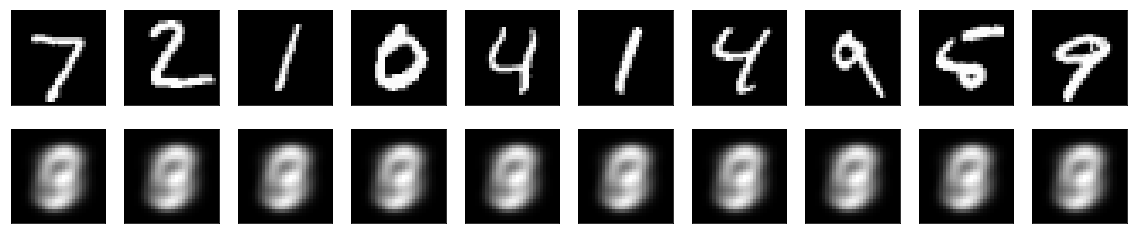

In [8]:

# use matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

n = 10 # how many digits we will display
plt.figure(figsize = (20,4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()# use matplotlib.pyplot as plt
